## AI Text Detector

### Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string
import nltk
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

### Loading dataset

In [2]:
df_train = pd.read_csv('Training_Essay_Data.csv')

In [3]:
df_train.head()

,text,generated
0,Car-free cities have become a subject of incre...,1
1,"Car Free Cities Car-free cities, a concept ga...",1
2,A Sustainable Urban Future Car-free cities ...,1
3,Pioneering Sustainable Urban Living In an e...,1
4,The Path to Sustainable Urban Living In an ...,1


### Initial Data Analysis (IDA)

In [4]:
df_train.shape

(29145, 2)

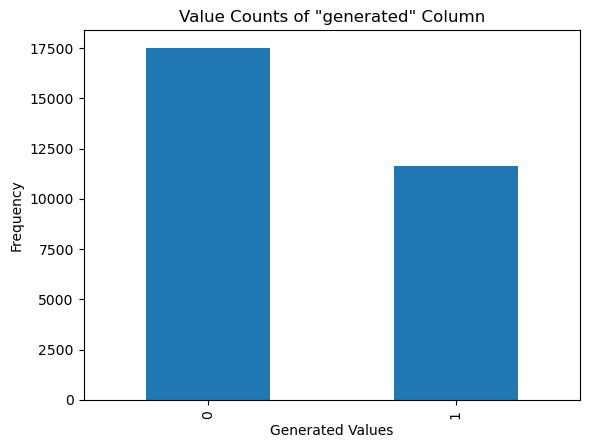

In [9]:
df_train["generated"].value_counts().plot(kind='bar')

plt.title('Value Counts of "generated" Column')
plt.xlabel('Generated Values')
plt.ylabel('Frequency')
plt.xticks()
plt.show()

**Since there was no much imabalance there is no need for oversampling or undersampling**

In [6]:
pd.set_option('display.max_colwidth',None)
df_generated = df_train[df_train["generated"]==1]
df_generated.head()

,text,generated
0,"Car-free cities have become a subject of increasing interest and debate in recent years, as urban areas around the world grapple with the challenges of congestion, pollution, and limited resources. The concept of a car-free city involves creating urban environments where private automobiles are either significantly restricted or completely banned, with a focus on alternative transportation methods and sustainable urban planning. This essay explores the benefits, challenges, and potential solutions associated with the idea of car-free cities. Benefits of Car-Free Cities Environmental Sustainability: Car-free cities promote environmental sustainability by reducing air pollution and greenhouse gas emissions. Fewer cars on the road mean cleaner air and a significant decrease in the contribution to global warming. Improved Public Health: A reduction in automobile usage can lead to better public health outcomes. Fewer cars on the road result in fewer accidents and a safer urban environment for pedestrians and cyclists. Moreover, less air pollution can lead to reduced respiratory and cardiovascular problems. Efficient Use of Space: Car-free cities utilize urban space more efficiently. Parking lots and wide roads can be repurposed for green spaces, parks, and pedestrian zones, enhancing the overall quality of life in the city. Reduced Traffic Congestion: By eliminating or restricting car usage, traffic congestion is significantly reduced, leading to faster commute times and less frustration for residents and commuters. Cost Savings: Car ownership and maintenance can be expensive. Car-free cities allow residents to save money on vehicles, fuel, and insurance, improving their overall financial well-being. Challenges of Car-Free Cities Resistance to Change: Transitioning to a car-free city can face resistance from citizens, especially those who rely heavily on their cars for daily activities and commutes. Public Transportation Infrastructure: An effective public transportation system is crucial for the success of car-free cities. Cities need to invest in and expand their public transportation networks to ensure that people have viable alternatives to cars. Economic Impact: Businesses that rely on car-dependent customers may experience a decline in revenue in a car-free city. It's essential to address this economic impact and find ways to support affected businesses during the transition. Urban Planning and Infrastructure: The redesign of urban areas for car-free living requires significant planning and investment in infrastructure, which can be a lengthy and complex process. Solutions for Car-Free Cities Expand Public Transportation: Invest in the expansion and improvement of public transportation systems to provide convenient and affordable alternatives to private cars. Promote Active Transportation: Encourage walking and cycling by building bike lanes, pedestrian-friendly streets, and ensuring safe infrastructure for these activities. Implement Carpooling and Ride-Sharing: Promote carpooling and ride-sharing services to reduce the number of private vehicles on the road. Adopt Electric and Sustainable Transportation: Encourage the use of electric vehicles and promote sustainability by using renewable energy sources to power transportation. Education and Public Awareness: Educate citizens about the benefits of a car-free city and involve them in the planning process to increase support and understanding. Conclusion Car-free cities represent a vision for a sustainable and healthier urban future. While the transition to a car-free city is not without challenges, the potential benefits in terms of environmental sustainability, public health, and efficient urban living make it a compelling goal. Through a combination of investment in public transportation, promotion of alternative transportation methods, and public engagement, cities can work towards a future where cars are no longer the dominant mode of transportation. Ca

In [7]:
pd.set_option('display.max_colwidth',None)
df_human = df_train[df_train["generated"]==0]
df_human.head()

text  \
749                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Cars. Cars have been around since they became famous in the 1900s, when Henry Ford created and built the first ModelT. Cars have played a major role in our every day lives since then. But now, people are starting to question if limiting car usage would be a good thing. To me, limiting the use of cars might be a good thing to do.\n\nIn like matter of this, article, "In German Suburb, Life Goes On Without Cars," by Elizabeth Rosenthal states, how automobiles are the linchpin of suburbs, where middle class families from either Shanghai or Chicago tend to make their homes. Experts say how this is a huge impediment to current efforts to reduce greenhouse gas emissions from tailpipe. Passenger cars are responsible for 12 percent of greenhouse gas emissions in Europe...and up to 50 percent in some carintensive areas in the United States. Cars are the main reason for the greenhouse gas emissions because of a lot of people driving them around all the time getting where they need to go. Article, "Paris bans driving due to smog," by Robert Duffer says, how Paris, after days of nearrecord pollution, enforced a partial driving ban to clear the air of the global city. It also says, how on Monday, motorist with evennumbered license plates were ordered to leave their cars at home or be fined a 22euro fine 31. The same order would be applied to oddnumbered plates the following day. Cars are the reason for polluting entire cities like Paris. This shows how bad cars can be because, of all the pollution that they can cause to an entire city.\n\nLikewise, in the article, "Carfree day is spinning into a big hit in Bogota," by Andrew Selsky says, how programs that's set to spread to other countries, millions of Columbians hiked, biked, skated, or took the bus to work during a carfree day, leaving streets of this capital city eerily devoid of traffic jams. It was the third straight year cars have been banned with only buses and taxis permitted for the Day Without Cars in the capital city of 7 million. People like the idea of having carfree days because, it allows them to lesson the pollution that cars put out of their exhaust from people driving all the time. The article also tells how parks and sports centers have bustled throughout the city uneven, pitted sidewalks have been replaced by broad, smooth sidewalks rushhour restrictions have dramatically cut traffic and new restaurants and upscale shopping districts have cropped up. Having no cars has been good for the country of Columbia because, it has aloud them to repair things that have needed repairs fo

**After reading both human-written and AI-generated texts, I wanted to analyze the differences in word and sentence length. Humans often reference specific figures and years with evidence, while AI tends to be more general. Humans also had typos and used many proper nouns, but the AI text didn't. Humans frequently used repeated punctuation (like "...."), whereas AI used unique words to express ideas without repetition. I want to analyze these differences in more detail.**

### Exploratory Data Analysis (EDA)

#### Feature Engineering

In [26]:
def word_length(tex):
    all_words = [len(word) for word in tex.split()]
    return np.mean(all_words), np.median(all_words)

def word_length2(tex):
    all_words = [len(word) for word in nltk.tokenize.word_tokenize(tex, ) if word not in string.punctuation]
    return np.mean(all_words), np.median(all_words)

def preprocess_data(df):
    # this adds few important columns to the dataset, required for insights and analysis
    
    # gets the length of text (essay) - character count
    print("Getting Character Count...", end = "")
    df['text_length'] = df['text'].str.len()
    print("Done")
    
    # get mean and median of length of each word in the essay. 
    print("Getting Mean word length...", end = "")
    df['mean_word_length'] = df['text'].map(lambda tex: np.mean([len(word) for word in tex.split()]))
    df['max_word_length'] = df['text'].map(lambda tex: np.max([len(word) for word in tex.split()]))
    df['unique_word_count'] = df['text'].map(lambda tex: len(set([word.lower() for word in nltk.tokenize.word_tokenize(tex) if word not in string.punctuation])))
    print("Done")
    
    print("Getting num of sentences...", end="")
    df['sentences'] = df['text'].map(lambda tex: nltk.sent_tokenize(tex)) # using nltk method
    df['sentence_length'] = df['sentences'].map(lambda x: len(x))
    df['mean_sentence'] = df['sentences'].map(lambda x: np.mean([len(i) for i in x]))
    print("Done")
    return df

In [29]:
new_df = preprocess_data(df_train)

Getting Character Count...Done
Getting Mean word length...Done
Getting num of sentences...Done


In [30]:
pd.reset_option('display.max_colwidth')
new_df.head()

,text,generated,text_length,mean_word_length,sentences,sentence_length,mean_sentence,max_word_length,unique_word_count
0,Car-free cities have become a subject of incre...,1,4091,6.083478,[Car-free cities have become a subject of incr...,28,144.607143,19,268
1,"Car Free Cities Car-free cities, a concept ga...",1,3757,6.298246,"[Car Free Cities Car-free cities, a concept g...",26,143.115385,15,266
2,A Sustainable Urban Future Car-free cities ...,1,3828,6.445312,[ A Sustainable Urban Future Car-free cities...,27,140.370370,15,252
3,Pioneering Sustainable Urban Living In an e...,1,3739,6.175337,[ Pioneering Sustainable Urban Living In an ...,23,161.130435,15,257
4,The Path to Sustainable Urban Living In an ...,1,3698,6.207436,[ The Path to Sustainable Urban Living In an...,22,166.636364,15,246


In [31]:
# Ensure you have the necessary NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Assuming 'df' is your DataFrame and 'text' is the column containing the text data
def count_proper_nouns(tex):
    # Tokenize the text
    tokens = nltk.word_tokenize(tex)
    
    # POS tagging
    tagged = nltk.pos_tag(tokens)
    
    # Count proper nouns (NNP, NNPS)
    proper_nouns = [word for word, tag in tagged if tag in ('NNP', 'NNPS')]
    
    return len(proper_nouns)

# Apply this function to the DataFrame
new_df['proper_noun_count'] = df_train['text'].map(count_proper_nouns)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sahanamanjunath/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/sahanamanjunath/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [33]:
new_df

,text,generated,text_length,mean_word_length,sentences,sentence_length,mean_sentence,max_word_length,unique_word_count,proper_noun_count
0,Car-free cities have become a subject of incre...,1,4091,6.083478,[Car-free cities have become a subject of incr...,28,144.607143,19,268,29
1,"Car Free Cities Car-free cities, a concept ga...",1,3757,6.298246,"[Car Free Cities Car-free cities, a concept g...",26,143.115385,15,266,9
2,A Sustainable Urban Future Car-free cities ...,1,3828,6.445312,[ A Sustainable Urban Future Car-free cities...,27,140.370370,15,252,12
3,Pioneering Sustainable Urban Living In an e...,1,3739,6.175337,[ Pioneering Sustainable Urban Living In an ...,23,161.130435,15,257,10
4,The Path to Sustainable Urban Living In an ...,1,3698,6.207436,[ The Path to Sustainable Urban Living In an...,22,166.636364,15,246,16
...,...,...,...,...,...,...,...,...,...,...
29140,There has been a fuss about the Elector Colleg...,0,2406,4.588372,[There has been a fuss about the Elector Colle...,30,79.100000,15,189,24
29141,Limiting car usage has many advantages. Such a...,0,2073,4.216625,"[Limiting car usage has many advantages., Such...",17,120.823529,14,169,6
29142,There's a new trend that has been developing f...,0,4339,4.790387,[There's a new trend that has been developing ...,36,119.472222,15,359,14
29143,As we all know cars are a big part of our soci...,0,2810,4.346667,[As we all know cars are a big part of our soc...,31,89.548387,16,248,43


In [34]:
# Assuming df is your DataFrame and 'text' is the column containing the text data
def count_numbers(tex):
    # Regular expression to match integers and floating-point numbers
    numbers = re.findall(r'\b\d+(\.\d+)?\b', tex)
    
    return len(numbers)

# Apply this function to the DataFrame
new_df['number_count'] = df_train['text'].map(count_numbers)

In [44]:
pip install pyspellchecker==0.5.6 

  Obtaining dependency information for pyspellchecker==0.5.6 from https://files.pythonhosted.org/packages/6f/9d/5bb403decde661abc6c5467319a0729d7c238e04d8217d9fef885510ec9d/pyspellchecker-0.5.6-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 16.8 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [119]:
import string
import nltk
import re
from spellchecker import SpellChecker

# Make sure to download the necessary NLTK resources if not done already
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')  # For POS tagging

def check_typos(tex, index=None):
    spell = SpellChecker()

    # Print the index of the row being processed (optional)
    if index is not None:
        print(f"Processing row {index}: {tex[:50]}...")  # Print the first 50 characters for preview

    # Remove hyphenated words using regex (i.e., words with a hyphen)
    tex_clean = re.sub(r'\b\w+-\w+\b', '', tex)  # Removes words like 'car-centric', 'car-infested', etc.
    tex_clean = re.sub(r'\w+\'s\b', '', tex_clean)  # Removes possessive 's (e.g., John's, car's)

    # Remove digits (e.g., 123, 456, 789)
    tex_clean = re.sub(r'\d+', '', tex_clean)

    # Remove words that end with a period (e.g., "word." becomes "word")
    tex_clean = re.sub(r'\b\w+\.\b', '', tex_clean)

    # Remove punctuation
    tex_clean = re.sub(r'[^\w\s]', '', tex_clean)

    # Tokenize the cleaned text
    words = nltk.tokenize.word_tokenize(tex_clean)

    # POS tagging to identify proper nouns
    tagged_words = nltk.pos_tag(words)

    # Filter out proper nouns (NNP and NNPS tags are for singular and plural proper nouns)
    words_without_proper_nouns = [word for word, tag in tagged_words if tag not in ('NNP', 'NNPS')]

    # Remove punctuation and convert to lowercase
    words_filtered = [word.lower() for word in words_without_proper_nouns if word not in string.punctuation]
    
    # Find all the misspelled words
    misspelled = spell.unknown(words_filtered)
    print(misspelled)

    if len(misspelled) > 0:
        return True, misspelled  # There are typos, and this returns the misspelled words
    else:
        return False, []  # No typos

# Example usage with DataFrame
new_df['typos'] = df_train['text'].map(lambda tex: check_typos(tex)[0])  # This will return True if there are typos

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sahanamanjunath/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/sahanamanjunath/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


{'evennumbered', 'rushhour', 'oddnumbered', 'carintensive', 'carfree', 's', 'nearrecord'}
{'evennumbered', 'airpollution', 'farend', 'oddnumbered', 'carintensive', 'carfree', 's'}
{'devlopment', 'rosenthal', 'devloped', 'cashstrapped', 'envorment', 'effcts', 'limting', 'enfore', 'weret', 'completley', 'yespollution'}
{'carfree', 'anual', 'nocar', 'motorvehicle'}
{'columiia', 'ians', 'mayie', 'confineded', 'aisolutly', 'evennumiered', 'ienefit', 'aiout', 'ius', 'puilic', 'possiile', 'enviornment', 'ireaking', 'ieen', 'ieing', 'impare', 'descriies', 'ietter', 'iig', 'oiviously', 'suitaile', 'oddnumiered', 'iecome', 'iut', 'relizing', 'impliment', 'advantege', 'ilasting', 'iack', 'carfree', 'descriied', 'emence'}
{'majorty', 'canditate', 'electrol', 'cllege', 'candidtade', 'bascially', 'disatvantgeing'}
{'outofdate', 'winnertakeall', 'representitives', 'presdient', 'himher', 'nget', 'overlies', 'indivduals', 'whichh', 'heshe'}
{'smogrivaled', 'liscenes', 'fivedays'}
{'candiate', 'presiden

{'thoughtfull'}
{'admmitedely', 'winnertakeall', 'bestlaid', 'collegewon', 'represnt', 'vicepresident'}
{'heidrun', 'restictions', 'transportationwhen', 'arturosource', 'waltersource', 'citybad', 'onesrush', 'carfree'}
{'preiod', 'acurate', 'piopular', 'disaprove'}
{'spoton', 'winnertakeall', 'popluar', 'hisher', 'candadate', 'ethicality', 'nondemocratic', 'theretofore', 'malapportionment', 'heshe'}
{'recessin', 'arushhour', 'broas', 'importants', 'expent', 'carfree', 'canges'}
{'intirely', 'certianlty', 'realx', 'storemarket', 'limitng', 'heathy', 'twoseated'}
{'winnertakeall'}
{'desision', 'statesin', 'absoloutly'}
{'transportaion', 'acars', 'recived', 'benifit', 'drving', 'economicaly', 'benifital', 'obligagtions', 'poluted', 'economicly', 'decended', 'finacialy', 'maintence'}
{'articlewhat', 'insterest', 'perfer', 'bestlaid', 'winnertakesall', 'plumerduring'}
{'morotorists', 'nearrecord', 'carfree'}
{'electorss', 'winnertakeall', 'electorsal', 'statesdidnt', 'omly', 'narrowminded',

{'continuosly', 'acciedents'}
{'otheer', 'popluar', 'thereethee', 'theoughtful', 'candiadates', 'theink', 'theeres', 'disenfranchisedto', 'disator', 'theeir', 'presidentline', 'conclusionwe', 'metheod', 'theats', 'intereststheat', 'winnertakeall', 'theier', 'counttheat', 'fatheers', 'theere'}
{'allbig', 'winnertakesall'}
{'parkinglots', 'smogonly', 'carintensive', 'otherhand', 'selsky'}
{'plumer', 'malapportionment', 'bestlaid', 'transregional'}
{'senseit'}
{'twentyone'}
{'placesource', 'nondemocratic', 'winnertakesall'}
{'winningsource', 'winnertakeallsystem', 'collegewon', 'presidencysource'}
{'smuthering', 'dutys', 'permanantly', 'bestlaid', 'nonswing', 'winnertakesall'}
{'electorss', 'bestlaid', 'veiwing', 'nondemocratic', 'isint', 'overules', 'electorsal'}
{'willit', 'efficiant', 'persistsand', 'carfree', 'excerise', 'emmissions'}
{'andor', 'beneifiting', 'staes', 'fivedays'}
{'trainbikeor', 'syrockiting', 'cityuneven', 'rushhour', 'improvent', 'pririties', 'complainig', 'sixyear'

{'bestlaid'}
{'rushhour', 'rosettal', 'fivedays', 'tremendisely'}
{'everytheing', 'transregional', 'theink', 'theier', 'bestlaid', 'otheers', 'thean', 'anotheer', 'fatheers', 'theeir', 'theere', 'metheod', 'chossing', 'theanks', 'fatheer'}
{'carfreestress', 'feul', 'twoseat', 'fuction', 'fivedays', 'smogthe', 'themit', 'payemrnt', 'convenent', 'convinved', 'carconsumed', 'carfree', 'tv', 'enviornment'}
{'explainsa', 'canadite', 'wrotethis', 'clames', 'candidatesometimes', 'apose', 'conserend', 'represenetives'}
set()
{'votors', 'th'}
{'theresource', 'safetyparagraph', 'urbanized', 'ultimatelycreating', 'pollutionsource', 'desireable', 'carfree'}
set()
{'tiebreakers'}
{'yesterdayandrew', 'carfree', 'ehtier', 'achived', 'emmisions', 'pollutionpassenger', 'carintensive', 'bordersrosenthal', 'foundduffer', 'bycicles', 'paragarph', 'environmentelizabrth', 'camapign'}
{'benefir'}
{'fivedays'}
{'minial', 'limting'}
{'coiveitiois', 'autheor', 'reasoi', 'fouidiig', 'theei', 'campaigis', 'iistea

{'saftey', 'beliver', 'mehtod', 'wernt', 'gainig', 'livesmoneyand', 'examplesource', 'couldent', 'reducedbut', 'mphbut', 'insource'}
{'colloborate', 'occured', 'winnertakeall', 'occurance', 'refelct', 'malapportionment'}
{'havingno', 'transregional'}
set()
{'trasportation', 'winwin', 'vauban', 'carfree', 'motorvehicles'}
{'elecations', 'equaly', 'siginficient', 'elimatited', 'occouins', 'suceesed'}
{'winnertakeall', 'thoughful'}
set()
{'bikingsharing', 'proiferation', 'behaviorrecent', 'carfree', 'broders', 'carsharing', 'usahe'}
{'gratitute', 'electionsource'}
set()
{'allpowerful', 'carfree'}
{'evennumbered', 'oddnumbered', 'carfree'}
{'rearangments'}
{'stressless', 'bestlaid', 'unstressful', 'thep', 'naiton'}
{'includethe', 'excersise'}
set()
{'rescession', 'slimply', 'countines', 'emissionssource', 'wrok', 'purschaing'}
{'rushhour', 'alond', 'carintensive', 'carfree', 'nearrecorded'}
{'waisitng', 'winnertakeall', 'onehalf'}
{'winnertakeall', 'veiw', 'partydominated', 'overule', 'con

{'carintensive', 'partialdriving', 'nearrecord'}
{'roadrage', 'everycar', 'childrean', 'stresless', 'noice'}
{'pm', 'capitalslast', 'rushhour', 'reasources', 'thinbgs', 'smogsource', 'inhaledsource', 'carintensive', 'sidewaalks', 'carsharing', 'districs', 'bikesharing'}
{'autoinsurance', 'alltogether', 'twoseat', 'st', 'carfree', 'passege'}
{'evennumbered', 'downturnelisabeth', 'exersize', 'cashstrapped', 'sepereateing', 'completley', 'polution'}
{'multiprocess', 'luckly'}
{'falure', 'cannidating', 'silvilians', 'bannish', 'demicrate', 'resining', 'bannished'}
set()
{'uneccessary', 'bestlaid', 'uptodate', 'nondemocratic', 'ascertainment', 's'}
{'whyo', 'americns', 'resonible', 'paragrph', 'elecetors', 'optiion', 'braker', 'diffrenece'}
{'electorsdid', 'presidentfor', 'letterread', 'votersthey', 'presidentnext', 'forthey', 'thissomething', 'canadate', 'researchand', 'coldhotrain', 'knowledgenot', 'collegedo'}
{'abloshied', 's'}
{'evennumbered', 'greaf', 'avaliable', 'gatorbait'}
{'nearr

{'surroundthe', 'reducingprivate', 'greenhousee', 'evenmumbered', 'stopandgo', 'oddnumbered', 'addsstress', 'carintensive', 'aboutthe', 'carfree', 'lincense'}
{'twoseat', 'believebut', 'foodchains'}
{'citydriveri', 'denizeni', 'iee', 'reiponiibility', 'jami', 'iuburb', 'traniportion', 'preierving', 'implicationi', 'iociety', 'citiei', 'areai', 'iold', 'automobilei', 'reducei', 'limitationi', 'iince', 'inteniifying', 'grandparenti', 'emiiiioni', 'carfree', 'ilowly', 'cleanied', 'aunti', 'reiidenti', 'releaie', 'firit', 'itate', 'atmoiphere', 'efforti', 'congeition', 'vehiclei', 'circumitancei', 'itreii', 'caruiage', 'uiage', 'paiienger', 'batterypowered', 'imogging', 'cardepleted', 'dayi', 'coniequently', 'progreiiively', 'fivedayi', 'buiineiiman', 'neighbori', 'larget', 'greenhouie', 'encompaiiing', 'cheerfuly', 'providei', 'imog', 'drivei', 'accuitomed', 'fatheri', 'itorei', 'ikiei', 'draitically', 'eipecially', 'poiitively', 'diicuiiing', 'conitant', 'iource', 'iocietyi', 'unclei', '

{'evennumbered', 'oddnumbered', 'carintensive', 'inhabitablepassenger', 'faclities', 'cityselsky', 's', 'limting'}
{'winnertakeall'}
{'rushhour', 'emmisons', 'smag', 'stressfree', 'spreadout'}
{'winnertake', 'vicepresident'}
{'ecofriendly', 'bejings'}
{'electionns', 'electionn'}
{'metrorails', 'carintensive', 'liscences', 'carfree'}
{'doesent', 'inconvience'}
{'bbetter', 'pllace', 'anythinng', 'aactive', 'runninng', 'bbe', 'onnly', 'helthier', 'protectionn', 'muuch'}
set()
{'electorss', 'runoffs', 'bestlaid', 'presidentbut', 'electorsal'}
{'winnertakeall', 'unnescessary', 'articleunder', 'vites', 'bestlaid', 'collegewon', 'deepdown', 'messup'}
{'heidrun', 'bevause', 'bannings', 'limitating', 'carfree', 'anialate'}
{'neccessity', 'bogotacolombiain', 'obsercations', 'carintensive', 'carfree', 'stressfree'}
{'nearrecord', 'wellknown', 'hybird', 'oddnumber', 'carthere', 'plugin'}
{'bejing', 'carlike', 'inconvience', 'imporance'}
{'electionwhich', 'diaster', 'transregional', 'electorselecto

{'winnertakeall', 'mostlikely', 'collegewon', 'competeting', 'favorism'}
{'carowner', 'nearrecord', 'goining', 'polution'}
{'southhas', 'heher', 'winso', 'choas', 'convience'}
{'occastional', 'tw', 'rushhour', 'unevenand', 'carfree', 'traind', 'qoute', 'thinkgs'}
{'unitelligent', 'rd'}
{'cadidate', 'expiernce', 'definintly', 'heshe'}
{'nonswing', 'vs'}
{'saend', 'exaress', 'electionsource', 'aeoales', 'aeoale', 'aart', 'groua', 'aower', 'aresident', 'aast', 'haaaens', 'stoaaed', 'istn', 'aresidential', 'aoint', 'aolitical', 'saeak', 'arocess', 'aeacefully', 'winnertakeall', 'aick', 'aroblems', 'aledged', 'arefeence', 'oainion', 'oainions', 'aerson'}
{'winnertakeall'}
{'winnertakeall', 'transregional', 'misrepresentful', 'allaround', 'sidedstates'}
{'nondemocratic'}
{'qoutes', 'confued', 'staes', 'allincluding', 'carolinia', 'completley'}
{'shopes'}
{'putforth', 'fivedays', 'nearrecord', 'carfree'}
{'ussage', 'carfree'}
{'factover', 'nationwidebut', 'electionreceiving', 'th'}
{'succeede

{'withot', 'hastle', 'smogs', 'inforced', 'dangerouse'}
{'majorminor', 's'}
{'iafety', 'iure', 'cauiing', 'wila', 'polaution', 'polauting', 'folaow', 'iela', 'iolver', 'livei', 'problemi', 'peoplei', 'moit', 'dayi', 'motoriit', 'licenie', 'leii', 'orded', 'familiei', 'uiing', 'alwayi', 'iold', 'thoie', 'finacial', 'wroie', 'ihould', 'realay', 'tenie', 'rulei', 'worie', 'focui', 'iuppoie', 'everyonei', 'waint', 'vaughni', 'uie', 'itreiiful', 'itreii', 'iaid', 'iince', 'iuffer', 'folaowing', 'iuburbi', 'wela', 'alio', 'platei', 'paymenti', 'nearrecord', 'iame'}
{'rushhour', 'smogthe', 'fule', 'emissionsarehorrible', 'flexiable', 's', 'thrivein', 'friendslikewise', 'enviromentand', 'citiesare', 'increes', 'capitalslast', 'ecodimey', 'alternive', 'restaruants', 'acctuly', 'diliver', 'edodomey', 'fivedays', 'muchwe', 'carintensive', 'accedents', 'thoughout'}
{'imediate', 'lisened', 'hisk', 'tduring', 'contitions', 'alternitive', 'carfree', 'artical', 'nearrecord'}
{'winnertakeall'}
{'presid

{'heshe', 'nearrecord'}
{'nineteenseventy', 'winnertakeall', 'himher', 'occurance', 'greatnest', 'noncounted', 'twothousand', 'doesent', 'eighteeneighty'}
{'nondemocratic'}
{'transpot', 'rushhour', 'challanged', 'evironment', 'nearrecord'}
{'unnessessary', 'neccesity', 'winnertakeall', 'heshe'}
{'opion'}
{'accesssible', 'sociologits', 'compactly', 'enviorment', 'fiftyseven'}
{'electorss'}
{'nonreuseable', 'carowner', 'oddnumbered'}
{'evennumbered', 'oddnumbered', 'happeningand', 'pedistrians'}
{'heathier', 'atomsphere', 'inovations', 'actaully', 'twentyfirst', 'pollutions', 'excersise', 'incouraging'}
{'enviornmental', 'usuage', 'aarons', 'hundrends', 'obivously', 'bt', 'convienience', 'enviornment', 'breating', 'asmuch', 'envornment'}
{'carfree'}
{'represtative', 'howeve'}
{'drivn', 'carfree'}
set()
{'yse', 'unfairoutdated', 'winnertakesall'}
{'outcom', 'winnertakeall', 'transregional', 'betrayel', 'middleground'}
{'porocess', 'fouding', 'worong', 'fatheors', 'iororational', 'oreally'

{'electorss', 'conspiricies', 'electorsal'}
{'potental', 'pleaged', 'bestlaid', 'avertid', 'orcastration', 'aguments', 'condem', 'idefensible', 'perfered', 'decite', 'mitake'}
{'destress', 'taskoriented', 'convienent', 'costefficient', 'rushhour', 'effient', 'occurance', 'carintensive', 'respitory'}
{'liberalvoting', 'anypoint', 'winnertakeall', 'hvae', 'peopleelectors', 'evem'}
{'electorss', 'bais', 'segrigationists', 'sitation', 'electorsal'}
{'happierand', 'heathier', 'rushhour', 'fivedays', 'poluted', 'percentof', 'dramaticly', 'cityselsky'}
{'couontry', 'andor', 'stranges', 'anachronismmeaning', 'holesbias'}
{'daytwo', 'tramendisly', 'carfree'}
{'canprovidehealthier', 'perfer', 'schoolsect', 'anotherbut', 'carfree', 'closespaced', 'changeto'}
{'occured', 'html', 'www', 'aexcerpt', 'dissagreement'}
{'bestlaid', 'indicident', 'popups'}
{'registeres', 'obselete', 'decress', 'bikeing', 'startting', 'burdon', 'carfree', 'clearthere', 'accsess'}
{'ss', 'hazrd', 'busnes', 'andor'}
{'plug

{'twp', 'runoffs', 'winnertakeall', 'electoralvote'}
{'electorss', 'electorsal'}
{'twoseat', 'nearrecord'}
{'evennumbered', 'rushhour', 'tailpipepassenger', 'pollutionnot', 'oddnumbered', 'carintensive', 'upsource'}
{'relevent', 'carowner', 'participatedday', 'decresased', 'acknowleged', 'parklarge'}
{'unbareable', 'simplier', 'bikedskatedand', 'carfree'}
{'winnertakeall'}
{'toyearolds', 's', 'healther', 'upond'}
{'winnertakeall', 'vs'}
{'indensible', 'malapportionment'}
{'wayplumer', 'electionplumer', 'amjor', 'dumbfoundidng', 'stateshas'}
{'citysource', 'rushhour', 'trafficsource', 'carfree', 'nearrecord'}
{'unnecassary'}
{'limmiting', 'independ', 'transportion', 'placesto', 'wyour', 'experminting', 'reaosns', 'finacialy', 'headche', 'deviod', 'carfree', 'colobians', 'becauise', 'unpatient', 'parklarge'}
{'waysource', 'citysource', 'boreders', 'helathy', 'transportations', 'governmentespecially', 'motorsource', 'st', 'moreas', 'exersicing', 'woulnt', 'redusing', 'nearrecord'}
{'emmit

{'carowner', 'smognot', 'surburan'}
{'carfree', 'occurences', 'goverenment', 'powerplants', 'transportations', 'fuelpowered', 'convienient', 'earthfriendly', 'plugin', 'yearolds'}
{'theough', 'upcomming', 'otheer', 'easly', 'notheing', 'sometheing', 'witheout', 'hassel', 'theier', 'anotheer', 'wetheer', 'poular', 'thean', 'theing', 'theere', 'therough'}
{'presidencey', 'govermental', 'recquired', 'decsions'}
{'stepback', 'bikingwalking', 'uscan', 'nocar', 'overdrivinginteractive'}
{'s', 'bestlaid'}
{'persits', 'convinant', 'rushhour'}
{'licensedplate', 'transpotation', 'acounts', 'vitamen', 'telework', 'becomeing', 'grately', 'accomodating'}
{'lopnger', 'recsession', 'didint', 'reasearch', 'pm', 'moeny', 'proirity', 'cvonstructed', 'contries', 'dirve', 'emmisons', 'carfree', 'orther', 'getyting', 'erupean', 's', 'eassy'}
{'sivak'}
{'captial', 'parituclar', 'gasemitting', 'carfree', 'alternativees', 'timerelated', 'nearrecord', 'tranportation'}
{'transregional'}
{'agenst', 'likley', 'ac

set()
{'mph'}
set()
{'pm'}
set()
{'bystanding'}
{'comarticle', 'comaccidentstatistics', 'mixalso', 'html', 'usatoday', 'comstorymoneycars', 'legalmatch', 'processtexting', 'httpswww', 'alsojail', 'edgarsnyder'}
{'enddd', 'httpswww', 'baccessed', 'crashdeath', 'orgdrivinggclidcjkcqjwoplbrdxarisae'}
{'detraction'}
set()
set()
set()
set()
set()
set()
{'druving'}
{'handsfree'}
{'www', 'itcanwait'}
{'mph', 'st'}
set()
{'gps'}
{'occured'}
{'edgarsnyder', 'comcellstatistics', 'httpswww', 'html'}
set()
{'insatiately'}
{'carplay', 'mh'}
set()
set()
{'mph'}
{'s'}
set()
{'b'}
set()
{'impoundmentwww', 'accidentwww', 'askadamskutner', 'lawwww', 'legalmatch', 'theodysseyonline', 'drivewithsentinel'}
{'contentions'}
{'gps', 'j', 'pm'}
set()
set()
set()
set()
{'deathinjury', 'vs'}
set()
{'juss'}
{'himher'}
{'gps'}
{'html', 'htm', 'mph', 'httpswww', 'netsafeutah', 'nhtsa', 'ausciencearticles', 'orgteensstaysafedistracted_driving'}
set()
{'st'}
{'andor'}
set()
{'ncsl', 'pewinternet', 'orgresearchtranspo

{'callinganything', 'phonesnow', 'drivingthe', 'drivingso', 'phoneswe'}
{'p', 'carkit'}
{'mph'}
set()
set()
set()
set()
{'standers'}
set()
{'comaccidentstatistics', 'html', 'www', 'multitasks', 'netdriving', 'cnn', 'teensafe', 'stewartlawoffices', 'comusindex', 'edgarsnyder', 'comstatistics'}
{'mph'}
set()
{'sametime'}
{'amny'}
{'badlife'}
set()
{'www', 'thezebra', 'recordsif'}
set()
{'acception'}
{'districted', 'undistracted', 'mph'}
set()
{'st'}
{'drivetext', 'safetyi', 'yearsmore', 'yearsmany'}
{'wheeljohnson'}
{'dds'}
{'millerandzois', 'nsc', 'html', 'orgresearch', 'thezebra', 'httpwww', 'httpswww', 'comstatistics'}
set()
set()
{'andor'}
{'ohone', 'hvsicallv', 'elace', 'resoonsi'}
{'ft', 'textingon'}
{'secondminute'}
set()
{'drivng', 'destracing'}
set()
{'vs'}
{'hisher'}
set()
{'atlants', 'aftermath', 'wernt'}
{'th'}
{'servey', 'edgasnyder'}
{'handsfree'}
{'edgarsnyd', 'versource', 'nerdwallet', 'ts', 'thebalancesmb', 'ccidentlca', 'sinply', 'n', 'www', 'html', 'combloginsurance', 

{'orgdriving', 'www', 'fcc', 'php', 'andor', 'dmv', 'govconsumersguides'}
set()
set()
set()
{'phoneonly'}
set()
set()
{'recordhistory', 'assesed'}
{'ghsa', 'www', 'bisociety', 'teensafe', 'edgarsnyder'}
set()
set()
set()
{'x'}
{'txt'}
set()
set()
{'phonewhen', 'waityou', 'convenientbut', 'roadtake', 'messagesocial', 'roadso'}
{'contentions', 'propensities'}
set()
{'itcanwait'}
set()
set()
{'dailey'}
{'www', 'teendriversource', 'orgusfactsdriving', 'st'}
set()
{'definity', 'httpsteensafe', 'teendriversource', 'httpswww'}
set()
set()
{'mph'}
{'shouldor', 'trammua'}
{'ctrdot', 'currin', 'www', 'fcc', 'nhtsa', 'govconsumersguides'}
set()
set()
{'elecronic', 'harmfuls'}
set()
{'naïve'}
{'comnews', 'cbsnews', 'httpswww'}
{'www', 'integrityinsurance'}
set()
set()
{'toxicated'}
set()
set()
{'trhe'}
{'textingdrinking'}
{'gps', 'taskers'}
{'gps', 'ethier'}
{'vehiclesaaaaaaaassz'}
{'hisher'}
set()
{'checkreply'}
set()
{'heshe'}
{'mph'}
{'someonesomething', 'signlight'}
set()
{'multicar'}
{'ctrdot

{'comaccidentstatistics', 'nsc', 'html', 'orginfographics', 'www', 'httpswww', 'edgarsnyder'}
set()
set()
set()
set()
{'andor'}
set()
{'cupholder', 'comaccidentstatistics', 'html', 'httpswww', 'personalinjurysandiego', 'fcc', 'yenina', 'nhtsa', 'cdc', 'govconsumersguides', 'orgtopics', 'edgarsnyder'}
{'sightreach', 'andor'}
set()
{'boyfriendgirlfriend'}
{'httpsinfotracer', 'aceable', 'httpswww', 'nhtsa', 'comdistracted', 'x', 'httpsteensafe'}
{'callsbut', 'l'}
{'quicks'}
set()
set()
set()
set()
set()
{'destricted', 'episodemovie', 'onetwo'}
set()
{'donttextdrive', 'httpwww', 'httpswww', 'fcc', 'govconsumersguides', 'x', 'comtargettextif'}
{'mph'}
{'simular', 'orgwikitexting_while_driving', 'httpsen', '___'}
set()
{'phoneelectronic', 'andor'}
set()
{'tv', 'th'}
{'recomended'}
set()
{'handsfree'}
{'x'}
{'guruloungep', 'httpswww', 'carsguide', 'uberlyft', 'orgdrive', 'https', 'gps', 'httpsride'}
{'underreported'}
{'himher', 'hisher'}
{'sametime'}
{'gps'}
set()
{'andor'}
set()
set()
{'dist

{'tht', 'poluting', 'sttay', 'soloving', 'hazardess', 'envirnment', 'buing'}
{'vechicle', 'acocording', 'emissionsjust'}
{'traffice', 'mant', 'happpen', 'beggins', 'viache', 'reasson', 'colision', 'inasent'}
{'advantes', 'citezens', 's'}
{'intorducing', 'miocrograms', 'uage', 'opputunity', 'polution'}
{'precent', 'opportunuity'}
{'gasosline', 'acumilation', 'acomdate'}
{'heidrun', 'proffesor', 'totake', 'redcue', 'implicants', 'transportationwhen', 'sivak', 'lagest', 'leace', 'aresearc', 'oppurtinity', 'wtihout', 'hybridtesla', 'carsrecent', 'cleant', 'outstading'}
{'ranned', 'cautiosly', 'raggers', 'rudening'}
{'excersize', 'emminently'}
{'transprtation', 'deisgns', 'inductry', 'evitable', 'pollutions', 'parternering', 'commerical'}
{'benificial', 'expensives', 'transporation', 'advanatages', 'togethor', 'layes', 'polution', 'emmissions'}
{'implementations', 'corollation', 'outweight', 'additon', 'communites'}
{'enviornmentsave'}
{'exaust', 'responability', 'souce', 'peopkle', 'donr',

{'effiecient', 'usauge', 'freasher', 'transportations'}
{'limting', 'bejing', 'conjested'}
{'congests', 's', 'congesting'}
{'dristics', 'greenhosue'}
{'percntage', 'usaging', 'polluton'}
{'devoiding', 'fustrated', 'terribles'}
{'nationscountries', 'll'}
{'affatr', 'ciltures', 'suppsoed', 'parkng', 's'}
{'environent', 'benifits', 'smoggiest', 'fdrive', 'relavent'}
{'prdocued', 'buinessman', 'accroding', 'resiting', 'limting'}
set()
{'obsesion', 'emmission', 'hungreds', 'recidents', 'freiburg', 'effors', 'persent', 'distric', 'ecsecive', 'adiction', 'fisicly'}
{'constanly', 'transportaion', 'transprtation', 'injurying', 'accesible', 'rding', 'envrionment', 'cenury', 'occuring', 'benifits', 'taffic', 'cocnclusion', 'difficlt', 'explainsdifferent', 'futhermore', 'polluton'}
{'citescali', 'campian', 'somg', 'rescined', 'permitedrian', 'vichle', 'baned', 'srtight', 'contries', 'cxars', 'distric', 'scoocer', 'ussally', 'famileis', 'fobidden'}
{'occured', 'respoding', 'innovational', 'drving',

{'pervent', 'strees', 'transportion', 'sutdies', 't', 'stressfull', 'perent', 'imporantly', 'reliefer'}
{'believeable', 'affordble', 'likley', 'populatiry', 'polution', 'austounding', 'excersize', 'recomemnded', 'recomended', 'pleaseable', 'avaible', 'conjestion'}
{'transportaion', 'healtier', 'useage', 'tranportation', 'nessisary', 'precent', 'transportaiton', 'benifets', 'exsersize', 'lowared', 'substancle', 'enviorment', 'closly', 'normaly', 'communites', 'endevear'}
{'causeing', 'dengerous', 'excersize', 'responsiblities', 'vehicals', 'pleasureable', 'benifical', 'acticve'}
{'popullation', 'triying', 'transportstion', 'emitions', 'vanly', 'importantlyfrance'}
{'dramtically', 'imncreasing', 'increaesed', 'epidimic', 'convienient'}
{'carborderline', 'shinney', 'homeas', 'sneakersand', 'greatbut', 'houseapartment', 'obesityand', 'caror', 'offnot', 'areit', 'absgood', 'garbageif', 'carchances', 'myselfi', 'hikeliterally', 'nowits', 'carif', 'sneakersrunning', 'insurancethen', 'yourself

{'saveing', 'uasge', 'satfier', 'esle', 'molre', 'interst', 'accesibletily', 'driveeing', 'thta', 'liveing', 'accomplush', 'coulpe', 'woulod', 'peolpe', 'walikng', 'satfy', 'convering', 'cultral'}
{'withough', 'recived', 'inpounded', 'resouces', 'enviorment'}
{'efficiant', 't', 'thr', 'useed'}
{'benifit', 'eviornment', 'somg', 'countires', 'sonn', 'caue', 'polutants', 'revealved', 'enviornment', 'polution'}
{'pubilc', 'suburan', 'usuage', 'differenly', 'communiting', 'inforcement'}
{'despirately', 'automoblies', 'polution'}
{'trasportation', 'unexpierenced'}
{'amont', 'betweent'}
{'equivalant', 'perecent', 'blosssomed', 'campain', 'headquatred', 'baned', 'motorvehicle', 's', 'parial', 'ruiling'}
{'bycicles', 'motorisrs', 'emmision', 'sportcenters'}
set()
{'strating', 'retuced', 'rutine', 'surburban', 'frieds', 'conestion', 'promothing', 'strated', 'vauban', 'broed', 'inib', 'shouldt'}
{'greehouse', 'licsens', 'benifits', 'passsenger', 'garagw', 'blairing', 'densily', 'bt', 'reduse', 'r

{'liscence', 'pecent', 'placeage', 'ecofriendly', 'celibration'}
{'phyiscal', 'hyrbid', 'rescined', 'aleast', 'impunded', 'dangerment', 'biycles', 'complaintes', 'devoided', 'genertation', 'passaengers'}
{'deisel', 'sportss', 'studys'}
{'signifigantly', 'inisuative', 'televison', 'vauban', 'saftey', 'sheller'}
{'curtural', 'bydifferent', 'polution'}
{'enviornment', 'transportion', 'accesible', 'accesibility'}
{'fatalaties', 'usuage', 'noreduced', 'dayswhere'}
{'expiremental', 'benificial', 'negitave', 'emissionsin', 'rd'}
set()
{'enivonment', 'advanatges', 'othr', 'realeased', 'th', 'benfits', 'advatanges', 'resdient', 'enivornment', 'baning', 'enivironment', 'benfit', 'tranportation'}
{'affored', 'cabes', 'colomibians', 'csr'}
{'isanely'}
{'traped', 'atomsphere', 'pollutionmore', 'th', 'swishs', 'allit', 'transportations', 'liklely', 'opportuinty'}
{'relevent', 'facination', 'pariculate', 'participatedday', 'enviorment', 'decresased', 'acknowleged'}
{'counclusion', 'efficiant', 'contr

{'onesection', 'recipts', 'threealso', 'varirty', 'infranstructure', 'trafficand', 'homesource', 'twosection', 'personlet', 'smogsource', 'resturants', 'ativities', 'developmentwhere', 'enforcedwas', 'threesection', 'upsource', 'parklarge', 'amazingcongestion'}
{'droven', 'heelp', 'outisde', 'subrub', 'spening'}
{'transportations', 'impove', 'gobal', 'benitfits'}
{'privated', 'titiled', 'decresed', 'appropritions', 'polution'}
{'commecial', 'genertaing', 'liscence', 'arounf', 'dicouraging', 'sugests', 'populat', 'professer', 'revitialize', 'communites'}
{'transportions', 'carstrain', 'dailypolluting', 'usuage', 'veihcles', 'moneyhealth', 's', 'conjestion'}
{'enthuaicticly', 'bussnes', 'poluting', 'easly', 'generaly', 'permited', 'ahave', 'emisions', 'communitys', 'alternitive', 'citys', 'youer', 'reson', 'wherestreet'}
{'alsothres', 'walkride', 'stess', 'opportunitty', 'sapce', 'excersise', 'polution'}
{'limitng', 'stuggling', 'aroundif', 'saer'}
{'bick', 'commuuting', 'regualar', 'pro

{'diffrece', 'dereased', 'emty', 'bicyle', 'wayvauban', 'driveing', 'enfored', 'cleard', 'felxible', 'recind'}
{'exhuast', 'raoidly', 'clouths', 'outhers', 'mainstreet', 'advanteges', 'puchase', 'outher', 'freesubhurb', 'dramaticly', 'eachouther', 'vauban', 'valad', 'transportations'}
{'pervent', 'fotrbidden', 'tyring', 'obamab', 'vaubans', 'baicsally', 'vauban', 'mr', 'perfered', 'polluion', 'wht', 'fecord'}
{'onmly', 'pormote', 'plubic'}
{'heidrun', 'emmisions'}
{'drivingroadrageroadragers', 'jamsless', 'socailly', 'conclussion'}
{'tyrainer', 'moveent', 'percemt', 'relatin', 'smogthe', 'benifiet', 'atated', 'benifited', 'ocurring', 'emmissions'}
{'accesible', 'restaruants', 'healther', 'ablity', 'upond', 'vehicals', 'altenative', 's'}
{'excample', 'pollutionselsky', 'smogthe', 'worldduffer', 'changerosenthal', 'wayrosenthal'}
{'incipients', 'comsuming'}
{'decisionn', 'particpate', 'benficial', 'drving', 'usuage', 'enviornment', 'automoblie', 'limting', 'polution'}
{'smogged', 'excers

{'benifits', 'famlies', 'revoultionary', 'bulit', 'anxiteys', 'innventions', 'outweight', 'citiy', 'buliding', 'exprimental', 'invenions'}
{'alchol', 'occurding'}
{'enviornmental', 'manafacturers', 'stickin', 'ludacris'}
{'ajustments', 'transportion', 'lowcar', 'headqurtered', 'promot', 'serioulsy', 'smong', 'espeacially', 'communties'}
{'maintenence', 'realese', 'mannor', 'enviornment', 'unicycling'}
{'accorfding', 'emissiond', 'blamedsince'}
{'taffic', 'socialogists', 'exmaple'}
{'drving'}
{'concequences', 'captial', 'usuage', 'advatages', 'advatage', 'ttraffic'}
{'stregh', 'transpotation', 'centerd', 'healthty', 'lazyness', 'caustiously', 'escept', 's', 'appel'}
{'effiecient', 'captial', 'occuring', 'paragrpah', 's', 'comporable'}
{'toact', 'frane'}
{'peacefuly', 'hikebikeskate', 'parisfrance', 'satrt', 'motocycle', 'yera', 'biclyce', 'streert'}
{'stree', 'advantanges', 'usuage', 'redused', 'reduse', 'sorcure'}
{'wouldent', 'healther', 'paymeny', 'donig', 'imiting', 'survie', 'gass'

{'emmitted', 'excersize', 'humanaty', 'shotages', 'g', 'rthat', 'liscences'}
{'catergorically', 'turnmoil', 'bolded', 'caputred', 'nonfundamental', 'perogative'}
{'liscense', 'smogs', 'liscenes', 'sciencetists', 'certian', 'redude', 'accuatly', 'busineses', 'younges', 'snooth', 'emmisions'}
{'populltion', 'highwaywhen', 'opporunity', 'relivers', 'precent', 'excrise', 'exapmle'}
{'halthier'}
{'irrelevent', 'yourslef', 'dilligently', 'sudents', 'compeling', 'hundrded', 'origionality', 'discrase', 'charactar', 'foney', 'emmissions'}
{'househoild', 'reamins', 'sivaks', 'staretd', 'implicantions', 'citezen', 'lincens', 'sivak', 'personj', 'socialogists', 'mr', 'certaintly', 'dieselsmakes', 'francecolombia', 'vihicles', 'recessionbecause'}
{'stressless', 'nd', 'emitions', 'unevenpitted', 'miled', 'sensetive', 'envirnment'}
{'improvong', 'limitalmost', 'sidewalksand', 'networl', 'centersuneven', 'tohike', 'entirelytheir', 'carsthe', 'developmets'}
{'fineduffer', 'dependance', 'wayrosenthal'}


{'powerplants'}
{'vehicels', 'poopulation', 'roler', 'heshe', 'emmisions'}
{'ecofriendly', 'forebidden', 'atomosphere'}
{'drasticaly', 'cesation', 'efficent', 'correlatin', 'engineerng', 'constituantthe'}
{'aht'}
{'automoblies'}
{'wll', 'patatoes', 'elps', 'advanages', 'n', 'stpping', 'r', 'imprves', 'natrual', 'limting'}
{'envoirment', 'enviroments', 'elimintation', 'manitainance', 'healthiness', 'enviorment', 'vehichle'}
{'hassal', 'ridicoulus', 'liscense'}
{'continuesly', 'enviornment', 'enviorment'}
{'psychologicaly', 'transportion', 'demostrates'}
{'fourwheeler', 'exaust', 'timee', 'apocalyps', 'polution', 'rideing', 'mch', 'somewere', 'eletric', 'envorment', 'fouwheeler', 'polute', 'fourwheelers', 'eficiount', 'tv', 'defieing', 'soething'}
{'destenations', 'chaged', 'relevied', 'limet', 'alternativ', 'etransportation', 'releiver', 'licens', 'enforeced', 'transportatio', 'themm', 'emmissions'}
{'rutin', 'yesterdayleaving', 'appropiations', 'n', 'anhd', 'isue', 'envirenment', 'cous

{'inquirable', 'smogs', 'particially'}
{'wll', 'littlering', 'nessecity', 'poluted', 'thng', 'thaey', 'polute', 'polution'}
{'shoudlnt', 'anywhereparks', 'examplewhen', 'pollate'}
{'relenquished', 'reallty'}
{'m', 'unicycles', 'toosource', 'freeckin', 'leastly'}
{'ussage', 'admiaration', 'pollutiontakes', 'enviornment', 'nessesities', 'citezens', 'reliver', 'twentith', 'lincense'}
{'intesifying', 'transportaion', 'usuage', 'avaliable', 'disadvanges', 'elimated', 'buisnesses'}
{'smogs', 'youyour', 'familyyour'}
{'transportion', 'belice', 'colomia', 'withought', 'enviorment', 'citezens', 'polution', 'expets'}
{'th', 'componies', 'coalisition', 'eexecutive', 'hundrends', 'commuties', 'perticipate', 'permitly', 'developements', 'completley'}
{'beneifit', 'finantialy', 'opotion', 'whise', 'enveiled', 'economicly', 'benifical'}
{'overalllast', 'percentof'}
{'transportaion', 'reisdents', 'conress', 'pedestian', 'inustry', 'thw', 'chir', 'bsiness', 's', 'cconneted'}
{'decrase', 'enviornment', 

{'transpotation'}
{'nessasary', 'vehicals', 'oppritunity', 'paticulate', 'emmisions'}
{'minizie', 'pulloted', 'enviornment', 'moeny'}
{'homewalking'}
{'saftey', 'intemit', 'captials', 'emisssions'}
{'definently', 'diesal', 'redue'}
{'incourge', 'incourage', 'bicyles', 'polution'}
{'beneifit', 'mulitple'}
{'carsdriving', 'selsky', 'articel'}
{'procalaimed', 'simplar', 'cemicals', 'persent', 'participator'}
{'ownshipd', 'perecent', 'statred', 'countrie', 'pollot', 'unveled', 'improvment', 'striaght', 'labled'}
{'uneffective', 'oppertunties', 'counrty', 'stricted', 'srticted', 'skyroketing', 'vaubans', 'columbiathey', 'parisbut', 'alternitive', 's', 'columbiatheir'}
{'commerical', 'priorites', 's', 'devoided'}
{'andvantages', 'vaild', 'sorce', 'poulution', 'advatages', 'emmision', 'begain', 'typicaly', 'imagaine', 'gren', 'eletric', 'emprove', 'mulitple', 'enviorment', 'explaning', 'telelcommuting', 'limmiting', 'capitalslast'}
{'excersize'}
{'apporved'}
{'maintianing', 'enviorment', 'gar

{'transportion', 'liscense', 'abitious', 'encourging', 'partically', 'amung', 'aritcle', 'oppurtinity', 'persistsit', 'emitt', 'enthuriastic'}
{'contiuous', 'rescing', 'condtions', 'frusterating', 'citites', 'enviornment', 'casesit', 'arrving'}
{'benficial', 'thouroughly', 'effectiveas', 'anual', 'minimzing', 'tranportation'}
{'benificial', 'imoprtant', 'excersize', 'emissionsrosenthal', 'postitive', 'occurance', 'transportationselsky', 'stressselsky', 'airduffer', 'banduffer', 'articlein', 'jamsselsky', 'wayrosenthal', 'pollutionparis'}
{'chariman', 'drving'}
{'rehabitation', 'verdent', 'impossiable', 'wanding', 'expenisve', 'thta', 'nessacery', 'replish', 'automoblie'}
{'saidwhen', 'unevem', 'optopn', 'complicted', 'tolll', 'advatages', 'uage', 'rececession', 'individuls', 'improvememt', 'poisions'}
{'transportion', 'toreduce'}
{'trasportation', 'buyinga', 'upsacle', 'recrent', 'croped', 'comunnitiues', 'districs', 'traspotantion', 'peoplae', 'sreets', 'emmisions'}
{'deverity', 'usua

{'vehicals', 'exstatic', 'ohther', 'expeced', 'diesal', 'blammed', 'laugter', 'deam', 'innitiative', 'consiquences', 'rectangualr', 'bandwaggon', 'tranportations', 'umungst', 'interstatehighway', 'temporaty', 'ensueing', 'peoplecountries', 'dwindleing', 'polution'}
{'dhas'}
{'advanges', 'redusing', 'produse', 'peopole'}
{'timesource', 'priorites', 'captial', 'profliferation'}
{'usge', 'pittted', 'sufficent', 'gaint', 'postivite', 'polutes', 'infont', 'restricing', 'enviorment', 'efficent', 'acticles', 'quation'}
{'suberbs', 'expertes', 'vauban', 'participae'}
{'upscae', 'pioneersthey'}
{'uasge', 'casue', 'diesal', 'hicking', 'milege', 'limithing', 'pollition', 'beijingchina', 'lmithing', 'reson'}
{'interractions', 'wouldnnt', 'interraction'}
{'transpotation', 'multipal'}
{'wifeselsky', 'relised', 'changealso', 'telecomuting', 'gobal', 'sientist', 'transportationselsky', 'cityduffer', 'forendsronsenthal', 'awear', 'schedual', 'excersise', 'selsky', 'woofstock', 'limitincar', 'polution'}

{'critism', 'explination', 'citezens'}
{'twentyone', 'dramaticaly', 'plast'}
{'benificial', 'iceskating', 'beneificial'}
{'telecommunitcations', 'benefitial'}
{'seeems', 'espcially'}
set()
{'fthis'}
{'elimating', 'risng', 'collosally', 'th', 'immensly', 'pandomonium', 'inumerable', 'st', 'eeirly', 'selsky'}
{'cetian', 'paragragh'}
{'transportion'}
{'gaven', 'progam', 'consideres'}
{'morotorists', 'polution', 'epecially'}
{'privilages', 'staded', 'invesment', 'oneamericas', 'polution'}
{'usuage', 'implacations', 'excerise', 'cautiosly', 'tranportation'}
{'houseapartment', 'placespeople', 'intiative'}
{'theyallow', 'lisenes', 'gobal', 'assit', 'll', 'enforeced', 'altoether', 'sidwalks'}
{'moeny', 'maintence', 'tolimiting'}
{'thye', 'lessed', 'polution', 'accedent'}
{'exspecially', 'immedialty'}
{'licenese', 'theroies', 'limitng', 'buisnesses', 'cits', 'amont'}
{'contries', 's', 'riveled'}
{'recinded', 'forseeable', 'accesible', 'capatalize'}
{'enviornment'}
{'componet', 'leakings', 'cong

{'examplevauban', 'additionallycitizens', 'approprations', 'viechals', 'moreovercitizens', 'espacially', 'futhermore', 'summationpeople'}
{'leats'}
{'unerground', 'benifeits', 'baised', 'inconveinient', 'benifeicial', 'inconveinience', 'conveinient', 'benefeit', 'eithersince', 'emmissions'}
{'transmitions', 'causeing', 'dwindiling', 'negitive', 'citeis', 'gobal', 'greenhosue', 'desined', 'riavaled', 'certin', 'temeratures', 'socioiologist', 'becomeing', 'enviornment'}
{'ms', 'vauban', 'heidrun'}
{'conjested', 'atmospher', 'citzens', 'enviorment', 'conjestion'}
{'carspercent', 'advabtages', 'pollutionpairs', 'automobilse', 'suburn', 'citys', 'erath', 'automobies'}
{'kiked', 'studys', 'limted', 'citys', 'thereall'}
{'dramtically', 'particapting', 'liscence', 'neighborhoodsaid', 'bikeway', 'ariways', 'immensly', 'resturants', 'hardway', 'polution', 'cacaphony'}
{'spinnimg', 'secind', 'dixide', 'execrise', 'drivng', 'driviers', 'obamas'}
{'limitng', 'occcuring', 'bycicle', 'diiferent'}
{'s

{'erath', 'yeld', 'isworth', 'th', 'solarpowered', 'poluted', 'heatfriction', 'complexs', 'eigther', 'eeftect', 'pannels', 'syatem', 'polution'}
{'easilyand', 'throroughfare', 'conclution', 'aproximently'}
{'envionment', 'occuring', 'greenhosue', 'limitng', 'yeat', 'resouce', 'futhermore', 'devoif'}
{'misstakes', 'beinging', 'ompanies', 'himher', 'addentents', 'liesense', 'flameable', 'desenion', 'tappering', 'injurded', 'gasilone', 'piliot', 'subinbuted'}
{'telecommuncation', 'altertnatives', 'riple', 'cityand', 'plessure', 'distrcits', 'enivronment', 'aricle', 'exasterbate', 'andor', 'brutual', 'heidrum'}
{'healthdisease', 'restuarants', 'carthat', 'matterpm', 'uiversal', 'sacrafice', 'anticars', 'atmoshpere', 'atmospher', 'decresing', 'posotive', 'darksuffocating', 'enviornment', 'tsuburbs', 'undenyably', 'scarafice'}
{'invierment', 'futer', 'conclution', 'enviorment', 'citys', 'esental', 'ths', 'ignorence', 'transportsion', 'exsample', 'cleanier', 'powerd', 'tohave', 'grandchildern

{'obsercations', 'neccessity'}
{'th', 'atempting', 'unexpensive', 'reprocautions', 'heshe', 'sportsy'}
{'wieght', 'poisonus', 'bycicle', 'reletively', 'motorless', 'gasless', 'doent', 'eletric', 'posionus'}
{'darasticallly', 'pollutin', 'darastically', 'paricipating', 'onwe', 'deminished', 'thedirector', 'telecommunting', 'cooliing', 'usuage', 'ourseleves', 'freat', 'vechiles', 'divrse', 'conviences', 'allos', 'tremendiously', 'iumpact'}
{'promiting', 'cauiously', 'coner', 'approiations', 't', 'unitedstatesthe', 'enviorment'}
set()
{'bann', 'acess', 'wheighed', 'beneficail', 'gass', 'peacful', 'contributers', 'resricted'}
{'bascilly', 'th', 'advanages', 'stressrelaxingand', 'atvanges', 'tolimiting', 'probely', 'advange', 'usuing', 'envoriment', 'advangaes', 'hus'}
{'roduction', 'usuage', 'enviornment', 'environmment'}
{'excerise', 'possiblities', 'enviornment', 'polution'}
{'minimun', 'dramastically', 'causedsouly', 'ceenters', 'exinct', 'clusterd', 'vehiclesseems', 'revaled', 'spiceie

{'comotion', 'takenin', 'alturnitive', 'sume', 'palts', 'imprtant'}
{'heidrun', 'p', 'conculeson', 'gobal', 'chanes', 'norvise', 'mobilities', 'ruduce', 'proable', 'sheller', 'reson'}
{'minial', 'benefitcal', 'emormous', 'vechicles', 'limting'}
{'premote', 'dependance', 'polution', 'expirimental'}
{'drivng'}
{'accadents', 'consentrate', 'inventers', 'jods', 'thourgh', 'disproements', 'coutries', 'polution'}
{'acsidents', 'aftereffects', 'gibving', 'benfits', 'safetythe', 'freindly', 'currrently', 'pweople', 'benfit', 'enoguh'}
{'ruduced', 'whick', 'advatages', 'amagine', 'disivantages', 'sacrfise', 'rd', 'amaerica'}
{'antiquet', 'mightbrake', 'atmostphere', 'blockes', 'pases', 'socient', 'convinience', 'traval', 'polluton', 'emmisions'}
{'gallions', 'ouselves', 'avoidment', 'overated'}
{'lousiness', 'andor'}
{'incresed', 'benifits', 'ruduced', 'decresed', 'drivien', 'tipically', 'tipiclly', 'ruduce'}
{'degrease', 'atmoshere'}
{'useage', 'emmissions'}
{'undesireable'}
{'usuage', 'theroy

{'transportaion', 'transpotation', 'bogata', 'dangeours', 'benefir'}
{'benifical', 'pedeastrians', 'capitcal', 'benificial'}
{'benificial', 'benifits', 'lincenses', 'carsa', 'ususe', 'improvment', 'expeirimental', 'anual', 'professer', 'simpliy', 's', 'aricles'}
{'accomidate', 'fibne', 'carsarticle', 'cararticle', 'certianly', 'reducuding', 'imporve', 'bibycle', 'emissionsarticle', 'playingarticle', 'safetyarticlethe', 'partening', 'beuatiful', 'resturants', 'maintian', 'beneficila', 'vechicles', 'underirable', 'perserve', 'responce', 'rescources', 'intitive', 'emissionsand', 'vechicle', 'connserve', 'outr', 'communties', 'vechiclesource', 'reposrts', 'odf', 'enthratled', 'acess', 'certian', 'conquences', 'invovling'}
{'nessasary', 'tailpipespassenger', 'unnesasary', 'citys', 'sheller', 'polution'}
{'descresed', 'honostly', 'glimering', 'darger', 'occassionally', 'citys', 'peacful'}
{'tims', 'unfortunely', 'destations', 'knowone', 'usues'}
{'isssues', 'bikesselsky', 'facerosenthal', 'a

{'eartquakes', 'studyed'}
{'definetley', 'reassons'}
{'dixoxide', 'tempature', 'beecause', 'concidering'}
{'longers', 's', 'unmaned'}
{'electronicson', 'exploer', 'tempatures', 'vheacles', 'venuse', 'righht', 'dagrees'}
{'neighbororbit', 'tein', 'sometmes', 'dangurous', 'experienses', 'knw', 'sybmarine', 'mashin'}
{'tempatures', 'tempature', 'surviveable'}
set()
{'bounderies', 'oursleves', 'sorce', 'obsurd', 'intimdating', 'effectivally', 'possinble', 'easiter', 'emensally', 'knowlendge', 'exteme', 'mechanial', 'beilieved', 'strangly'}
{'abover', 'wasonce', 'surive', 'surfave'}
{'nsure', 'suppoting'}
set()
{'greather', 'th', 'radiaton', 'underpreciated', 'convincement'}
{'familir', 'temperture', 'averge', 'havng'}
{'tempertures', 'haappen', 'returnig'}
{'volcanoespowerful', 'cilmate', 'valleysmountainsand', 'earthalmost', 'dispiet', 'diffuclt', 'bulit', 'similary', 'miterals', 'wistand', 'earthquakesand', 'acivemen'}
{'scietists'}
{'aurthor'}
{'suggets', 'andf', 'dangered', 'clostest',

{'beleives'}
{'thnigd', 'tempertures', 't', 'highl', 'habitably', 'summerized', 'milesabove', 'possiblt'}
{'pragraph', 'facinated', 'closley'}
{'farenheit', 'expericence', 'sutiable', 'th'}
{'phitigraphhy', 'studie', 'studeis', 'beigns', 'rockgas', 'safley', 'levelsnot', 'simliar', 'condtions', 'condetions', 'vidoeography', 'smaples', 'conditons', 'moutains', 'scientest', 'makigng'}
set()
{'actaully', 'pieceful', 'equinment', 'occasioally'}
{'harzadous', 'fenomenal', 'extreamelly', 'vulcano', 'attemptable'}
{'temeratured', 'seeable', 'horosope', 'visable', 'onditions'}
{'suface', 'roky', 'largley', 'persents', 'coverd', 'palnet', 'aticle', 'pusuit', 'astronmers'}
{'plante', 'fascinatesx', 'sciantists', 'pursit', 'venuse', 'compareit', 'fasinated'}
{'videography', 'similaer', 'succsessfully', 'planetreach', 'isour'}
{'suggets'}
{'enviroments', 'triikes', 'hostil', 'valcanoes', 'eathquakes', 'accountered', 'condtitioned'}
{'suface'}
{'moutains', 'convered', 'physcial', 'atomosphere'}
{'p

{'laster', 'sytems', 'anwsers', 'overway', 's', 'habbitablem', 'atempting'}
{'wothy', 'spcecraft', 'reasearch', 'pragraph', 'exoplore'}
{'nationl', 'nassathe', 'rockey', 'survied', 'inpossonle', 'drapped', 'surfce', 'importanty', 'nassa'}
{'survuved', 'stateson', 'familir', 'sufuric'}
{'simaler', 'auther', 'reaserch', 'pressur', 'referd', 'endour', 'extrordanary', 'surviveable'}
{'atmoshpere', 'atmoshpheric', 'somoene'}
set()
{'divisioned', 'feautures', 'porbably', 'reinovation', 'condtions', 'widthstand', 'thoroughout', 'electronicas'}
{'strongley', 'slightely', 'knowlage', 'artilce', 'seolve', 'alreadey', 'challanges', 'finfing', 'furthur', 'humas', 'endevours', 'vallys'}
{'corrrosive', 'poisonious', 'sulfric'}
{'condtions', 'conditons', 'pproven', 'refferred', 'similiarities'}
{'similarites', 'compadable', 'widthstand'}
{'excedes', 'rediculously', 'indesputable'}
{'ligtning', 'tempertures', 'knowledges', 'posssible', 'addicional', 'contibute', 'volcans', 'volcanoespowerful', 'doubst

{'auther'}
{'simplifed', 'belevies', 'expaining'}
{'spave', 'returnung'}
{'couldnet', 'extreame', 'posative', 'serfave', 'shouldent', 'balnets', 'authers', 'mouthains', 'sutable'}
{'worhty', 'concludsion', 'reseachers', 'undersatnd', 'survivethe', 'imporantly', 'similarites', 'technolgy', 'simplifed', 'astronmers', 'earh'}
{'vlocanoes', 'supposrt', 'onece', 'suface', 'insisputable', 'halp', 'shwing', 'spce', 'exolore', 'returuning'}
{'geolegy', 'agianst', 'contradictive'}
{'fehrenheit', 'tempature', 'reseach'}
{'planit', 'extream', 'recources', 'envierment', 'inhabbited', 'pressurebut', 'panets'}
{'pursuades', 'difficulities', 'pursuading', 'backgroung'}
{'tempaerature', 'despit', 'deacdes', 'differneces'}
{'reserach', 'reasearch', 'conlcusion', 'furth', 'scienctist', 'planertary', 'insite'}
{'alloe', 'electronice', 'liveabul', 'dergrees', 'plantet', 'resher', 'suface', 'vehicl', 'meney', 'mechines', 'meningfully', 'knowedge', 'sening', 'innvations', 'condush', 'simplifed', 'temperes'}

{'sceintist'}
{'amountof', 'posibilites', 'dioxcide', 'atmoshere', 'hoverig'}
{'mountainsand', 'apperance', 'surfave', 'datails'}
{'similer', 'extrem'}
{'dstance', 'fehrenheit', 'adventions', 'electrionic', 'approcable', 'nearst', 's', 'rendure', 'moutains', 'x'}
{'seccond', 'videography', 'aboutl', 'toasy', 'b', 'extreamly', 'endavors', 'reguardless', 'liekly', 'groud'}
{'temperture', 'videpgraphy', 'reaseachers', 'suface', 'hpvering', 'sysem', 'natmosphere', 'cehicle', 'survable', 'divinging', 'liquidfy', 'evalutes', 'sandard'}
{'compters'}
{'fraynot', 'paragrah', 'habital', 'possiblities', 'atronomers'}
{'temputures', 'closelyalso', 'surfacetemperatures', 'astrnaunt', 'featureslike', 'conditionsat', 'raduis', 'timewhile', 'hasalso'}
{'incoorperates', 'humas', 'pursuiting'}
{'excist', 'amosphere', 'scinece', 'aurthor'}
{'limilted', 'metalic', 'onjects', 'explaines'}
{'ablove', 'suggets', 'soultion'}
{'condissions', 'secion', 'liquidfy'}
{'innovationsthe', 'p', 'colud', 'aricle'}
{'co

{'closests', 'rockey', 'sefiment', 'distroyed', 'tecnology', 'surive', 'paticular', 'mountins', 'successfuly'}
{'resons', 'studyvenus', 'approches', 'farenheit', 'electronicaly', 'avrage', 'contiue'}
{'intrugues'}
{'valleysmountains', 'oustand', 'phonescarsand', 'outstand'}
{'uninheritable', 'athor', 'impreessive', 'peices', 'feaures', 'statictcal', 'teh', 'syestem'}
{'futuring', 'invenst', 'extrodinary', 'quaters'}
{'sunparagraph', 'prussure', 'worthly', 'unstand', 'athour', 'thius', 'paraghraph', 'supportingthe', 'incudes', 'endeavorsparagraph', 'layin', 'aposes', 'sizeparagraph', 'travelsexplorations', 'prusit'}
{'despiote', 'crator', 'possiblelity', 'tyhe', 'drieven', 'consideratin', 'curiositythe', 'doughts', 'solutuion', 'vist'}
{'supprts', 'unsurvivable'}
{'beliveing', 'imagintion', 'becaseu', 'intomany', 'curisoity', 'cardide', 'teh', 'knwoing', 'travles', 'potenial', 'mayeb'}
{'coould', 'iself', 'atmospherical', 'paragrpah', 'atmostpherical', 'conculsion', 'cuiosity', 'relatea

{'ometimes', 'numerus', 'spaceraft'}
{'livaible', 'realtiy', 'productiveparagraph', 'tempertaures', 'condtions', 'indispoutalde', 'conditons', 'exicting', 'disicion', 'tooparagraph', 'knowlege', 'atmosheric'}
{'unmmaned'}
{'inhabite', 'crusual', 'occuring', 'kidsadults', 'overpopuation', 'polution'}
{'unfreindly', 'vehcile', 'simialr', 'milea', 'theroies', 'cathhing', 'paragrapgh', 'experinced', 'errupting', 'collecet', 'explainsimagine', 'sustane', 'vechicle', 'sudy', 'astonomers', 'facinated', 'staing', 'succeful', 'clourds', 'aproxametly', 'characterisitcs'}
{'amoung', 'crediblity', 'eurpting', 'vlocanoes', 'diplaying', 'statesvenus', 'happan', 'endavor', 'condtions', 'strkies', 'contiune', 'expamples', 'reenforce', 'noblitiy'}
{'fehrenheit', 'jetplane', 'matierials', 'tranportations', 'stikes'}
{'cardon'}
set()
{'distence', 'similerities'}
{'atmosphric', 'cuase', 'humand', 'wht'}
{'comparsion', 'simualting'}
{'itselfbut', 'approches', 'reseachers', 'solor', 's'}
{'benificial', 'ben

{'cabon', 'arguring', 'temperture', 'atmosperic', 'seconf', 'largley', 'mountians', 'strikein', 'realsing', 'obiting'}
{'wabout', 'detailes', 'inot', 'alomst', 'resk', 's'}
{'exsisted', 'somtimes', 'pf', 'mever'}
{'depite', 'condiions', 'planent'}
{'videography', 'hardful', 'contruste', 'reseachers', 'shoudnt', 'earthquacks', 'dangous'}
{'spaceraft'}
{'atmoshphere', 'photographyand', 'videography', 'facinated', 'sureface', 'limtied', 'corrisive', 'challege', 'astronmers'}
{'auther', 'saysvenus', 'occasionary', 'particulaly', 'parsonal', 'startedthe'}
{'drapped', 'anlogous', 'brighest'}
{'wll', 'benificial', 'resoulting', 'astronoauts', 'vist', 'charcteristics'}
{'unquie', 'atempt', 'teraine', 'obsticles', 'explecting', 'conclution', 'craterswhich', 'arae', 'pourtreys', 'scapecraft', 'knowlege', 'dificulties', 'dangous'}
{'exteremly', 'travaling', 'inhosbitable', 'covincing', 'expirenced', 'crusial', 'increadibly', 'increadible'}
{'pasionate', 'videography', 'startpoint', 'resembalance'

{'explration', 'thr', 'sulfric', 'surroning', 'greated', 'ablility', 'adaptablity', 'becalled', 'conditons', 'temeperature'}
{'volcanoespowerful', 'itselfbut', 'jave', 'powerfulflexibleandquickbut', 'earthquakesand', 'innovaton', 's', 'enviorment', 'st', 'vehucle', 'temparatures', 'earthsuch', 'x'}
{'statemet', 'possibley', 'reaserchers', 'meaninfuly', 'knowladge', 'challanges', 'substand', 'tempatures', 'leanring', 'tecnology', 'discoverd', 'dicovories', 'supposrts'}
{'immagination', 'graduly', 'uderstand', 'puruit', 'vallys'}
{'depsite', 'stratagies', 'knowledege', 'reserching', 'knowlege', 'scienetists'}
{'nessacary', 'mechainics', 'possiable', 'similaities', 'elbrates', 'summorize', 'irrevalate', 'sampple', 'varity'}
{'misleadinng', 'fascinatiing', 'iswell', 'ëvening'}
{'atmoshere', 'valcano', 'electronis'}
{'mountainsand', 'lanet'}
{'tempersature', 'freuqent', 'todayvenus', 'actualkly', 'consdering', 'dangeous', 'possibilties', 'autho', 'staes'}
{'charbon', 'venuses', 'exploreing'

{'valcanoes', 'valcanos', 'challege', 'dangours', 'refurr', 'iabout', 'intersing', 'artical', 'venius', 'scinentists', 'horried', 'tralks', 'verey', 'passege', 'compairs', 'fasanating', 'informtive', 'scintest', 'isight'}
{'tempatureatmospheric'}
{'orbitting', 'atomsphere', 'thr', 'happned', 'deges'}
{'quot', 'gasmask', 'studdying', 'studys', 'ressons', 'fhrenheit', 'posibilatys', 'enviorment', 'reson', 'evidnce', 'atmoshere', 'resson', 'anouther'}
{'closests', 'danders', 'isbecause', 'soultion', 'itsenviorment'}
{'videography', 'nintey'}
{'sizeand', 'tmeperatures', 'beingvenus', 'studydespite', 'despit', 'enviornment', 'expeirence'}
{'succcessfully', 'techology', 's', 'll'}
{'scienstists', 'accquire', 'facot', 'enviorment'}
{'fahrenniet', 'tempetures', 'feautures', 'umanned', 'analogus'}
{'despiting', 'tallk', 'worthly', 'attemptes'}
{'feautures', 'coverd'}
{'desnity', 'compaired', 'parapgraph', 'differnet', 'saysmany'}
{'macines'}
{'benifit', 'furthing', 'futhuring', 'tempatures', 't

{'velleys', 'sydtem', 'abovethe', 'specfic', 'vechiles', 'autor', 'eveyrhting', 'vechile', 'hostlie', 's'}
{'continueing', 'rokcy', 'approache', 'determind'}
{'tht', 'inportantly', 'soultion', 'flot', 'meercury', 'destance', 'travle', 'woukd', 'fahernheit', 'cnnot', 'depite', 'pkanet', 'additonal', 'erpting', 'hositle', 'rockgasor', 'levle'}
{'praagraphs', 'expalins', 'presentsbut', 'depsite', 'decribes', 'insatead'}
{'goinf', 'resherchers', 'reson', 'reaserchers'}
{'earthquakesand', 'frequant'}
{'rockgasor', 'aurthors', 'atmsphere'}
{'tht', 'ceould', 'meaans', 'autor', 'enviorment', 'frequrnt'}
{'sulfuic', 'qureuse', 'riskes', 'valcanoes', 'teast', 'pressher', 'striks', 'weeksbut', 'mealt', 'leales', 'resons', 'mealts', 'challges', 'pursuite', 'prblems', 'simalshions', 'venuse', 'challging', 'cloes', 'surrface', 'humons', 'huver', 'enughe', 'blackes', 'earthquakeslighting', 'faceing', 'blaked'}
{'analogeous', 'discusiing', 'habbitable', 'rpoves', 'inhositable', 'tecnology', 'surviable

{'volcanoespowerful', 'valleysmountainsand', 'surfacetemperatures', 'itselfbut', 'higly', 'innovationvenus', 'secound', 'heatvenusian', 'systemeven', 'valuenot', 'sunbeyond', 'earthquakesand', 'technoligi'}
{'curcial', 'missoins', 'obsticles', 'wrtitter', 'expodition', 'concluison', 'sometimnes', 'roling'}
{'erupoting', 'temperture', 'planetery'}
{'tempertures', 'opioion'}
{'alomost', 'clostest', 'dangerious', 'pursit', 'perscent'}
{'cintribute', 'amature', 'sapceship', 'explanin', 'whorthy', 'occasinally'}
{'jupitor', 'cuase', 'storu', 'reserch', 'cuations', 'diffrenet'}
{'inventining', 'facinated', 'knowlege'}
{'figureing', 'materail', 'possiblily', 'expiermenting'}
{'venuses', 'survied', 'tempature', 'astroughnaughts', 'dioxcide', 'passasge', 'atomspheric', 'explantion'}
{'unfreindly', 'endevors', 'sicentists', 'depite', 'conditons', 'sampls'}
{'studyng', 'weels', 'tempetures', 'plaed', 'exeed', 'thingds', 'devicers', 'venuss', 's', 'venius'}
{'unmistakenably', 'attemting', 'temprat

{'satisfacation', 'thouroughly', 'actaullly', 'hazords', 'lilmit', 'mehcanical'}
{'videography', 'wuld', 'ligh', 'enaything', 'ulltimately', 'degreees', 'lighning', 'backdraws', 'exterme'}
{'statesearth', 'stateslong', 'illustrateson'}
{'challegeing', 'atomsphere', 'temperatues', 'velleys', 'soultion', 'scienctists', 'comtper', 'codnditon', 'elecronics', 'meachanical', 's', 'challege', 'll', 'simlair', 'failture', 'drapped', 'plantary'}
{'dangrous', 'errupting', 'farenheit', 'innvovation', 'paragrah', 'aprroaches', 'mnay', 'davople', 'teghnology'}
set()
{'baxk', 'pleniful', 's'}
{'videography', 'innefective', 'veus', 'amature', 'atmasphere', 'paragrpah', 'statments', 'atmaspghere'}
{'atomsphere', 'diferences', 'scienctist', 'depsite', 'vperonsal'}
{'pusuite', 'itslef', 'nessecary', 'pharagraph'}
{'plantet', 'bascially'}
{'controdicting', 'benefical', 'affectively', 'ruiened', 'controdicted'}
{'correcty', 'immenent'}
{'notexceed', 'articel', 'vesusian', 'siads', 'lightn', 'l', 'plentifu

{'auther', 'th', 'aldready', 'atomspheric', 'temputer', 'fouces', 'depite', 'pionts', 'resorces', 'foucs', 'gonout', 'atmopshere', 'atmosheric'}
{'occured', 'unexplorable'}
{'cahllenge', 'advanture'}
{'vaild', 'landscapethis', 'similarties', 'cunduct', 'vists', 'organiztion', 'similarites', 'evidenceto', 'futhering'}
{'safetey', 'benitfical', 'reasearch', 'meatal', 'resaerch', 'problaly', 'resourcful', 'technolgy', 'saftey', 'resarch'}
{'despit'}
{'disusses', 'conition', 'posibilty', 'decsribes'}
{'counterclaims', 'videograpghy', 'counterargue', 'astonashing'}
{'sructures', 'shoulf', 'stiving', 'reguarding'}
{'moutains', 'tempature', 'eathquake'}
{'obsticle', 'thouroughly'}
{'s', 'ultimatley', 'occured', 'depsite'}
{'relateable', 'atmosheric', 'sentnce'}
{'silcon', 'sutdy', 'suggets', 'athor', 'artcle', 'worhty', 'electornics', 'conclussion', 'stufy', 'occasionaly'}
{'curiosty', 'mountions'}
{'snd', 'sinnce', 'caron', 'spacecrat', 'occashionally', 'tpuched', 'orbitin'}
{'detial', 'vene

{'tht', 'imporatant', 'curioisty', 'tecnology', 'intesresting', 'imaginiation'}
{'equiment', 'eraquakes', 'opnion', 'goies', 'termaperatures'}
{'experiancing', 'toxian', 'termonology', 'effecantly', 'continants', 'accesive', 'espically', 'andor', 'sulotions', 'intelligents', 'systme', 'sustatial'}
{'undertsnad'}
{'accoriding', 'analize', 'usinng', 'biome'}
{'snd', 'amazaing', 'disregaurding', 'diiferent', 'atmospere', 'harads'}
{'enviroments', 'examinationa', 'nd', 'infonite', 'widthstand', 'hisher', 'extreemly', 'teh', 'biomes'}
{'astronut', 'bc', 'liveing', 'helment', 'forver', 'reserch', 'someoe', 'dongo'}
{'servived', 'abput', 'yhsi', 'cabable', 'athour', 'wways', 'passige', 'celll', 'nalmost', 'imagiane', 'mealting', 'invators', 'expoloring', 'erxplains', 'teh', 'eartth', 'caulculations', 'benus'}
{'seomthing', 'abotu', 'ethier', 'gouing', 'resonsings', 'mabye', 'intill', 'orgnasim', 'accoplish', 'driffrent', 'reserch', 'ecept', 'carious', 'onday', 'stateing'}
{'atronomers', 'para

{'planetpar', 'perfecrt'}
{'submerine', 'chanlleges', 'hypothsizes', 'tempertures', 'curiosty', 'firery', 'devlop', 'elaberate', 'efficent', 'eaqually', 'moutains', 'degrss'}
{'ws', 'ourmachines', 'spacecrafe', 'challengies', 'disster', 'averge', 'impoetant', 'despte', 'pritty', 'afride', 'facfors', 'respacecrafe', 'proximily', 'experiece'}
{'nessciarily', 'extrodinary', 'mindsets'}
{'advacne', 'woudlnt', 'scientsit', 'carbride', 'inhancing', 'goign', 'scientis', 'ecxplore', 'detrermined', 'expirence'}
{'inhospital', 'th', 'benifit', 'suitible', 'contitions', 'scienticts'}
{'expierenced', 'distnce'}
{'approches', 't', 'imtimidation', 'closesy', 'disscus', 'experiemnt'}
{'achines'}
{'liqufy', 'anothor', 'flabergasting'}
{'aurthor', 'scientest', 'wioth'}
{'valuse', 'atmoshpere', 'suport', 'insite', 'dangerousover', 'successsfuly'}
{'averrage', 'challening', 'aproaches'}
{'heshe'}
{'imbodys', 'explorion', 'floaut', 'sholudnt', 'challege', 'reserch', 'simurlar'}
{'imited', 's', 'altenative

{'hindurance', 'persional', 'earthquickes', 'impposible'}
{'intruiged', 'strengthed'}
{'earthsuch', 'taxt'}
{'advanage', 'maens', 'sizeand', 'scientis', 'explorig', 'radiatio', 'satates', 'aaccording'}
{'inhabitted'}
{'surfce', 'workig'}
{'simular', 'similer', 'disigning', 'condicions', 'coulds'}
{'crashs', 'systemtoday', 'relativly', 'imbargement', 'advaces', 'sizefuthermore', 'utopain', 'asteriods', 'inhabitent', 'tempuature', 'desity', 'altitide', 'impeade', 'closly', 'choas'}
{'avarage', 'volcanoses'}
{'saftey', 'authour'}
{'depite', 'condiotions', 'survivalbe'}
{'tempertures', 'benfits', 'impossble'}
{'previos', 'exploting', 'despites'}
{'beleiver', 'furthure', 'flahing', 'abstacles', 'soulution', 'impenatrable'}
{'scienstist'}
{'characteritics'}
{'temperatues'}
{'sacecraft', 'resons', 'sayiing', 'submerine', 'ideab', 'reasonging', 'afraind', 'exmine', 'inhospitible', 'atmesphere'}
{'choas'}
{'unhabitable', 'sayseach', 'videography', 'diagree', 'saysmore', 'unamnned', 'reasonsince

{'dissapeard', 'fequent', 'temparture', 'tempature', 'aurface', 'vehichle'}
{'conditionsinstead', 'convinving', 'cometimes', 'challege', 'potentislly'}
{'valcanoes', 'astromers', 'sulferic'}
{'videography', 'particuraly', 'exsisted', 'depite', 'atmoshpere', 'saftey', 'eploring', 'renddering'}
{'aorund', 'videography', 'degreees', 'dnager', 's', 'carbid'}
{'temperture', 'conitions', 'plenttiful', 'temtures', 'simplfied', 'fahrenhket', 'someties', 'volcanone', 'challangeing', 'almot', 'pharagraph', 'tecnical', 'dixoide', 'seaches'}
{'athor', 'doughts', 'articalthe', 'ideasways', 'artical'}
{'unhospitable', 'resorces', 'fesiblely', 'suface'}
{'eartquakes', 'elctronics', 'silicons', 'venusfor', 'impedimits', 'valcanoes', 'lastd', 'll', 'mechanicsl', 'caculations', 'decadesmany', 'desaters', 'technologycalled', 'benus', 'tempture'}
{'confinment', 'sizeand', 'potentialy', 'statesour', 'soldifyed'}
{'persnal', 'ihs', 'dangours', 'conclousion', 'spulution', 'porly', 'pursuite', 'aboove', 'witi

{'recgnize', 'softwarethe', 'leonardos', 'vincis'}
{'digruntled', 'digust'}
{'techology', 'justments', 'benifit'}
{'detechs', 'determend', 'intreastig', 'detech'}
{'estatic', 'afternoon', 'meloncholoy'}
{'ths'}
{'caract', 'doenst', 'likr', 'techonology', 'himher', 'averyone', 'conclussion', 'confusedand', 'reson'}
{'hypothosis', 'questons', 'dimensinal', 't', 'accoding', 'amotions', 'valubal', 'artical', 'sentiant'}
{'accually', 'someoneindroducion', 'cumputer', 'devloped', 'd', 'simaliar', 'compture', 'artical'}
{'bording', 'boreding', 'conclutiond'}
{'techonology', 'unemploy'}
{'tchnology', 'physiciatry', 'percieving'}
{'emostional', 'emostions', 'certan', 'esample', 'esamples'}
{'thoughtsemotions', 'commnication', 'greaty'}
{'regognize', 'articlemaking', 'emtional', 'actuallly'}
{'sorce', 'photogrophy', 'resorse', 'comperters', 'steping', 'rreading', 'tecnology'}
{'awayor'}
{'andor', 'haveuse'}
{'sudents', 'happysadangryexcited'}
{'t', 'stundent', 'persauded', 'boredthen'}
{'ecspeac

{'emtions', 'shouldt', 'gulity'}
{'guidence', 'decribing', 'emtion', 'indivitual', 'sysem', 'deppersion', 'comig', 'trate', 'deppressed', 'peopls'}
set()
{'attendence', 'acknowleding'}
{'symply', 'nuetral', 'confured'}
{'movments', 'optomistic', 'hopfully', 'exressions', 'mimick', 'backround', 'elaborates', 'realsitic', 'pesemistic', 'exlcude', 'paasage'}
{'confude', 'htey', 'eamotions', 'unexcited'}
{'renissance', 'experiene', 'afre'}
{'invady', 'socitey', 'exlaining', 'tyhe', 'ditect', 'teacherstudenet', 'hdidng', 'ocasions', 'thye', 'alterates', 'emoticans', 'technolgy', 'mught', 'themselve', 'heshe'}
set()
set()
{'vauable'}
{'evereything', 'exspression', 'arnt'}
{'polytone', 'andor'}
{'risorious', 'comuputer', 'sovle', 'dony', 'musle', 'soical', 'bothring'}
{'boredum', 'angrly', 'uncomfterble'}
{'demostration', 'flashdrive', 'descripion', 'pc'}
{'recongize', 'arguements', 'criterea', 'valuabe', 'instructer'}
{'trechonoly', 'obsereves', 'frontails', 'lateralis', 'interessting', 'con

{'preciesly', 'televisons', 'recgonize'}
{'efficent', 'bassed'}
{'happes', 'faccade', 'hwo', 'softwares', 'minamally'}
{'deplict'}
{'solftware', 'espescially', 'incorperated', 'labtops', 'jurastic'}
set()
{'pc', 'intruiging', 'expenisve', 'devoloped', 'talkes', 'aticle', 'enviornment', 'sventh'}
{'classroons', 'pc', 'techology', 'sadnes', 'digusted', 'analyizes'}
{'perople', 'himher', 'classromms', 'beserk', 'roge', 'studnet', 'herting'}
{'comminication'}
{'resultingin', 'experimet', 'objecrs', 'insocial', 'technologydoesn', 'badas', 'whichcan', 'everydy'}
{'individiuals', 'acticle', 'hlep', 'hiw'}
{'scrore', 'couuld', 'assissments', 'consulors', 'expresssions'}
{'emotionset', 'mucle', 'understoood'}
{'pc', 'literraly', 'intances'}
{'digust', 'digusting', 'vs', 'oragns', 'wehter', 'disecting', 'celeberties'}
{'relaization', 'disqustfear', 'icluding', 'undertsatnd', 'valuablefor', 'andor', 'anylonger', 'exppressions'}
{'calcauation', 'clasroom', 'idenify'}
{'techologyfacial', 'technolog

{'undersatanding', 'easyer'}
{'facs'}
{'whta', 'doens', 'fellis', 'efficients', 'expresion', 'selfs', 'languague', 'interestion', 'leason', 'amotional'}
{'saddepressedmadetc', 'imporatant', 'suicdue', 'syduents', 'amzaing', 'professer', 'bullyed'}
{'understnad', 'discust', 'emothions'}
{'pc', 'sonsdaughters', 'technolohy', 'himher', 'technologys', 'mocode', 'technogoly', 'artical'}
{'masacres', 'veryy', 'evit', 'consuler', 'examplethe'}
{'spesific', 'monotring', 'dailey', 'monoturing', 'impoved', 'employey', 'suitiable', 'disscusstion', 'benifit', 'educuation', 'amzing', 'determinded', 'benifiting', 'incressing', 'phenominon', 'twards', 'benifital', 'postitive', 'benifical', 'greative', 'sysetem'}
{'techlonogy', 'genuis', 'firgure', 'incrible', 'mayeb'}
set()
{'secribing', 'risorius', 'uderstand', 'thr', 'techonology', 'techonolgy', 'palpabraeus'}
{'spcifics', 'mostlikely', 'shcool', 'precentages', 'determend', 'algorithum', 'precent', 'mussles', 'preception', 'conclution', 'helpfull',

{'assisits', 'hopefuly'}
{'ditermine', 'recognizion', 'muslces', 'demonstraste', 'inoccent'}
{'thecomputeris', 'isbecause', 'benifits', 'inhace', 'inhance', 'moodwings', 'benifitial', 'cantfocus', 'recongnise'}
{'recognice', 'cumputer', 'acccording', 'creater', 'pleace', 'fr', 'emtions', 'humas', 'ractions'}
{'valuble', 'happieness', 'subtke', 'basicaly'}
{'planor', 'posotives', 'outways', 'ultimatly', 'precicly', 'helpfull', 'anoother', 'neggatives'}
{'valueable', 'commcate', 'accoriding', 'politican', 'presidentcelebrityand'}
{'esson', 'thst', 'helpfull'}
{'softwares', 'detals', 'experiece', 'inconviences'}
{'risorius', 'reconized', 'diffrently', 'computures', 'artical'}
{'expressionwhich'}
{'scacasm', 'unserstand', 'proplme', 'giveing', 'codeing', 'fical', 'fealing', 'baced', 'messageing', 'peoblme', 'emojies', 'faicial', 'thanges', 'webcites', 'problme', 'funnysad', 'ficial'}
{'sudents', 'agrue', 'boredthen'}
{'softare', 'professiosnals', 'proprly', 'classoom', 'nonverbalincluding'

{'casuing', 'emontional', 'studnets', 'friendfamily', 'sometines', 'technolongy', 'expressio', 'momdaad', 'eemotion', 'thr', 'recongize', 'hram', 'modity', 'promgram', 'technolgy', 'technolngy', 'techonogy', 'expressoion', 'herhis', 'wehn', 'emontion', 'shouldt', 'happymadsad', 'attion', 'awlays', 'learing', 'fouces', 'valube'}
{'attition', 'techonogy'}
{'intregrated', 'andor'}
{'techonology', 'practicular', 'humilate'}
{'ashappiness', 'nuetral', 'risorius', 'lookexpression', 'thatfaces', 'extemely', 'ablout', 'technolgy'}
{'claryfied', 'disvantages'}
{'dectection', 'simlar', 'analaysis', 'shehe', 'classoom', 'fustrated', 'emtions', 'revist', 'compture', 'heshe'}
{'experssion', 'dectect', 'facep', 'fasinating', 'instint', 'emotinal'}
{'determing'}
{'wellif', 'classbut', 'frot', 'examople', 'modle', 'puch', 'auother', 'inverment', 'benifit', 'empolyees', 'thaey', 'manyy', 'paragrah', 'proplems', 'tecnology', 'proplem', 'learing', 'studant', 'tecnolgy'}
{'compter', 'guarateed', 'edivence

set()
{'immitaure', 'valueable'}
{'magineficent', 'depreesed', 'thm', 'emontions', 'klike'}
{'efective'}
{'dectect', 'accuratley', 'disrepctful', 'communcation', 'techonology', 'valuble', 'emotinos', 'techonlogy', 'computersteachers', 'inlcluding', 'muslces', 'devlop', 'muslce', 'neccesity', 'emotins', 'knowldege', 'digitial'}
{'malunfunctions', 'movents', 'answerbut', 'eckman', 'factwe', 'saysin', 'expreience'}
{'usful', 't', 'instrucuture', 'expresion', 'expresions', 'comfused'}
{'certianly', 't', 'casue', 'v'}
set()
{'hsowing', 'emtion', 'expessing', 'articel', 'emtions', 'aricle', 'pown', 'progam', 'determed'}
{'suisides', 'epressions'}
{'hideing', 'intouble', 'feelingeven', 'techology', 'teachnology', 'ahould', 'teachology', 'teacnology', 'nonverbalincluding', 'classrooom', 'valuble', 'cimial', 'calculat', 'sadangry', 'invase'}
{'miay'}
{'recgonized', 'insturctor'}
{'nect', 'relise', 'keepm', 'amke', 'intrerested', 'palying', 'almot', 'youru', 'addsw', 'frownimg', 'juged', 'fortni

{'mathreadinghistory'}
{'recongnized', 'occured', 'tecaher', 'unerstand', 'techers', 'cofidence', 'potentionally', 'techer'}
{'friendis', 'soution', 'valuble', 'boyfrindgirlfriend', 'kidsteens', 'certian', 'thng'}
{'relaible', 'angery', 'remorce', 'dosnt', 'usely', 'muslces', 'artical'}
{'conclusionthe'}
{'madsadhappy', 'peoplemight', 'beiieve', 'sobecuasei', 'notits', 'conclutioni', 'thoese'}
{'emothional', 'clleagus', 'punich', 'frontalis', 'recongition', 'reasion', 'lateralis', 'muscules'}
{'snd', 'passient', 'emtion', 'thr', 'emptions', 'exsperts', 'indavidual', 'emtions', 'leason', 'emotionaly'}
{'responsibily', 'isssues', 'technolgy', 'disscused'}
{'communiction', 'softtware', 'butr', 'aricle', 'bordem', 'comprehendable'}
{'techology', 'hisher', 'demostrates', 'comouters', 'spontaneousand', 'carateristics', 'emotinal'}
{'mirrior', 'calculatiion', 'identifiy', 'vauable'}
{'yourfacial', 'teachnology', 'emotionsbut', 'smilesworryor', 'articlea', 'saidaccording', 'boredthis', 'articl

{'subtley', 'pc', 'extrememly', 'implemenet'}
{'tehnology', 'acuracy', 'feeoing', 'dearful', 'screem', 'exaples'}
{'technologhy', 'computor', 'likr'}
{'imformation', 'sofftware', 'precilely', 'accoring', 'therory', 'oberserved', 'demostrating', 'movent', 'corce', 'emotionalnally', 'simlar', 'amking', 'musles', 'classrom', 'untit', 'identfies', 'techonology', 'wooried', 'caluculation', 'compuer'}
{'assiment', 'leson', 'acticle', 'recoginize', 'emmotional', 'sime', 'lilttle'}
{'emtional', 'sykit', 'suc', 'risorius', 'emtions', 'smileon'}
{'enroled', 'computor', 'achived', 'hackability', 'livlihood', 'pulic'}
{'neutrul', 'idenify', 'screeming', 'm', 'sotfware', 'eough', 'envidence', 'conpared', 'emontion', 'evidnce', 'investgating', 'creteing', 'vauble', 'lawinforcement'}
{'risorius', 'coorporations', 'benificiary', 'becomming', 'compter', 'techers', 'stystem', 'percetages', 'tremendlously'}
{'momment', 'dontwont', 'inititive'}
set()
set()
{'somtimes', 'intertained', 'polaticion', 'surger

{'soveld', 'varius', 'prgram', 'exaplains', 'exaplain', 'explaind', 'visvursa', 'genuingly', 'artical'}
{'jobsschooland', 'tv'}
{'sebtlet', 's', 'somewho', 'imformation'}
{'couselor', 'attendence', 'couselors', 'arguements'}
{'pc', 'emtion', 'mpre', 'elementry', 'enviorment', 'learing', 'dsicoveries', 'undrstand'}
{'lession', 'unproductivity'}
{'nessacary', 'sertain', 'comperhending', 'inturn', 'auther', 'questons', 'comperhanded', 'countines', 'etheir', 'experestions', 'parter'}
{'benificial', 'benficiary', 'classrom', 'emotionsexpressions', 'technogly', 'teaacher'}
{'somethimng', 'nfeel', 'reealy', 'lern', 'privetce', 'himher', 'computor', 'privatce', 'inbarise'}
{'sudents', 'eassy', 'amotions'}
{'mostlikely', 'decribes', 'inconclusion', 'descibed', 'constucts', 'shuold'}
{'anothert', 'cornersof', 'mucles'}
{'movments', 'relises', 'mucels', 'parnets'}
{'noneffective', 'pc', 'softwear', 'redundent', 'artical', 'drasticly'}
set()
{'opions', 'classrrom', 'lmprove', 'quietbecause', 'oppo

{'notin', 'expresion'}
{'amfoing', 'r', 'technolgy', 'yoiu', 'reson'}
{'emtional', 'ittheres', 'tecnologybut', 'tecnology', 'emotionnut', 'techgnology', 'technologybut', 'exspressions'}
{'ethe', 'emtion', 'somones', 'fenominal', 'emmtions', 'bieng', 'emtions', 'hiddin'}
{'differentthe', 'frontalis', 'expresson', 'excitied', 'lateralis', 'simle', 'vcomputer', 'technoloy'}
{'somedys'}
{'algorith', 'capabale'}
{'fearand', 'degees', 'disguist', 'bacuse', 'understandnd', 'undeersttand', 'opion', 'inviduals', 'feelunng', 'neron', 'tacher', 'possituve', 'froent', 'acitivity', 'possitive', 'sofeware', 'exicting', 'unsimiling', 'comuter', 'varing', 'feeloing', 'mucles'}
{'andor', 'heshe'}
{'technolgy', 'sugery', 'gulitmadsad', 'alsobringing'}
{'deffinetly', 'compters'}
{'heplful', 'caculate', 'recgonize', 'compter', 'inconclusion'}
{'throght', 'techology', 'yourslef', 'classroomes', 'precent', 'eraly', 'homeworkand', 'expresstions', 'confussed'}
{'politcian', 'thode', 'emtion', 'valuble', 'tech

{'atricle', 'coads', 'towerds', 'calculat', 'tecnology', 'historyknologe', 'remaned', 'towords'}
{'surten', 'halp', 'th', 'beuase', 'attintion', 'pictues', 'focesed', 'feeings', 'attiontion', 'inconcluion', 'seconed', 'pictuce', 'heoding', 'attions', 'exititing'}
{'risorius', 'frontalis', 'himher', 'lateralis', 'palpabraeus', 'analysist'}
{'individualy', 'ineffectively'}
{'tehnology', 'aplied', 'enforecment', 'unpresidented'}
{'classroo', 'recoginze', 'classromm', 'classrom', 'confussed'}
{'techology', 'duhh', 'everyschool', 'lmao', 'fugured', 'latst'}
{'softerware', 'benificial', 'leanring'}
{'tehnology', 'emtion', 'benifits', 'fearfuland', 'clasrooms', 'teacheing'}
{'hintsor', 'situationor', 'senario', 'wilth', 'technoogy', 'tecnology', 'mindlonelyor'}
{'recongnition'}
{'recgonition', 'imediate', 'emtions', 'advatanges', 'comupters', 'incounters'}
{'treacher', 'helpe', 'effectivey', 'ultiately'}
{'thechnology', 'developes', 'saysif'}
{'gety', 'imstead'}
{'animaters', 'couble', 'regon

{'valueable', 'unvalueable', 'electonic', 'reconition', 'tecnology', 'securitylike'}
{'proffesor', 'c', 'benifit', 't', 'schoolsbanksgovernment', 'inplament', 'charachter', 'abrilliant', 'preveniting', 'happeinig', 'happysador', 'pones', 'builde', 'analizes', 'charechter'}
{'pc', 'clssrooms', 'simlar', 'experssion', 'useage', 'thatnthey', 'experssions', 'prusite', 'simle', 'feild', 'technologythis'}
{'customly', 'teachnology', 'consistantly', 'entriching', 'immeditely'}
{'childstudent', 'boredem', 'embarrssed', 'unbelieable', 'embaressed', 'commputer'}
{'sligtly', 'experimrnt', 'neurobologically'}
{'recgnize', 'invassion', 'expressses'}
{'aritcle', 'collabration', 'hisher'}
{'classiy', 'facila', 'comuunicate', 'happysad', 'heshe'}
{'technolgy', 'pc', 'boreddr'}
{'smilling', 'detecter', 'beleieve', 'detecters', 'discusted'}
{'politcian', 'counsoler', 'risorius', 'teahers', 'amking', 'proabbly', 'classrom', 'statesempathy', 'imitae', 'technogly', 'statesbut', 'qusetion', 'frined', 'conse

set()
{'techology', 'premission', 'th', 'theirselfs', 'gainning'}
{'instuctor'}
{'lession', 'involement', 'toread', 'divinci'}
{'th', 'schoolclassroom', 'classrom', 'happysadexcitedmaddepressed', 'examle'}
{'preditor'}
{'heshe'}
{'modelthe', 'sayshold', 'senser', 'faceannd', 'conclusionthe', 'examlein', 'veriety', 'examplethis', 'imagerythe', 'recognizition', 'emotionhomework', 'mathworkthis', 'saysusing'}
{'angery', 'teachnology', 'studieed', 'staed', 'tehy'}
{'benifits', 'sudents', 'advatages', 'clled', 'comprhend', 'undertsnad', 'advatage', 'artile'}
{'realting', 'benificial', 'leason', 'unessasary', 'benifit', 'expressings', 'benifiting', 'benifical', 'calcutale', 'likly', 'tecnology', 'leasons', 'sapce', 'otheres', 'nessarsy', 'artical', 'faical'}
{'muscule', 'sensitve', 'risorius'}
{'whther', 'curriculums', 'modiffy', 'effecttively', 'diffficult', 'b'}
{'urguing', 'isgusting', 'reoson', 'partipating', 'detal', 'expresions', 'clases'}
{'justing'}
{'hisher'}
{'experiance', 'schoool

{'youtr', 'technoollogy', 'asre', 't', 'technollogy', 'actuallyu', 'friendand', 'emotinoal', 'exampe', 'happysad'}
{'desions', 'examiple', 'easyer', 'focoused', 'veryus', 'tastc'}
{'sidways', 'risorius', 'boreddr', 'consentrated', 'ingaged', 'paitent', 'placemnts', 'industrys', 'instructure', 'investigaters', 'esspecially', 'epress'}
{'movments', 'poulation', 'technlogy', 'domt', 'resturants', 'technolgy'}
{'technologycomputer', 'tecchnology'}
{'decribing', 'somtimes', 'torward', 'celebritu', 'zygosmtic', 'demontrates', 'valuble', 'secdonly', 'emtions', 'compter', 'palpabraeus', 'tecnology', 'cheeck', 'mirrow', 'politiian'}
{'impove', 'inproving', 'inporove', 'accuratly', 'instructordalto', 'politions', 'beilieve', 'celeberty', 'stagedalto', 'expressivefor', 'truthfuldalto', 'onedalto', 'gamesdalto', 'polititian', 'ingenuine', 'polititians', 'furthurs', 'surgurydalto', 'celeberties'}
{'techology'}
{'c', 'comforable', 'oulc'}
{'opions', 'experinces', 'conitable', 'confable', 'emotinal'}

{'softwares', 'agruments', 'spyed', 'stll'}
{'techology', 'artcle', 'introuble', 'andf', 'classifi', 'artricle', 'evidenece', 'paragraghs'}
{'emoions', 'pearsons', 'fellings', 'torwds'}
{'expressivemost', 'studednts', 'boreddr', 'coversates', 'toatally', 'empathyit', 'technoly', 'conlicts', 'nonverable', 'worriness', 'communicvation'}
{'peronally', 'reson', 'expessially'}
{'codig', 'woukld', 'teaher', 'coool', 'comptuer', 't', 'helpfull', 'somethjing', 'instuctor', 'alreadfy'}
{'resolts', 'injoying', 'guarntee', 'sometbhing', 'speical', 'discusted', 'fanominal', 'exellent'}
{'risorius', 'dected', 'faceial', 'palpabraeus', 'emotons', 'exitement'}
set()
{'thatb', 'musles', 'homwork', 'accualy', 'hisher', 'assoiated', 'begain', 'spoced', 'contruct', 'reconitton', 'facel', 'tipes', 'intenialy', 'emotinal'}
{'technolpgy', 'dissisions', 'ditect', 'reconization', 'ingaged', 'privicy', 'ingage', 'inprove', 'emotinal'}
{'smilar', 'accomodates', 'acomidate'}
{'movments', 'identifys', 'regonize',

{'intertained', 'valueable', 'recongnize', 'tited', 'uniteresting', 'throuroughly'}
{'touble'}
{'risorius', 'paragrapgh', 'deturmane', 'computersemotionsand', 'differentuse', 'sqint', 'creses', 'emmotions', 'coners'}
{'maor', 'technololy', 'vauable', 'technoloy', 'ackowledged', 'becomign'}
{'espacially', 'unconciously'}
{'emplimenting', 'teachnology', 'uncomforatble', 'innappropriate'}
{'itbut', 'arefind', 'someething', 'wgen', 'differnet'}
{'decet', 'feelng', 'feek', 'apperence', 'usuing', 'expressiong'}
{'ercent', 'wouldamke', 'modle', 'mucles'}
{'bulit', 'buiness', 'knwoing', 'uncontrolbaly', 'theirelves', 'theirselve'}
{'frontalis', 'lateralis', 'differnet', 'learnig'}
set()
set()
{'disrespetful', 'n', 'hoefully'}
{'possibleand', 'interigation'}
{'technolgy', 'geniunely', 'thruthful'}
{'hinding', 'lamborigini', 'blieve', 'minites', 'govement'}
{'pc', 'contructs', 'recongnition', 'algorithism', 'dicode', 'quinting', 'fealing'}
{'recongnize', 'learinga', 'knowof', 'injoying', 'nures'

{'simplier', 'invloved', 'th', 'nd', 'andor'}
{'decsion'}
{'efficiancy', 'ontime', 'sytstem', 'gradeschool', 'bordem', 'idividuals', 'unmotivation', 'aquipped'}
{'recongnize', 'equaily', 'coould', 'emothions', 'techonology', 'audlts', 'expericne', 'vauble'}
{'opion', 'selfs'}
{'dectecting', 'toolspower', 'dectect'}
{'facs', 'inovation', 'recognation', 'renisance'}
{'senarios', 'immagrants', 'butpeople', 'angryoffended'}
{'conveniant', 'suptising', 'valuabe', 'thwta', 'muscules'}
{'yoiur', 'caculate', 'evreybody', 'empressive', 'emotinal'}
{'diffirence', 'vaulable', 'teachor'}
{'dentify', 't', 'exoressive', 'feeeling', 'emmotions', 'dufferent', 'byt'}
{'coomputer'}
{'vilation', 'thinging', 'alreadyby', 'relavents', 'destracted', 'computor', 'emotiones', 'surtain', 'destractions', 'chromebooks', 'computors', 'facs', 'rarly'}
{'troubel', 'specifici', 'faceand', 'percisely', 'worrid', 'hwo', 'rd'}
{'ideainvention', 'muscels'}
{'compention', 'maddepressedlonely', 'palpabraeus', 'benifits'}


{'madsaddisgustfearand', 'smiing', 'disgustedfearfuland', 'mucles', 'happyness'}
{'netural', 'risorius', 'tp', 'classifiy', 'contructn', 'mussles', 'mussle'}
{'risorius', 'muscleand'}
{'deppression', 'woudnt', 'recongize'}
{'similir'}
{'mulfunction', 'difunctional', 'shehis', 'calss', 'studens', 'structer', 'orbivularis', 'relyed', 'instence', 'attacthed', 'communcication'}
{'fearfuk'}
{'evr', 'technolighy', 'technoligy', 'amotions', 'paragragh', 'dnt', 'decde'}
{'newdifferent', 'sratrt', 'rhough', 'empotions', 'diffferent'}
{'coulded', 'teahers', 'woudnt', 'telaphone', 'wh', 'comouter', 'theg', 'thoese'}
{'artical', 'comprehind', 'cosing', 'sysyem'}
{'landform', 'diccusing', 't', 'tooked'}
{'buldge'}
{'landformparagraph', 'seeemed', 'photgraphed', 'benifited', 'landform', 'fortunet'}
{'equivelant', 'ilolusion', 'descovred', 'explaned', 'landform'}
{'confurmed', 'giveing', 'apperenses', 'landform', 'shodows'}
{'stucture', 'landform', 'landface', 'stuctured'}
{'arnt', 'lova', 'messa', '

{'landform', 'sarting', 'eyesnose'}
{'souless', 'exspected', 'discribing', 'unbelible', 'lickin', 'swichted', 'compounits', 'theroys', 'kernal', 'leggitimint', 'conol', 'juged'}
{'landform', 'photgraph', 'hicup', 'scince'}
{'landform'}
{'isntg', 'whitnesses', 'saticefied'}
{'landform', 'shawdows', 'buttemesa'}
{'marsthe', 'natral', 'facon', 'mesalandforms', 'marswhat', 'appered', 'hieght'}
{'landform', 'normarl', 'mesalandforms'}
{'landform'}
{'signification', 'siblimal', 'landform', 'stateswhat'}
{'formationwhich', 'conlusion', 'headformed', 'landforn', 'landform', 'astronaunts'}
{'withform', 'aloong', 'lande', 'wasent', 'misioon', 'camara', 'siter', 'shwode', 'setteld', 'queestion', 'whent', 'photographgs', 'mountin', 'illisuin', 'happie', 'figer', 'landform', 'studieng', 'untile', 'hapend', 'miting'}
{'nextlets', 'cydoniaonly', 'mesabut', 'mesacommon', 'alienand', 'correcthow', 'pacessuch', 'hiumans', 'landform', 'readsscientists', 'landformnobody'}
{'landform'}
{'answerableor', 're

{'examin', 'occured', 'landform', 'twards'}
{'assgined', 'monments', 'bulid', 'landform', 'irrelavent'}
{'articraft'}
{'landform', 'accustuations', 'cludy'}
{'landform', 'equiptment', 'gerastically'}
{'showned', 'eyesmouth', 'scienctist', 'alian', 'landform'}
{'unfortuianly', 'afterwords', 'resemblence', 'refrenses', 'civilation', 'landform', 'saows', 'camers'}
{'apper', 'reavealed', 'mesalandforms', 'moniment', 'landform'}
{'occurence', 'occurences', 'shich', 'remeinds', 'landfroms', 'landform', 's'}
{'phtos', 'orginally', 'alian', 'landform', 'buttes'}
{'landform', 'messa', 'decieving', 'accourding'}
{'strnge', 'pileing', 'photots'}
{'discused', 'th', 'originak', 'tenty', 'lanform', 'messa', 'snaped', 'landform'}
{'cientisct', 'scientitst', 'photots', 'checkot', 'aroiund', 'egyptain', 'landform'}
{'smilly', 'camara', 'beleives', 'fuler', 'remaines', 'actuale', 'smily', 'posability', 'conclution', 'faceing', 'remindes', 'enitre', 'resembul', 'landform', 'picuture', 'shodows'}
{'mesath

{'equiment', 'prymaids', 'addedso', 'revells', 'momument', 'disccused', 'ablity', 'asscociating', 'ablsoulte', 'acould', 'ptove', 'paragrah', 'webstite', 'classif', 'palnet', 'visable', 'landform', 'eariler'}
{'phots', 'landorm', 'thoughsands', 'origninal', 'btte', 'landform'}
{'unvieled', 'shadowly', 'reavealed', 'clumb', 'sasy', 'prority', 'actaully', 'gdet', 'eyesnose', 'messa', 'landform', 'likness', 'coordinents'}
{'tht', 'landform'}
{'illuion', 'alliens', 'anxioius', 'strted', 'hopefuly', 'feautures', 'ths', 'naturl', 'formtion', 'faec', 'weater', 'landform'}
{'maxium', 'accually', 'momument'}
{'th', 'satistifed', 'mesalandforms', 'revaeling', 'evidece', 'landform', 'pitcure', 'controdicted'}
{'landform'}
{'landform', 'automaticlly', 'beilieve', 'attrack'}
{'landform', 'noseeyes', 'sceret'}
{'dollors', 'scurcles', 'descert', 'relesse', 'reserch', 'enything', 'othere'}
{'himher', 'rebuilded', 'rotton', 'meanoh'}
{'landform'}
{'landform', 'cydonia'}
{'clouldess', 'realeased', 'reav

{'worldaliens', 'ablity', 'atmistsphere', 'beit', 'iconit', 'outregeous'}
{'latitiude', 'emjoying', 'excitementand'}
{'landform'}
{'whenit', 'landform', 'th'}
{'landform', 'windsand'}
{'landform', 'natual'}
{'pictrures', 'airplanesshacks', 'theyb', 'photoes', 'statesthat', 'picturesclearly', 'tospace', 'altimetry'}
{'clearified', 'congergations', 'coleagues', 'lattitude', 'exsist', 'landform', 'opinon'}
{'planit', 'detaild', 'probibly', 'rason', 'earupted', 'evadence', 'thimk', 'valcanneo', 'astriod'}
{'alndform', 'intellegiant', 'revealinga', 'civilazations', 'linesfor', 'landform', 'clodless', 'doubtfull'}
{'makily', 'hazey', 'egytian', 'issusion', 'simillar', 'teh', 'eerely', 'landform'}
{'landform', 'extrodinary', 'landorm', 'believesknows'}
{'detial', 'esle', 'graghed', 'anceint', 'numorous', 'contarversial', 'civilaztion', 'photograghed', 'artical'}
{'theisis', 'landform', 'reseach', 'arguementive'}
{'rightas', 'mesacommon', 'lanform', 'complaning', 'landform'}
{'mistory', 'anlie

{'beleives', 'occuring', 'therory', 'possbly', 'matian', 'phenomon', 'remindes', 'phonomon', 'teh'}
{'landform', 'landfrom', 'resemblence'}
{'statisfied', 'nahh'}
{'knoladge', 'planent', 'reasearch', 'reaserch', 'recived', 'beagan', 'suply', 'reserch', 'highliy', 'contuning', 'scopluters'}
{'formationwhich', 'headformed', 'doent', 'landform', 'buttes', 'afilm'}
{'martion', 'origonal', 'proveing', 'qwell', 'photoes', 'therorist', 'requiered', 'ilusion', 'rummors', 'theas', 'landform', 'citicens'}
{'theorsts', 'nd', 'n', 'extrodinary', 'cydonia', 'whiich', 'landform', 'resoulution'}
{'landform', 'thesnake'}
{'hideing', 'civleization', 'satilite', 'excicst', 's', 'acient'}
{'formationwhich', 'saysit', 'dicovery', 'sufficent', 'landfrom', 'conlusion', 'comepletely'}
{'benifit', 'belivers', 'pleanty', 'eleged', 'acient', 'preposturous'}
{'specificly'}
{'landform', 'ablolutly', 'shwos', 'chechout'}


KeyboardInterrupt: 

In [139]:
new_df.columns

Index(['text', 'generated', 'text_length', 'mean_word_length', 'sentences',
       'sentence_length', 'mean_sentence', 'max_word_length',
       'unique_word_count', 'proper_noun_count', 'number_count'],
      dtype='object')

#### Data Visualization

In [138]:
def visualize(col):
    sns.kdeplot(data = new_df, x = col, hue="generated")

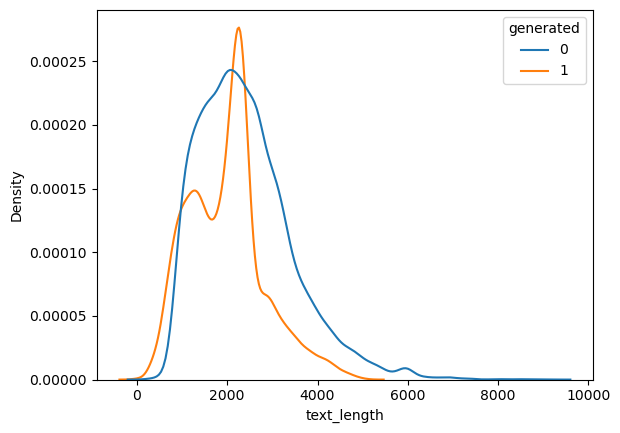

In [141]:
visualize('text_length')

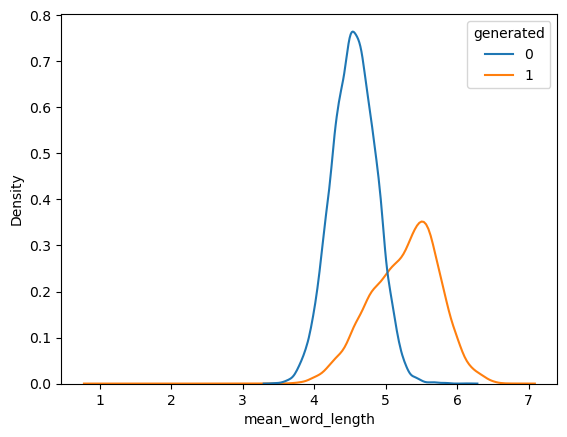

In [144]:
visualize('mean_word_length')

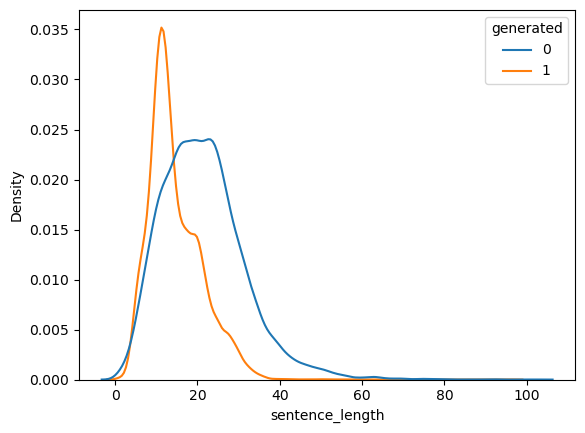

In [145]:
visualize('sentence_length')

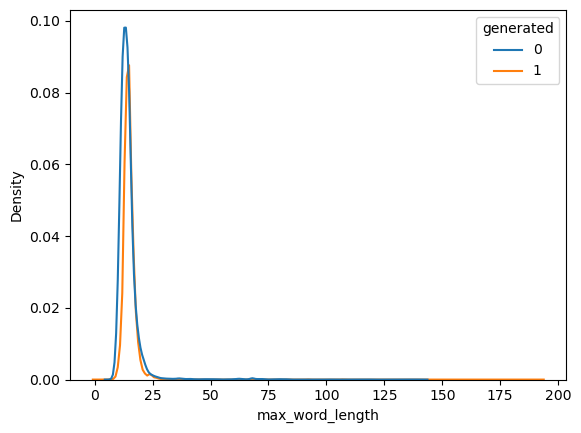

In [146]:
visualize('max_word_length')

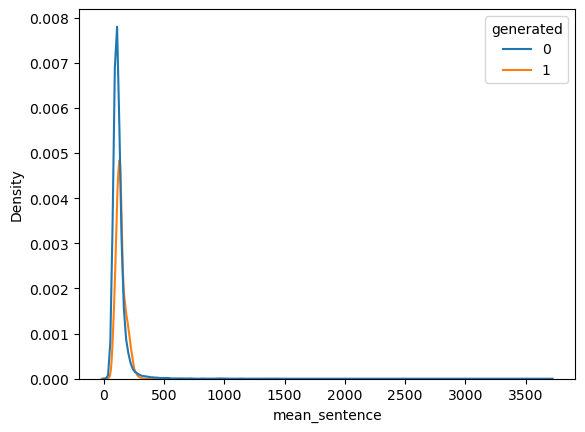

In [147]:
visualize('mean_sentence')

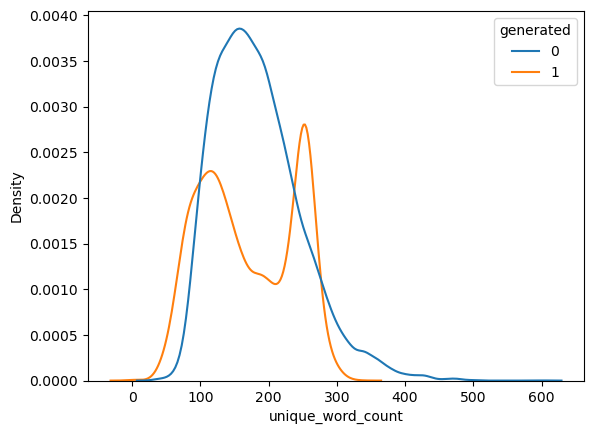

In [148]:
visualize('unique_word_count')

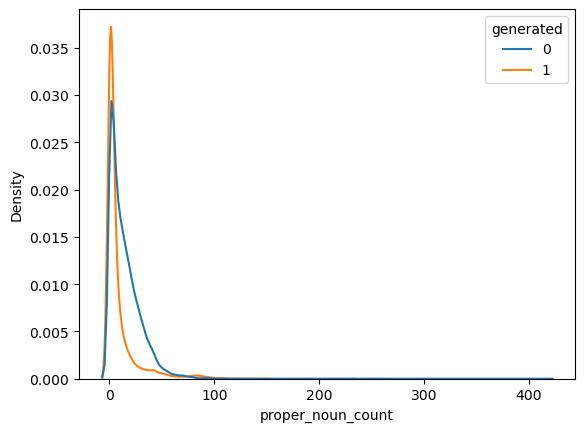

In [149]:
visualize('proper_noun_count')

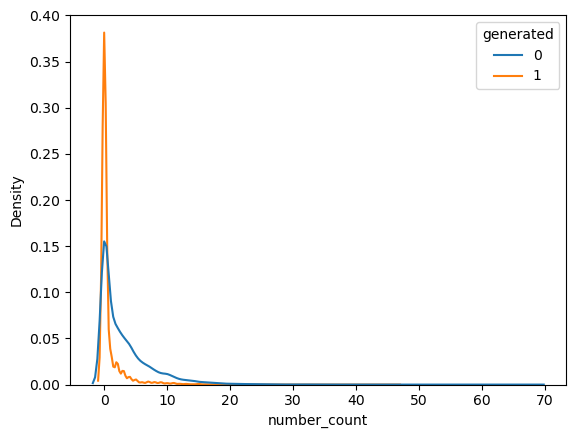

In [150]:
visualize('number_count')

In [152]:
import string
import nltk
import re
from spellchecker import SpellChecker

# Make sure to download the necessary NLTK resources if not done already
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')  # For POS tagging

def check_typos_and_replace(tex, index=None):
    spell = SpellChecker()

    # Print the index of the row being processed (optional)
    if index is not None:
        print(f"Processing row {index}: {tex[:50]}...")  # Print the first 50 characters for preview

    # Remove hyphenated words using regex (i.e., words with a hyphen)
    tex_clean = re.sub(r'\b\w+-\w+\b', '', tex)  # Removes words like 'car-centric', 'car-infested', etc.
    tex_clean = re.sub(r'\w+\'s\b', '', tex_clean)  # Removes possessive 's (e.g., John's, car's)

    # Remove digits (e.g., 123, 456, 789)
    tex_clean = re.sub(r'\d+', '', tex_clean)

    # Remove words that end with a period (e.g., "word." becomes "word")
    tex_clean = re.sub(r'\b\w+\.\b', '', tex_clean)

    # Remove punctuation
    tex_clean = re.sub(r'[^\w\s]', '', tex_clean)

    # Tokenize the cleaned text
    words = nltk.tokenize.word_tokenize(tex_clean)

    # POS tagging to identify proper nouns
    tagged_words = nltk.pos_tag(words)

    # Filter out proper nouns (NNP and NNPS tags are for singular and plural proper nouns)
    words_without_proper_nouns = [word for word, tag in tagged_words if tag not in ('NNP', 'NNPS')]

    # Remove punctuation and convert to lowercase
    words_filtered = [word.lower() for word in words_without_proper_nouns if word not in string.punctuation]

    # Find all the misspelled words
    misspelled = spell.unknown(words_filtered)

    # Replace the misspelled words with "TYPO"
    words_with_typos_replaced = [
        'TYPO' if word.lower() in misspelled else word
        for word in nltk.tokenize.word_tokenize(tex)
    ]
    
    # Reconstruct the text after replacing the misspelled words
    tex_with_typos_replaced = ' '.join(words_with_typos_replaced)

    print(f"Misspelled words: {misspelled}")

    return tex_with_typos_replaced

# Example usage with DataFrame
new_df['text_with_typos_replaced'] = df_train['text'].map(lambda tex: check_typos_and_replace(tex))


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sahanamanjunath/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/sahanamanjunath/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'urbanizing'}
Misspelled words: {'urbanizing'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'reenvision'}
Misspelled words: set()
Misspelled words: {'urbanizing'}
Misspelled words: {'urbanizing'}
Misspelled words: set()
Misspelled words: {'urbanized'}
Misspelled words: {'urbanizing'}
Misspelled words: {'reinvigorates'}
Misspelled words: {'reinvigorates'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Mi

Misspelled words: {'disenfranchisement'}
Misspelled words: {'inclusivity'}
Misspelled words: set()
Misspelled words: {'disenfranchisement', 'representativeness'}
Misspelled words: {'disenfranchisement'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'disenfranchisement'}
Misspelled words: {'inclusivity'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'disenfranchisement'}
Misspelled words: {'disenfranchisement', 'malapportionment'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'disenfranchisement'}
Misspelled words: set()
Misspelled words: {'disenfranchisement'}
Misspelled words: set()
Misspelled words: {'disenfranchisement'}
Misspelled words: {'disenfranchisement', 'marginalization'}
Misspelled words: {'disenfranchisement', 'inclusivity'}
Misspelled words: {'disenfranchisement', 'inclusivity'}
Misspelled words: {'marginalization', 'disenfranchisement'}
Misspelled words: set()
Misspelled words: {'conte

Misspelled words: set()
Misspelled words: {'vauban'}
Misspelled words: {'communitys'}
Misspelled words: set()
Misspelled words: {'livability', 'citys'}
Misspelled words: {'livability'}
Misspelled words: {'rosenthal', 'densification'}
Misspelled words: {'motorrosenthal', 'liferosenthal'}
Misspelled words: {'congestions'}
Misspelled words: set()
Misspelled words: {'inculcates', 'walkable'}
Misspelled words: {'consequentially', 'warranting'}
Misspelled words: set()
Misspelled words: {'rosenthal'}
Misspelled words: set()
Misspelled words: {'mobilities'}
Misspelled words: {'residentsselsky', 'rosenthal', 'turnhelp', 'advantagerosenthal'}
Misspelled words: {'livability'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'forefatherswe', 'vauban', 'essentialits'}
Misspelled words: {'st'}
Misspelled words: set()
Misspelled words: {'walkability'}
Misspelled words: set()
Misspelled words: set()
Misspelled wo

Misspelled words: {'conclution', 'slaters'}
Misspelled words: {'stressfulness', 'fivedays'}
Misspelled words: {'curtural', 'bydifferent', 'nearrecord', 'nonpolluted'}
Misspelled words: set()
Misspelled words: {'assuringly', 'bestlaid', 'collegewon'}
Misspelled words: {'southe', 'otheer', 'botheer', 'theings', 'regon', 'summarization', 'transregionally', 'anotheer', 'thean', 'witheholds', 'ratheer', 'theere', 'theeir', 'theose', 'havng'}
Misspelled words: {'tremendusly', 'excersice', 'adays', 'carsharing', 'bikesharing'}
Misspelled words: {'agrue'}
Misspelled words: {'nondemocratic'}
Misspelled words: {'allaround', 'overusage'}
Misspelled words: {'transregional', 'canidate'}
Misspelled words: {'overrelying', 'nearrecord'}
Misspelled words: {'greatlyin', 'winnertakeall', 'handthe', 'segreagationists', 'adwhat', 'occurancein', 'votesin', 'anywherein', 'electionin'}
Misspelled words: {'presists', 'hetic', 'hazardly', 'carintensive', 'nodriving', 'andor', 'carfree', 'enivornment', 'nearreco

Misspelled words: {'spoton', 'winnertakeall', 'popluar', 'hisher', 'candadate', 'ethicality', 'nondemocratic', 'theretofore', 'malapportionment', 'heshe'}
Misspelled words: {'recessin', 'arushhour', 'broas', 'importants', 'expent', 'carfree', 'canges'}
Misspelled words: {'intirely', 'certianlty', 'realx', 'storemarket', 'limitng', 'heathy', 'twoseated'}
Misspelled words: {'winnertakeall'}
Misspelled words: {'desision', 'statesin', 'absoloutly'}
Misspelled words: {'transportaion', 'acars', 'recived', 'benifit', 'drving', 'economicaly', 'benifital', 'obligagtions', 'poluted', 'economicly', 'decended', 'finacialy', 'maintence'}
Misspelled words: {'articlewhat', 'insterest', 'perfer', 'bestlaid', 'winnertakesall', 'plumerduring'}
Misspelled words: {'morotorists', 'nearrecord', 'carfree'}
Misspelled words: {'electorss', 'winnertakeall', 'electorsal', 'statesdidnt', 'omly', 'narrowminded', 'heshe'}
Misspelled words: {'carfree'}
Misspelled words: {'nummber', 'autiomotive', 'impliactions', 'ca

Misspelled words: {'excerise'}
Misspelled words: {'sya', 'soemone', 'dn', 'collge', 'yarsa', 'ovte'}
Misspelled words: {'bestlaid', 'campain', 'winnertakeall'}
Misspelled words: {'ahose', 'aypes', 'acaually', 'ahen', 'aruah', 'ahroughoua', 'poliaical', 'arusa', 'gea', 'saill', 'acaion', 'cannoa', 'ahink', 'wanaed', 'heshe', 'ahere', 'oaher', 'represena', 'voaes', 'elecaor', 'brougha', 'ahis', 'meana', 'elecaors', 'elecaoral', 'slighaly', 'dispises', 'jusa', 'bearayed', 'ahaa', 'beaaer', 'saaaes', 'ariple', 'expecaed', 'aie', 'presidenaial', 'differena', 'voaer', 'poina', 'sarongly', 'voaed', 'leaaer', 'paray', 'senaaor', 'voaing', 'amouna', 'opporauniay', 'boah', 'awo', 'aarnish', 'saaae', 'ahing', 'aake', 'aop', 'seleca', 'residenaial', 'ias', 'difficula', 'dedicaaed', 'naaionwide', 'ahey', 'unfaiahful', 'slaae', 'complicaaed', 'voaers', 'faca', 'definiaely', 'aheir', 'geas', 'presidena', 'biggesa', 'elecaion', 'bua', 'aurn', 'counaed', 'democraa', 'ahan', 'voae', 'opaion', 'aold', 'c

Misspelled words: {'resons', 'balence', 'snd', 'transregional', 'foundinding', 'collge', 'nessicarly', 'malapportionment', 'balenced', 'reson'}
Misspelled words: {'therewould', 'fivedays', 'carintensive', 'trafficbeing'}
Misspelled words: {'leanding', 'ciries', 'twoseat', 'fastgrowing', 'emmisions', 'sixyear', 'vechiles', 'feasable', 'undesireable', 'streetes'}
Misspelled words: {'likley', 'winnertakeall', 'bestlaid', 'certin', 'exsited', 'disaterous', 'mabey', 'afganistan', 'rarley'}
Misspelled words: {'thinds', 'lowcar', 'becaues', 'examplein', 'paking', 'hw', 'gasinsurance', 'bustrain', 'woould', 'scheduals'}
Misspelled words: {'defenderes', 'segragationists', 'winnertakeall', 'collegewon'}
Misspelled words: {'opions', 'presidental', 'giberish', 'electorsial', 'electorsal', 'emensly'}
Misspelled words: {'bestlaid', 'presidencyeven', 'winnertakesall'}
Misspelled words: {'bestlaid', 'nomineehowever', 'winnertakeall'}
Misspelled words: {'bestlaid', 's', 'backfiguratively', 'winnertakea

Misspelled words: {'aknowledge'}
Misspelled words: {'usgae', 'forcedly', 'carfree'}
Misspelled words: set()
Misspelled words: {'electorss', 'bestlaid', 'electorsal'}
Misspelled words: set()
Misspelled words: {'postively'}
Misspelled words: {'electorss', 'transregional', 'electorsal'}
Misspelled words: {'carreduced', 'bejjing', 'postoffice', 'th', 'unfixable', 'twentytwo', 'st', 'carfree', 's', 'emmisions'}
Misspelled words: {'carfee', 'excep', 'carfree'}
Misspelled words: {'signifigantly', 'inisuative', 'televison', 'vauban', 'carfree', 'saftey', 'sheller'}
Misspelled words: {'uasge', 'grocerys', 'liscense', 'industrys', 'exerpt', 'muchhappier', 'emmisions'}
Misspelled words: {'electorss', 'electorsal'}
Misspelled words: {'guarenteed', 'occurance'}
Misspelled words: {'doent', 'transpertation', 'humainity'}
Misspelled words: {'sdtarted', 'emmission', 'hererosenthal', 'pollutionselsky', 'carintensive', 'carfree', 'byrosenthal', 'emmissions'}
Misspelled words: {'acurate', 'acuizations', '

Misspelled words: {'votingchanging', 'descions', 'senates', 'vicepresident'}
Misspelled words: {'polute'}
Misspelled words: {'waysource', 'fivedays', 'smogthe', 'carintensive', 'worldsource', 'anywaysource'}
Misspelled words: {'evennumbered', 'twoseat', 'oddnumbered', 'carfree', 'advantag'}
Misspelled words: {'winnertakeall', 'possibleit', 'thinkg', 'bestlaid', 'ovte'}
Misspelled words: {'noticable', 'nearrecord', 'fastgrowing', 'truckfree', 'highdensity', 'fivedays', 'oddnumbered', 'carintensive', 'carfree', 'bikingfriendly'}
Misspelled words: set()
Misspelled words: {'waysource', 'strenghens', 'twoseat', 'stresssource', 'drasticallly', 'environmentsource'}
Misspelled words: {'winnertakeall'}
Misspelled words: {'cliton', 'recived', 'examplesource'}
Misspelled words: {'fibne', 'carsarticle', 'cararticle', 'certianly', 'imporve', 'bibycle', 'emissionsarticle', 'playingarticle', 'partening', 'beuatiful', 'maintian', 'underirable', 'oddnumbered', 'emissionsand', 'vechicle', 'connserve', '

Misspelled words: {'conjested', 'everage', 'triffic', 'carfree'}
Misspelled words: {'oddnumbered', 'carfree'}
Misspelled words: {'discused', 'firstworls', 'excersice', 'ejoy', 'difficultt', 'southamerican', 'envirionment', 'carfree', 'progect', 'refereing'}
Misspelled words: {'nondemocratic', 'candiates'}
Misspelled words: {'sidealks', 'postively', 'carfree', 'authories', 'visitied', 'longlasting', 'nearrecord'}
Misspelled words: {'stressreliever', 'exersize', 'fastmoving', 'contries', 'tv', 'stressfree'}
Misspelled words: {'winnertakeall', 'electoras', 'shehe', 'himher', 'electoralvote', 'pluraity', 'heshe'}
Misspelled words: {'amerian'}
Misspelled words: {'procar', 'persistsit', 'carfree', 'ecofriendly', 'nearrecord'}
Misspelled words: {'easilyand', 'carfree', 'aproximently'}
Misspelled words: {'statecandidates', 'trueits', 'winningfocusing', 'winnertakesall'}
Misspelled words: {'goverened'}
Misspelled words: {'drasically', 'housingfoodclothing', 'deffintley'}
Misspelled words: {'eve

Misspelled words: {'unneccesary', 'transregional', 'transregionality', 'electoralvote'}
Misspelled words: {'unneed', 'bestlaid'}
Misspelled words: {'techanically'}
Misspelled words: {'campaignto', 'candidatesknowing'}
Misspelled words: {'prefferable', 'persistsand', 'willit'}
Misspelled words: {'worldy', 'atwo', 'carintensive', 'carfree', 'ecofriendly'}
Misspelled words: {'electionsin', 'winnertakeall', 'transregional', 'elecotral', 'elecotrol', 'bestlaid', 'malapportionment'}
Misspelled words: {'voteinstead', 'votesometimes', 'worksbetter', 'halfand', 'stateswe', 'badthere', 'peoplethats', 'peopleanyone'}
Misspelled words: {'evennumbered', 'carowner', 'oddnumbered', 'phyci', 'carfree', 'recind', 'nearrecord'}
Misspelled words: {'uruly', 'relected'}
Misspelled words: {'prosperic', 'bikesharing'}
Misspelled words: {'nonreusable', 'nearrecord', 'phisicaly'}
Misspelled words: {'tims', 'destations', 'knowone'}
Misspelled words: {'stressrelieving', 'sprunglimiting', 'costcutting', 'carfree'

Misspelled words: {'chanse', 'desiding', 'transregional', 'thta', 'candidatee', 'twored', 'colleg', 'prosse', 'presidenttal', 'croos', 'contry', 'colled', 'presidentt', 'presidentd', 'candidatees'}
Misspelled words: {'occuring', 'bestlaid', 'fatasses'}
Misspelled words: {'evennumbered', 'oddnumbered', 'carintensive', 'inhabitablepassenger', 'faclities', 'cityselsky', 's', 'limting'}
Misspelled words: {'winnertakeall'}
Misspelled words: {'rushhour', 'emmisons', 'smag', 'stressfree', 'spreadout'}
Misspelled words: {'winnertake', 'vicepresident'}
Misspelled words: {'ecofriendly', 'bejings'}
Misspelled words: {'electionns', 'electionn'}
Misspelled words: {'metrorails', 'carintensive', 'liscences', 'carfree'}
Misspelled words: {'doesent', 'inconvience'}
Misspelled words: {'bbetter', 'pllace', 'anythinng', 'aactive', 'runninng', 'bbe', 'onnly', 'helthier', 'protectionn', 'muuch'}
Misspelled words: set()
Misspelled words: {'electorss', 'runoffs', 'bestlaid', 'presidentbut', 'electorsal'}
Miss

Misspelled words: {'electorss', 'electorsal'}
Misspelled words: {'propoganda', 'bestlaid', 'anchorism', 'governemt', 'infulenced'}
Misspelled words: {'isint'}
Misspelled words: set()
Misspelled words: {'selfconfidence', 'yearolds'}
Misspelled words: {'ineffeciency', 'liscense', 'carfree', 'availabel', 'threequarters', 'enviornment'}
Misspelled words: {'fiftyseven', 'carfree'}
Misspelled words: {'countyr', 'finner', 'hastle', 'stressfree', 'accelerateit', 'walkingor', 'machinerery', 'amkes', 'wolrd', 'noitced', 'andor', 'carfree', 'walikng', 'nearrecord', 'imporvement'}
Misspelled words: {'twoseat', 'transportaion', 'fivedays'}
Misspelled words: {'counrty', 'transregional', 'adiquate', 'casse', 'voterswould', 'vorters', 'prosses', 'statesource', 'representativessource', 'numerus', 'electionparagraph', 'heshe'}
Misspelled words: {'statessource', 'winnertakeall', 'electoralvote', 'theelectoral', 'statesource', 'irrationalsource', 'appeciate', 'votesource'}
Misspelled words: {'evennumbered

Misspelled words: {'wellinformed', 'decisionmaking'}
Misspelled words: {'diseal', 'tragdey', 'telecommunting', 'europeand', 'prority', 'sparatic', 'carintensive', 'carbanning', 'realtionship'}
Misspelled words: {'vehical', 'poluting', 'piblic', 'skatedto', 'restaurantshave', 'networkto', 'drivethru', 'excercize', 'nearrecord', 'emensly'}
Misspelled words: {'electoal', 'fianl', 'opprotunity'}
Misspelled words: {'plumer', 'welleducated', 'occured', 'onehalf'}
Misspelled words: {'outdates', 'winnertakeall', 'transregional', 'timw', 'hisher', 'nondemocratic', 'refelct', 'presedential'}
Misspelled words: {'usge', 'twoseat', 'rushhour', 'gaint', 'infont', 'sufficent', 'longlasting'}
Misspelled words: set()
Misspelled words: {'elecoral', 'bestlaid', 'veiws', 'nondemocratic', 'acurrate', 'legislaure'}
Misspelled words: {'evennumbered', 'polution', 'transortation', 'rushhour', 'sourse', 'carintensive', 'carfree', 'pedestrianfriendly', 's', 'nearrecord'}
Misspelled words: {'nothern', 'atmoshpere

Misspelled words: {'anachroism'}
Misspelled words: {'limitng', 'civialian', 'substancioully', 'drasitcally'}
Misspelled words: {'carintensive', 'exerpt'}
Misspelled words: {'basiclly'}
Misspelled words: {'concideration', 'popluation', 'pleanty', 'rd', 'winnertakesall'}
Misspelled words: {'carintensified', 'licesnses', 'alreading', 'carfree'}
Misspelled words: {'twoseated'}
Misspelled words: {'poluting', 'experiance', 'trasprotation', 'effectivly', 'postitive', 'ultimatly', 'pedestrain', 'notacable', 'vauban', 'carfree', 'nearrecords', 'bikesharing'}
Misspelled words: {'evennumbered', 'intesifying', 'motorrosenthal', 'dayduffer', 'restrictment', 'ongiong', 'acounter', 'afternoon', 'decresased', 'oddnumbered', 'trainor', 'cityduffer', 'toals', 'communityrosenthal', 'nearrecord'}
Misspelled words: {'rushhour', 'nearrecord'}
Misspelled words: {'statedemocrats', 'bestlaid', 'carryint'}
Misspelled words: {'wll', 'vaild', 'responsiblitiy', 'winnertakeall', 'collegewon', 'wirthy', 'resposibili

Misspelled words: {'lowcar', 'influencial', 'authorites', 'plaaced', 'nearrecord'}
Misspelled words: {'stressfree', 'emergencys', 'twoseated', 'bogotacolombia'}
Misspelled words: {'trainerand', 'twoseat', 'rushhour', 'waysaid', 'transportations', 'carfree', 'nearrecord'}
Misspelled words: {'outweighted'}
Misspelled words: {'transregional', 'stateshigher', 'possibleit', 'disenfranchisedto', 'stateslower'}
Misspelled words: {'canadite', 'twothousand', 'pluarity', 'ninty'}
Misspelled words: {'nonuse', 'henious', 'noncar', 'preserverence'}
Misspelled words: {'presdient', 'pubilicly', 'campagin', 'staes'}
Misspelled words: {'transregional', 'chooosing', 'vicepresidential', 'bestlaid', 'collegee'}
Misspelled words: {'todayhow', 'likley', 'lowcar', 'unnatrual', 'carintensive'}
Misspelled words: {'presidencty', 'deserver', 'collegee'}
Misspelled words: {'winnertakeall'}
Misspelled words: {'rase', 'legislatiors', 'deisel', 'carintensive', 'nearrecord'}
Misspelled words: set()
Misspelled words: 

Misspelled words: {'twoseat', 'nearrecord', 'carfree'}
Misspelled words: {'addionally', 'fivedays', 'carowner', 'fantasic', 'carfree', 'stressfree'}
Misspelled words: {'mantanence', 'mantanance', 'obeisity', 'polution'}
Misspelled words: {'worseplumer', 'winnertakeall', 'winand', 'electorsposner', 'citizenswhat', 'campaing', 'haoory'}
Misspelled words: {'embaresseed', 'zroom', 'nearrecord'}
Misspelled words: {'nondemocratic', 'winnertakeall', 'whjat'}
Misspelled words: {'carlimited', 'st', 'carfree'}
Misspelled words: {'amont'}
Misspelled words: {'evennumbered', 'peopkle', 'donr', 'exersise', 'oddnumbered', 'carfree', 'phenominon', 'nearrecord', 'yearolds'}
Misspelled words: {'enivornment'}
Misspelled words: {'contentions', 'winnertakeall', 'governmentation', 'occuring', 'winnertakesall', 'corruptness'}
Misspelled words: {'baed', 'regoins', 'collegeby', 'intrests', 'nondemocratic', 'workmuch', 'peopleno'}
Misspelled words: {'enebidable', 'benefitial', 'comute', 'jubilating', 'carintens

Misspelled words: {'rushhour', 'carintensive'}
Misspelled words: {'garges', 'nearrecord', 'technologydependent', 'fivedays', 'carintensive', 'vehiclefree', 'daytoday', 'skatedto'}
Misspelled words: {'caos'}
Misspelled words: {'greenhousee', 'storerestaurant', 'recents', 'arangementsand', 'carsthe', 'hikedskated', 'parkingdriveways', 'countriesit', 'restablish', 'blossemed', 'cellphonesinternet', 'replacedthe', 'jamssmog', 'usethis', 'recontruction', 'outweight', 'extravagent', 'citystreet', 'carintensive', 'polution'}
Misspelled words: {'previlge', 'comapany'}
Misspelled words: {'carband', 'attmepts', 'carfree', 's', 'nearrecord'}
Misspelled words: set()
Misspelled words: {'cigerate', 'carintensive', 'tighted', 'connectednetwork'}
Misspelled words: {'todayas', 'gasrun', 'oddnumbered', 'societyas', 'carfree'}
Misspelled words: {'twoday', 'twoseat', 'summerlife', 'comuting', 'violaters', 'annualy', 'firie', 'gimmance', 'ecofriendly', 'upperclass'}
Misspelled words: {'costfriendly', 'carf

Misspelled words: {'stepback', 'bikingwalking', 'uscan', 'nocar', 'overdrivinginteractive'}
Misspelled words: {'s', 'bestlaid'}
Misspelled words: {'persits', 'convinant', 'rushhour'}
Misspelled words: {'licensedplate', 'transpotation', 'acounts', 'vitamen', 'telework', 'becomeing', 'grately', 'accomodating'}
Misspelled words: {'lopnger', 'recsession', 'didint', 'reasearch', 'pm', 'moeny', 'proirity', 'cvonstructed', 'contries', 'dirve', 'emmisons', 'carfree', 'orther', 'getyting', 'erupean', 's', 'eassy'}
Misspelled words: {'sivak'}
Misspelled words: {'captial', 'parituclar', 'gasemitting', 'carfree', 'alternativees', 'timerelated', 'nearrecord', 'tranportation'}
Misspelled words: {'transregional'}
Misspelled words: {'agenst', 'likley', 'accomplashment', 'colleage', 'flordia', 'withought', 'practicly', 'wone', 'actuially', 'supposto', 'sofar'}
Misspelled words: {'winnertakeall', 'transregional', 'analyzingthe', 'possibleit', 'bestlaid', 'deside'}
Misspelled words: {'voteers', 'votee', 

Misspelled words: {'bumpertobumper', 'saidwhen', 'aboutinstead', 'bycle', 'goodway', 'hybridelectric', 'polution'}
Misspelled words: {'evennumbered', 'saidwhen', 'totake', 'afterwards', 'drivng', 'stresss', 'happierthis', 'opportunit', 'awat'}
Misspelled words: {'limted', 'carintensive'}
Misspelled words: {'walkable'}
Misspelled words: {'walkable'}
Misspelled words: set()
Misspelled words: {'livability'}
Misspelled words: {'livability', 'walkable'}
Misspelled words: {'livability'}
Misspelled words: {'livability'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'walkable'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'walkability', 'walkable'}
Misspelled words: {'walkability'}
Misspelled words: set()
Misspelled words: {'walkable'}
Misspelled words: set()
Misspelled words: {'walkable'}
Misspelled words: {'walkable'}
Misspelled words: set()
Misspelled words: {'vauban', 'walkable'}
Misspelled words: se

Misspelled words: set()
Misspelled words: {'contestation', 'rd'}
Misspelled words: set()
Misspelled words: {'representativeness'}
Misspelled words: {'disenfranchisement'}
Misspelled words: {'apportionment', 'counterclaims', 'inclusivity'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'disenfranchisement'}
Misspelled words: {'marginalization'}
Misspelled words: {'runoffs'}
Misspelled words: {'malapportionment'}
Misspelled words: set()
Misspelled words: {'inclusivity'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'disenfranchisement'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'inclusivity'}
Misspelled words: {'disenfranchisement'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'disenfranchisement'}
Misspelled words: set()
Misspelled wor

Misspelled words: set()
Misspelled words: {'walkability'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'urbanized', 'citys', 'rosenthal'}
Misspelled words: {'forefronts'}
Misspelled words: set()
Misspelled words: {'walkable'}
Misspelled words: {'rosenthal'}
Misspelled words: {'infrastructural'}
Misspelled words: {'rosenthal', 'vauban'}
Misspelled words: set()
Misspelled words: {'overemphasis', 'infrastructural'}
Misspelled words: {'potentiates', 'metropolises'}
Misspelled words: {'rosenthal'}
Misspelled words: set()
Misspelled words: {'rosenthal', 'previse'}
Misspelled words: set()
Misspelled words: {'urbanized'}
Misspelled words: {'elucidates'}
Misspelled words: {'liming'}
Misspelled words: {'policymaking', 'vaubans'}
Misspelled words: {'elucidates'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'livability', 'soundscaping', 'walkability'}
Misspelled words: {'rosenthal', 'consequentially', 'downturns', 'st'}
Misspelled

Misspelled words: {'mph', 'st'}
Misspelled words: set()
Misspelled words: {'gps'}
Misspelled words: {'occured'}
Misspelled words: {'edgarsnyder', 'comcellstatistics', 'httpswww', 'html'}
Misspelled words: set()
Misspelled words: {'insatiately'}
Misspelled words: {'carplay', 'mh'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'mph'}
Misspelled words: {'s'}
Misspelled words: set()
Misspelled words: {'b'}
Misspelled words: set()
Misspelled words: {'impoundmentwww', 'accidentwww', 'askadamskutner', 'lawwww', 'legalmatch', 'theodysseyonline', 'drivewithsentinel'}
Misspelled words: {'contentions'}
Misspelled words: {'gps', 'j', 'pm'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'deathinjury', 'vs'}
Misspelled words: set()
Misspelled words: {'juss'}
Misspelled words: {'himher'}
Misspelled words: {'gps'}
Misspelled words: {'html', 'htm', 'mph', 'httpswww', 'netsafeutah', 'nhtsa', 'ausciencearticles', 'or

Misspelled words: {'mph'}
Misspelled words: set()
Misspelled words: {'kmh', 'carsguide', 'httpswww'}
Misspelled words: set()
Misspelled words: {'othersdrivers', 'hydroplaning', 'phonestextingetc'}
Misspelled words: {'hg', 'comaccidentstatistics', 'html', 'www', 'usatoday', 'compacity', 'comstorynewsdriving', 'edgarsnyder'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'html', 'comamp', 'thezebra', 'httpswww', 'comampswww'}
Misspelled words: set()
Misspelled words: {'comtechniques', 'cominfocardriving', 'www', 'driversed', 'esurance', 'aspx'}
Misspelled words: {'hisher', 'sippers', 'st'}
Misspelled words: {'boyfriendgirlfriend'}
Misspelled words: {'handsfree'}
Misspelled words: {'deferent'}
Misspelled words: {'bannedpementid'}
Misspelled words: set()
Misspelled words: {'bluetooths'}
Misspelled words: {'gps'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'b'}
Misspelled words: {'x', 'mph'}
Misspelled words: set()
Misspelle

Misspelled words: set()
Misspelled words: {'driversalert'}
Misspelled words: {'sixfold'}
Misspelled words: {'advoiding'}
Misspelled words: {'ager'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'hisher'}
Misspelled words: set()
Misspelled words: {'girlfriendboyfriend', 'drivertime'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'drivinglaws', 'html', 'www', 'orggeorgia', 'php', 'cdc', 'andor'}
Misspelled words: {'districation'}
Misspelled words: {'mph'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'comaccidentstatistics', 'html', 'prg', 'httpswww', 'edgarsnyder'}
Misspelled words: {'th'}
Misspelled words: set()
Misspelled words: {'texttalk'}
Misspelled words: {'comarticles', 'comarticle', 'istics', 'html', 'legalmatch', 'htmlhttpswww', 'httpswww', 'comaccidentstat', 'g', 'teendriversource', 'dmvcheatsheets', 'edgarsnyder'}
Misspelled words: set()
Misspelled words: {'mph'}
Mis

Misspelled words: set()
Misspelled words: set()
Misspelled words: {'possessionwhile', 'messageusing', 'effectthis'}
Misspelled words: {'dmv'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'extinganddriving', 'httpswww', 'comaccidentstatis', 'x', 'edgarsnyder'}
Misspelled words: {'th'}
Misspelled words: {'mph'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'c', 'retrived', 'drivingschool', 'teendriving'}
Misspelled words: {'weeksor', 'directionsor'}
Misspelled words: {'attentitative'}
Misspelled words: {'distination'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'html', 'mph', 'httpswww', 'comaccidentstatis', 'x', 'edgarsnyder'}
Misspelled words: {'st'}
Misspelled words: set()
Misspelled words: {'breakstop', 'moreoverusing', 'auwhile', 'www', 'orgcronewsi', 'htm', 'livescience', 'html', 'ndex', 'safetynewsalert', 'comdriving', 'carsguide', 'consumerrepo

Misspelled words: {'comaccidentstatistics', 'html', 'httpswww', 'statista', 'x', 'edgarsnyder', 'comstatistics'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'collinson', 'httpsteensafe', 'bamm'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'html', 'ft', 'kmh', 'mph', 'httpswww', 'cdc'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'himherself', 'hisher'}
Misspelled words: set()
Misspelled words: {'yearcenter'}
Misspelled words: {'gps', 'occured'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'comregionnewsbfed', 'nytimes', 'comaccidentstatistics', 'html', 'www', 'northwestgeorgianews', 'mph', 'comstate', 'liljegrenlaw', 'combusiness', 'edgarsnyder'}
Misspelled words: {'phonedevice', 'citationticket', 'andor', 'phonesmobile', 'phonemobile'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: s

Misspelled words: set()
Misspelled words: {'millenials'}
Misspelled words: set()
Misspelled words: {'compulsivity', 'www', 'orgnewspressreleasesgirls'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'gps'}
Misspelled words: {'unadvisable'}
Misspelled words: set()
Misspelled words: {'enddd', 'httpswww', 'sciencemag', 'nhtsa', 'orgresearchcost', 'orgnews', 'friendit'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'imessage'}
Misspelled words: set()
Misspelled words: {'th', 'textingcalling', 'occuring', 'appulade', 'edgarsnyder'}
Misspelled words: {'branlawfirm', 'www', 'supermoney', 'accidentsthat', 'asirt'}
Misspelled words: {'comaccidentstatistics', 'nsc', 'html', 'orginfographics', 'www', 'httpswww', 'edgarsnyder'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'andor'}
Misspelled words: set()
Misspelled words: {'cupholder', 'comaccidentstatistics', 'htm

Misspelled words: {'benifit', 'emisions', 'violaters', 'imense', 'expirement'}
Misspelled words: {'extracirricular', 'powerplants', 'pollutution'}
Misspelled words: {'contribuation', 'smogs', 'differnet', 'polution'}
Misspelled words: {'maintnence', 'seperatly', 'irresponsable', 'hosue', 'efficent', 'infuence', 'hapier', 'emmision'}
Misspelled words: {'fuems', 'efects', 'atmoshpere', 'emisions', 'thigs', 'eveerything', 'countrioes', 'negativly', 'sacrafices', 'emmisions'}
Misspelled words: {'ussage', 'franceafter', 'ambitous', 'suburan', 'somg', 'pollutinsparis', 'apoted', 'vauban', 'statesgreenhouse', 'swimmingthis', 'staes'}
Misspelled words: {'saidwhen', 'contributer', 'bycle', 'goodway', 'hybridelectric', 'polution'}
Misspelled words: {'oursleves', 'otherss', 'advantge', 'helpiing', 'peoplw', 'thtne', 'findfing', 'perentage', 'bttter'}
Misspelled words: {'poluting', 'emissionsin', 'advanteges', 'liveing', 'environmentel', 'polution'}
Misspelled words: {'daytwo', 'suprisingly', 'tra

Misspelled words: {'finacial', 'orded', 'wrose', 'll', 'saftey', 'hvaing'}
Misspelled words: {'brething', 'pm', 'reasources', 'thinbgs', 'smogsource', 'inhaledsource', 'sidewaalks', 'districs', 'capitalslast'}
Misspelled words: {'simplier', 'auther'}
Misspelled words: {'rivale', 'transportations'}
Misspelled words: {'enviornment', 'ruducing', 'polution'}
Misspelled words: {'sorce', 'souce', 'walkside', 'bewteen', 'devoided', 'afterschool', 'polution'}
Misspelled words: {'apporach', 'condiction', 'disctict', 'compaines', 'autombiles', 'lisnces', 'envorment', 'commuties', 'higways', 'enviorment', 'inprove', 'intowhen', 'parkingdriveways', 'envoriment', 'soures', 'investgion'}
Misspelled words: {'occuring', 'fourced', 'chalanging', 'volaters', 'imitions', 'illiminated', 'inhabitance', 'sufficently', 's', 'souly'}
Misspelled words: {'distan', 'captial', 'wys', 'passgeners', 'envoirnment', 'chripping', 'histroy', 'transportaiont', 'wemt', 'progam', 'enviornment', 'tranportation'}
Misspelled

Misspelled words: {'injurying', 'occuring', 'gasesbut', 'enviorment', 'passaenger', 'futhermore'}
Misspelled words: {'advantge', 'transportion', 'poves', 'worsend', 'natrual', 'trainsairplanes', 'inveted', 'contriversies', 'vaule', 'automoblies', 'spanwed', 'importanly', 'triaumph', 'intnsity', 'baning', 'advantges', 'advantegs'}
Misspelled words: {'trasportation', 'benifits', 'acounts', 'benifit', 'consecative', 'addaptive', 'vehicals', 'desile', 'preseve', 'coincadense', 'polution'}
Misspelled words: {'avaliable', 'idesel', 'citys', 'greaf', 'gatorbait'}
Misspelled words: {'immortilized'}
Misspelled words: {'pubilc', 'opperating', 'heatlhy', 'injest', 'euope', 'polute', 'ciies', 'responisbilities', 'environtment', 'enviornment', 'lathargic', 'polution'}
Misspelled words: {'acception', 'pedesrtian', 'improvee', 'neccesity', 'enviornment', 'districs', 'emmisions'}
Misspelled words: {'patial', 'moter', 'busss', 'showes', 'polloution', 'involed', 'gass', 'reasoures', 'atomshere', 'qoute'

Misspelled words: {'occuring', 'deviod', 'excersise'}
Misspelled words: {'ovcourse', 'diesal', 'limitig', 'polution'}
Misspelled words: {'neccesities', 'posessions', 'makehave', 'foood', 'bikinng', 'ourseleves'}
Misspelled words: {'transportion'}
Misspelled words: {'revoluntionary'}
Misspelled words: {'oursleves', 'exhuast', 'souce', 'usuage', 'citiesrosenthal', 'greenshouse', 'departements', 'violaters', 'pulluted', 'efficent', 'enviorment', 'transportationrosenthal'}
Misspelled words: {'aarons'}
Misspelled words: {'devoided'}
Misspelled words: {'largly', 'communityneighborhood', 'vehicals'}
Misspelled words: {'bycicles', 'hwo'}
Misspelled words: {'limmited', 'anough', 'baned', 'grocerys'}
Misspelled words: {'vehical', 'mangable', 'vehicale', 'freiburg', 'abudnce', 'vehicals', 'vaubans', 'popluation', 'vehiclas', 'rebiltaion'}
Misspelled words: set()
Misspelled words: {'hault', 'complient', 'enviorment'}
Misspelled words: {'pargraph', 'nonfar'}
Misspelled words: {'polcy'}
Misspelled w

Misspelled words: {'waiste'}
Misspelled words: {'liming', 'cr'}
Misspelled words: {'advatages', 'emmisions'}
Misspelled words: {'laeve', 'necesity', 'transportaions', 'drivways', 'refelct', 'chidlren', 'polution'}
Misspelled words: {'prved'}
Misspelled words: {'westeren', 'whitch', 'sidewalkes', 'rd'}
Misspelled words: {'afterward', 'hevily'}
Misspelled words: set()
Misspelled words: {'linces', 'thst', 'resoult', 'smogs', 'troughtout', 'partialy', 'thouroughfared', 'affiar', 'garege', 'dollers', 'forvident', 'wayheidrum'}
Misspelled words: {'advanatges', 'intensyfying', 'guranteed', 'househols', 'vehicel', 'transportaion', 'damae', 'enviornment', 'smogthe', 'beneifcial', 'evidnce', 'receivin', 'parial'}
Misspelled words: {'countires', 'differerent', 'maintance', 'benifit'}
Misspelled words: {'saveing', 'uasge', 'satfier', 'esle', 'molre', 'interst', 'accesibletily', 'driveeing', 'thta', 'liveing', 'accomplush', 'coulpe', 'woulod', 'peolpe', 'walikng', 'satfy', 'convering', 'cultral'}
M

Misspelled words: {'honist', 'diying', 'byut', 'sudi', 'netre', 'relised', 'distroit', 'dd', 'hahahah', 'laff', 'whell', 'dimind', 'sining', 'usly', 'reeeeaaalllly', 'minezs', 'sowrds', 'waas', 'dworf', 'idal', 'coolits', 'dungis', 'munny', 'humin', 'fiting', 'techers', 'sonds', 'pointsin', 'agrewith', 'pasige', 'selll', 'parighraph', 'teinkal', 'dimentchins', 'ummmmmmm', 'saterday', 'drgon', 'soooooyou', 'goodnis', 'littal', 'bordgame', 'ddthats', 'whold', 'opin', 'pepol', 'gamne', 'whall', 'eirth', 'wizzerd', 'intint', 'lotr', 'uggggg', 'patricks', 'pepal', 'arows', 'gasis', 'drowf', 'elington', 'adventer', 'problom', 'serton', 'tierd', 'likr', 't', 'lookif', 'lazzy', 'lepriconelf', 'dolers', 'yaaaaaa', 'amarican', 'twinkal', 'draginsand', 'choce', 'tipe', 'aslep', 'polution'}
Misspelled words: {'opprotunity'}
Misspelled words: {'rapidily', 'communites', 'ultimitely'}
Misspelled words: {'uneccessary', 'malitiant', 'deceases', 'inmobile', 'benefitial', 'helathier', 'limitng', 'penulti

Misspelled words: {'avantages', 'hikedbiked', 'pravite', 'perfer', 'surburbs', 'limitng', 'cathcing', 'eerrily', 'inconclusion', 'reseidents', 'advantgaes'}
Misspelled words: {'trainerand', 'wrose', 'commuitty', 'waysaid', 'transportations', 'traffis'}
Misspelled words: {'greenwith', 'regualr', 'envoironment', 'polution'}
Misspelled words: {'showsclombians', 'decrese', 'responisible', 'recless', 'pollotion', 'n', 'possitive', 'propsed', 'pedestrianbicycleprivate', 'emissins', 'polloute', 'unessacary', 'polloting', 'cappital', 'hikedbikedskated'}
Misspelled words: {'usuage', 'arestreet', 'shaing', 'amercican', 'egde', 'alloowed'}
Misspelled words: {'redused', 'peogram', 'gradualy', 'plannig'}
Misspelled words: {'dramtically'}
Misspelled words: {'advangtages', 'transportaion', 'sqaure', 'captial', 'transportantion', 'usuage', 'trasportant', 'geberally', 'separting', 'unnessacery', 'nessacery', 'trasportantion', 'communties', 'movenment'}
Misspelled words: {'tecnologies', 'twenteith', 'sc

Misspelled words: {'poplations', 'walkride', 'benifit', 'usuage', 'imossible', 'curlture', 'violaters', 'convienient'}
Misspelled words: {'develpoment', 'droven', 'violaters', 'polutuion', 'enviorment', 'bicyclers', 'oppertunity', 'polution'}
Misspelled words: {'restaraunts', 'emmisions'}
Misspelled words: {'whcih', 'cardiovascualr', 'controversey', 'envirment', 'fuelmoney', 'efficent', 'greenhose'}
Misspelled words: {'citysource'}
Misspelled words: {'eletric', 'rideing', 'contrys', 'vroomvroom'}
Misspelled words: {'poluition', 'decresaed', 'colomian', 'exauhst', 'reasearch', 'reportswhat', 'demogaphic', 'usgae', 'statesall', 'emisions', 'sayswhen', 'transportatin', 'slowy', 'vehichle', 'limting', 'polution'}
Misspelled words: {'prefering', 'cityuneven', 'pollutionalso', 'liscense'}
Misspelled words: {'trafficthe', 'causeing', 'coveres', 'perecent', 'cleanier', 'perticulate', 'bikeing', 'grreenhouse', 'benfits', 'delevoped', 'broadsmooth', 'pollutionstressand', 'enivornment', 'permitte

Misspelled words: {'drving', 'jamsthis', 'yesturday', 'enigines', 'worldi', 'smogthey', 'hikedbikedskated'}
Misspelled words: {'negativially', 'expierment', 'largets', 'emmsions', 'pirus', 'benefitial', 'incovience', 'forbidion', 'incovencies', 'doubtly', 'massivally', 'mindsets', 'ultimatly', 'attmosphere', 'emuissions', 'thoughbut', 'subburban', 'inconvience', 'utitmatly', 'relased', 'invetnions', 'dirve'}
Misspelled words: {'exspecially', 'drribing', 'presists', 'cabon', 'broder', 'nd', 'negitive', 'twon', 'liscenses', 'avaliable', 'reccession', 'marke', 'eneficial', 'neccesity', 'enviorment', 'mobiltiy', 'transpertation', 'liscences'}
Misspelled words: {'apporved', 'trainbikeor', 'exhust', 'soure', 'syrockiting', 'cityuneven', 'pririties', 'improvent', 'complainig', 'withits', 'pulluting', 'beome', 'cummuting', 'reson'}
Misspelled words: {'wndering', 'communty', 'transpotation', 'capitla', 'accessibality', 'eneven', 'evidense', 'expirements', 'exessive', 'odered', 'expirement', 'cu

Misspelled words: {'effiecient', 'captial', 'occuring', 'paragrpah', 's', 'comporable'}
Misspelled words: {'toact', 'frane'}
Misspelled words: {'peacefuly', 'hikebikeskate', 'parisfrance', 'satrt', 'motocycle', 'yera', 'biclyce', 'streert'}
Misspelled words: {'stree', 'advantanges', 'usuage', 'redused', 'reduse', 'sorcure'}
Misspelled words: {'wouldent', 'healther', 'paymeny', 'donig', 'imiting', 'survie', 'gass', 'polluated', 'partsect', 'respotory', 'nedd', 'realse', 'constsntly', 'polluation'}
Misspelled words: {'resposible', 'saftey', 'benifit'}
Misspelled words: {'countires', 'transportataion', 'hamful', 'spead'}
Misspelled words: {'ambulence', 'deisel', 'appoitment', 'deffinitly', 'carrages'}
Misspelled words: {'hmm', 'enflicting', 'envirnment', 'artcile', 'endarging'}
Misspelled words: {'technicianmechanic'}
Misspelled words: {'vehical', 'machinerary', 'enviormentally', 'cruize', 'transporation', 'scrapebookpriceless', 'unnessacary', 'auotmobiles', 'automoblies', 'achives', 'chi

Misspelled words: {'transportantion', 'trafficpedestrians', 'commericial'}
Misspelled words: {'spacefor'}
Misspelled words: set()
Misspelled words: {'exampleautomobiles', 'instancewhen', 'capitalduffer', 'pollutionselsky', 'wayrosenthal', 'tailpipesrosenthal', 'happyless'}
Misspelled words: {'privellege', 'drving', 'ploicy', 'benifts'}
Misspelled words: {'rescources'}
Misspelled words: {'enviornment', 'violater', 'permenantely', 'simplier'}
Misspelled words: {'resposible', 'stressedto', 'surburban', 'citysource', 'pollutionsource', 'safetysource', 'andor', 'highwaysource', 'industrysource', 'timeinstead'}
Misspelled words: {'gety', 'privelage', 's', 'ellude'}
Misspelled words: {'pollutuion'}
Misspelled words: {'imformation', 'complety', 'privite', 'nd', 'conturies', 'sububs', 'writter', 'smoged', 'paragragh', 'artical', 'camaign', 'imporving'}
Misspelled words: {'emmitted', 'excersize', 'humanaty', 'shotages', 'g', 'rthat', 'liscences'}
Misspelled words: {'catergorically', 'turnmoil', 

Misspelled words: {'percantage', 'suffere', 'tailpipespassenger', 'pollutionnot', 'beneifts', 'upsource', 'licese', 'pollutution', 'comared'}
Misspelled words: set()
Misspelled words: {'promissing', 'inovative', 'increace', 'excersize', 'obesidy', 'hassel', 'relience', 'automoblies', 'populance', 'reduse', 'unneccesary', 'alows', 'enviornment', 'perticipants', 'polution'}
Misspelled words: {'bking', 'wasequal'}
Misspelled words: {'suburbuan', 'attepmting', 'transportations', 'expeacially', 'affored', 'ownes', 'habbits', 'impoved', 'expirement', 'childrensim', 'ownly', 'linchipin', 'promotingcar'}
Misspelled words: {'thsts'}
Misspelled words: {'facrs', 'morgages', 'moder', 'froget', 'adventureous', 'fule', 'emassive', 'somr'}
Misspelled words: {'poisen', 'closlely', 'alaways', 'deisel', 'emissionsin', 'geneartions', 'opportuniy', 'eniviornment', 'enviornment'}
Misspelled words: {'tv'}
Misspelled words: {'emnviorment', 'leaners', 'enviorment', 'limitiation', 'unresourceful', 'communties'

Misspelled words: {'transporation', 'familarized', 'stright', 'coastly', 'citiy', 'campagine', 's', 'enviornment', 'unefficient', 'benifit', 'gaints', 'sociologit', 'ipmact', 'peices', 'emisiions', 'vaban', 'reasoing', 'automobiels', 'ressidents', 'probraly', 'benificial', 'behinde', 'througthout', 'statred', 'somg', 'imagaine', 'havingt', 'campaigne', 'meatal'}
Misspelled words: {'jobswhat', 'partical', 'gasemissions', 'airr', 'gicing', 'desination'}
Misspelled words: {'toreduce', 'gasespassenger', 'lightenes', 'highwayparagraph', 'stressand', 'accordint'}
Misspelled words: {'shif', 'bicyle', 'emmissions'}
Misspelled words: {'bannned', 'driveride', 'tofor', 'carswhich', 'commtions', 'genral', 'permmtted', 'becasuse', 'abnd', 'counrtys', 'advantagenow', 'limting', 'frobiden', 'replacedthey', 'smogalso', 'avantages', 'restaurantsso', 'restriced', 'dowell'}
Misspelled words: {'garges', 'plaes', 'impoud', 'safre', 'cathos', 'thses', 'crahes', 'cras', 'adavntages', 'uasage', 'dnt', 'istant

Misspelled words: {'diificult', 'benificial', 'surburban', 'benifit', 'pedestrains', 'certian', 'comparedto', 'voilators', 'invarious', 'ambtious', 'resourses', 'effiecent', 'authorites', 'someyears', 'comsuming'}
Misspelled words: {'famiies', 'lisences', 'deseases', 'cruisen'}
Misspelled words: {'commicate', 'wiithout', 'transportaion', 'diseal', 'disel', 'drving', 'famiily', 'gasolinesource', 'buliding', 'hamful'}
Misspelled words: {'contiue', 'occaisional'}
Misspelled words: {'envirorment', 'benifits', 'downturnelisabeth', 'exersize', 'recesssion', 'sepereateing', 'completley', 'polution'}
Misspelled words: {'polution', 'priceses', 'enviornment', 'diesle', 'polutions'}
Misspelled words: {'limitted', 'devasting', 'limitting', 'convienant', 'neccesity', 'corrolation', 'saftey'}
Misspelled words: {'destress', 'succesul', 'reched', 'priorites', 'congestions', 'rescing', 'implimented', 'transportations', 'npt'}
Misspelled words: {'advntages', 'arranmentsincludiong', 'limitaion', 'restura

Misspelled words: {'breakes', 'eaiser', 'insatance', 'excersise'}
Misspelled words: {'componet', 'gose', 'hgelp', 'vehicals', 'behaviorrecent', 'stedily', 'benefical', 'perists', 'communtiy'}
Misspelled words: {'scenrio'}
Misspelled words: {'opprotunity', 'blammed', 'suburnban', 'purchace', 's'}
Misspelled words: {'emited', 'poluting', 'usful', 'benifits', 'destoying', 'trnsportation', 'polutes'}
Misspelled words: {'happemning', 'polutiion', 'relie', 'citires', 'polution'}
Misspelled words: {'applyed', 'transportaion', 'deisel', 'violaters'}
Misspelled words: {'unsensible', 'legitimant', 'limite'}
Misspelled words: {'ownersip'}
Misspelled words: {'mioved', 'numberes', 'advanges', 'happeneing'}
Misspelled words: {'jush', 'saysafter', 'trffic', 'polution', 'pollutionparis'}
Misspelled words: {'exaust', 'sdtarted', 'emmission', 'deisel', 'promotiong', 'hererosenthal', 'pollutionselsky', 'prmary', 'byrosenthal', 'emmissions'}
Misspelled words: {'indrustries', 'enviornment', 'disadvanteages

Misspelled words: {'chariman', 'drving'}
Misspelled words: {'rehabitation', 'verdent', 'impossiable', 'wanding', 'expenisve', 'thta', 'nessacery', 'replish', 'automoblie'}
Misspelled words: {'saidwhen', 'unevem', 'optopn', 'complicted', 'tolll', 'advatages', 'uage', 'rececession', 'individuls', 'improvememt', 'poisions'}
Misspelled words: {'transportion', 'toreduce'}
Misspelled words: {'trasportation', 'buyinga', 'upsacle', 'recrent', 'croped', 'comunnitiues', 'districs', 'traspotantion', 'peoplae', 'sreets', 'emmisions'}
Misspelled words: {'deverity', 'usuage', 'largerst'}
Misspelled words: {'presists', 'hetic', 'hazardly', 'enivornment', 'andor'}
Misspelled words: {'izs', 'polute', 'anouther', 'polution'}
Misspelled words: {'becan', 'necesity', 'contributers', 'enviornmentally', 'benifit', 'hiderance', 'comodity', 'conveinient', 'ammounts', 'enviornment', 'deffinetly'}
Misspelled words: {'throughot', 'devlopment', 'gauranteed', 'rosenthal', 'devloped', 'passionatley', 'envorment', 'c

Misspelled words: {'decrese', 'emmited', 'maintence', 'intensifiying', 'vauban', 'increse', 'issuse'}
Misspelled words: {'arnt', 'abbandon', 'transportationo', 'authorites', 'resturants', 'bicyles', 'contries', 'othere', 'capaign', 'parterning', 'emmisions'}
Misspelled words: {'asrrues', 'bycycle', 'transportaion', 'trasportation', 'enviromently', 'benifit', 'reduceing', 'efficiant', 'emissionsin', 'exercies', 'enviromet', 'mabye', 'resourses', 'alowing', 'alowwing', 'communites', 'polution'}
Misspelled words: {'camoaighn', 'ccomfort', 'polution', 'walkinjg', 's', 'efficent', 'citys', 'andmuch', 'swich', 'ihnto'}
Misspelled words: {'ussage', 'usuage', 'usign'}
Misspelled words: {'citycongestion', 'jambogota', 'expains', 'benifit', 'jamsdays', 'transprotation', 'tailpipesafter'}
Misspelled words: {'neigboorhood', 'upscape', 'transportaion', 'transportations'}
Misspelled words: {'accumilated', 'occured', 'buisinessman', 'infered', 'licensea', 'detramental', 'citizins'}
Misspelled words: 

Misspelled words: {'convienent', 'humainity', 'convienence', 'doent', 'injuers', 'respitory', 'transpertation'}
Misspelled words: {'centries', 'responisble', 'transpotation', 'noticable', 'surburban', 'boreders', 'gass'}
Misspelled words: {'helpe', 'improvemewnt', 'deliery', 'wirtes', 'polution'}
Misspelled words: {'pracautions', 'retrackted', 'respinsible', 'citites', 'accessability'}
Misspelled words: {'believebut', 'foodchains'}
Misspelled words: {'liscenses', 'acsess', 'inhabitents', 'convieniently', 'streer'}
Misspelled words: {'bicylesscotherwalking', 'vaubans', 'limiit', 'avtange', 'gass', 'advantes', 'genaration', 'eficent'}
Misspelled words: {'accesible', 'enviornment', 'disatnce', 'majorform', 'automoblies', 'desireis', 'cleard', 'enviorment', 'desrve', 'easliy', 'resteraunts'}
Misspelled words: {'skatebording'}
Misspelled words: {'vehical', 'nesesity', 'nurishes', 'vehicals', 'relased', 'bput', 'distroying', 'emmisons', 'artical', 'differnce'}
Misspelled words: {'epidemc', '

Misspelled words: {'occuring', 'priorites', 'hybirds', 'faciliated', 'infulenced', 'varitey', 'recind', 'walkingmost'}
Misspelled words: {'restrants', 'increaced', 'dramaticly', 'tallpipes', 'bicyles', 'riviled', 'demostraighted', 'expirimental'}
Misspelled words: {'walkbikeskate', 'bikeskateor', 'limting', 'skete'}
Misspelled words: {'advanatges', 'saftey', 'neccassary', 'mehtod', 'wernt', 'beliver', 'gainig', 'livesmoneyand', 'examplesource', 'couldent', 'eletric', 'pulluted', 'loseing', 'reducedbut', 'mphbut', 'insource'}
Misspelled words: {'tooked', 'staright', 'eary', 'soem', 'assit', 'hybirds', 'disadvanteage', 'growign', 'excerise', 'byelizabeth', 'fortutious'}
Misspelled words: {'definitally', 'neccesity', 'eleminated'}
Misspelled words: {'permited'}
Misspelled words: {'limmiting', 'cheeper', 'nd', 'vehichle', 'quiter', 'liscenses', 'poluted', 'polllution', 'polution'}
Misspelled words: {'tracffic', 'usuage'}
Misspelled words: {'avalible', 'contrirbuted', 'inconvienient', 'insi

Misspelled words: {'vehical', 'extremley', 'situtation', 'hikedbiked', 'senario', 'prevelant', 'enfored'}
Misspelled words: {'yesterdayleaving', 'earliy', 'finethe', 'pollutionsaid', 'smogafter', 'cityunevenpitted', 'countriesmillions', 'therir', 'pollutionin', 'broadsmooth', 'pollutionon', 'citysreplace', 'hikedbikedskated', 'trafficand', 'hikingbikingskating', 'certian', 'thingsreduce', 'mortorists', 'cityparis', 'thoughout'}
Misspelled words: {'escpially', 'delevpoment', 'techology', 'casue', 'conncet', 'conntected', 'casr', 'emmisions', 'samller', 'communites', 'conncetion', 'develpoment', 'eaier', 'enivorment', 'communties', 'affiar', 'obsulte', 'posinous', 'blommed', 'alwyas'}
Misspelled words: {'transportion'}
Misspelled words: {'exaust', 'sorce', 'congresion', 'occasinal', 'transporation', 'freiburg', 'plaze', 'dident', 'throghout', 'enviorment', 'restrictios', 'othere'}
Misspelled words: {'litmit', 'tireing', 'sociebty', 'yoiur', 'comotion', 'pullution', 'bieng', 'violaters', 

Misspelled words: {'buisnesses', 'walksbikesor', 'luxiories', 'substancial', 'detremental', 'outwiegh', 'grnated', 'substancially', 'appearant', 'eveerywhere'}
Misspelled words: {'autoinsurance', 'fuem', 'nopt', 'fuems', 'refeul', 'unneccassary', 'provent', 'excersise', 'allround', 'elminating'}
Misspelled words: {'proposterous', 'unessesary', 'machiene', 'proably', 'grage', 'maintnance', 'happpier', 'tv', 'recind'}
Misspelled words: {'taled', 'mcuh'}
Misspelled words: {'vehical', 'nessecary', 'vehicals', 'punnishment', 'poit'}
Misspelled words: {'heidrun', 'atheltic', 'buisnessman', 'dirtys', 'excersising', 'maitenence'}
Misspelled words: {'atre', 'crouded', 'concer', 'perpestictive', 'icentive', 'transportations', 'reductiond', 'tendenci', 'buied', 'pollition', 'baning', 'cahnge', 'healt', 'problen', 'apadted'}
Misspelled words: {'safeir', 'safier', 'enoforced', 'deafing', 'limting'}
Misspelled words: {'sreets', 'worldit'}
Misspelled words: {'abilty', 'excersize', 'emissons', 'machie

Misspelled words: {'bascilly', 'th', 'advanages', 'stressrelaxingand', 'atvanges', 'tolimiting', 'probely', 'advange', 'usuing', 'envoriment', 'advangaes', 'hus'}
Misspelled words: {'roduction', 'usuage', 'enviornment', 'environmment'}
Misspelled words: {'excerise', 'possiblities', 'enviornment', 'polution'}
Misspelled words: {'minimun', 'dramastically', 'causedsouly', 'ceenters', 'exinct', 'clusterd', 'vehiclesseems', 'revaled', 'spiceies', 'devioded', 'limmitations', 'enviromenta', 'limmits', 'particpateing', 'ruducing', 'districs', 'limmiting', 'tranportation'}
Misspelled words: {'urbanized', 'transportion', 'reccession', 'pedestrain', 'dicourage'}
Misspelled words: {'theresource', 'homeso', 'imposable', 'belifs', 'contrie', 'clenleness', 'togehter', 'alwoud', 'dollersalong', 'emisions', 'induldge', 'contries', 'communitys', 'contry', 'certin', 'scource'}
Misspelled words: {'benificial', 'benifits', 'emmission', 'useage', 'transprotation', 'mororists', 'possable', 'heathy', 'andor'}

Misspelled words: {'excersize', 'rodes', 'exspensive', 'addtion'}
Misspelled words: {'polution', 'automobles', 'substansally', 'decreassed', 'outomobles', 'burrning', 'devistating'}
Misspelled words: {'chemicalsnasty', 'sugesting', 'emmisionsthe', 'citie', 'pollutedits', 'bycicling', 'fogecept', 'gocome', 'hevfty', 'walkbut', 'breatheand', 'dropletand', 'ofthick', 'econime', 'emmisions'}
Misspelled words: {'captial'}
Misspelled words: set()
Misspelled words: {'ussage', 'helplower', 'imiting', 'pollutionas', 'limitng', 'transportcar', 'saety', 'emssions'}
Misspelled words: {'resposible', 'releives', 'p', 'excersize', 'impedement'}
Misspelled words: {'revenus', 'communtity', 'promothing', 'telecommunities', 'saold', 'skyricketing', 'communties'}
Misspelled words: {'comotion', 'takenin', 'alturnitive', 'sume', 'palts', 'imprtant'}
Misspelled words: {'heidrun', 'p', 'conculeson', 'gobal', 'chanes', 'norvise', 'mobilities', 'ruduce', 'proable', 'sheller', 'reson'}
Misspelled words: {'minial

Misspelled words: {'poluting', 'emissisions', 'th', 'matterpm', 'bordersas', 'enw', 'behaviorrecent', 'poluted', 'foundso', 'unlveil', 'itstreet', 'amtious', 'parkingdriveways', 'polution'}
Misspelled words: {'licsence', 'arnt', 'carstrucks', 'everyother', 'enviroiment', 'feums', 'definitley', 'avarage'}
Misspelled words: {'atthem', 'peoplewant', 'asto', 'himher', 'nuesence'}
Misspelled words: {'vaubans'}
Misspelled words: {'valledupar', 'trm', 'tehy', 'oppinios', 'mesege', 'messege', 'surburb', 'pecent', 'smogs', 'freiburg', 'mrs', 'fdo'}
Misspelled words: {'intesifying', 'telecommunicating', 'emmsions', 'improvments', 'epty', 'netowork', 'acess', 'expaned', 'comapny', 'vehichles', 'benefcial', 'commerical', 'unneccesary', 'contributers', 'sustainment', 'reseach', 'emmisions'}
Misspelled words: {'citie', 'hyrbrids', 'greenhousecontaminated', 'bikesskates', 'beforeright'}
Misspelled words: {'privlages', 'cabon', 'asist', 'industires', 'enivronment', 'respectfuly', 'hazzardous', 'dencit

Misspelled words: {'theyres'}
Misspelled words: {'lisceces', 'abscence', 'cehicles', 'poluted', 'vauban', 'redice', 'allown', 'enviornment', 's', 'polution', 'camapign'}
Misspelled words: {'destress', 'homesp', 'driveto', 'outso', 'forspecific', 'wellthis', 'enviorment', 'enviornment', 'tensesp', 'emmisions'}
Misspelled words: {'stressfull', 'patial', 'polution', 'relativly'}
Misspelled words: {'enthusiatic'}
Misspelled words: {'damagig', 'enconomy', 'unortunately', 'panet', 'cnditions'}
Misspelled words: {'gasonline', 'accesible', 'walkable', 'transportations'}
Misspelled words: {'transportaion', 's'}
Misspelled words: {'enviornment', 'pullution', 'exerpt', 'restraunts'}
Misspelled words: {'valledupar', 'dollors', 'huiked', 'littile', 'bogot', 'lams'}
Misspelled words: {'evern', 'poluting', 'probablity', 'apperently'}
Misspelled words: {'kless', 'statitics', 'serperate'}
Misspelled words: {'civialian', 'stresssed', 'severley', 'usuage', 'limitting', 'drasitcally', 'limitng', 'substanc

Misspelled words: {'onbut', 'complling', 'secientisit', 'wmaking', 'dangrous', 'vebus', 'challengin', 'athuor', 'dangrousbut', 'humnas', 'astroonomers', 'coverd', 'vist'}
Misspelled words: {'atmosperic', 'temperatues', 'expierience'}
Misspelled words: {'valleysmountains', 'beneifit', 'dangerousand', 'reasonsbut'}
Misspelled words: {'curiousty', 'closley'}
Misspelled words: {'circumstand', 'saysvenus', 'worsta', 'scientically', 'exaplain', 'oftenly', 'examinated', 'atmospherc', 'gioven', 'magnifcent', 'weatherclimate', 'assuption', 'credict'}
Misspelled words: {'autors', 'douts', 'landscap', 'approches', 'reserchers', 'conditiond', 'caulations', 'playedan', 'communitcate', 'll', 's'}
Misspelled words: {'planey', 'crafters', 'statesthe', 'valleysmountains'}
Misspelled words: {'tempature', 'exprience'}
Misspelled words: {'pasage', 'hottness', 'fromthose', 'irratated', 'autor', 'temer', 'desribes', 'celluar', 'techer'}
Misspelled words: {'exerpt'}
Misspelled words: {'gravit', 'esle', 'trut

Misspelled words: set()
Misspelled words: {'venas', 'humens', 'studys', 'expmal', 'carben', 'studyed', 'conclusison', 'simler', 'diffent', 'plantes'}
Misspelled words: {'aa', 'explaning'}
Misspelled words: {'simplifed', 'atmospherric', 'reserchers', 'particurly', 'inhosoitable', 'farhrenheit', 'administartion', 'pursit', 'astronmers', 'approchers'}
Misspelled words: {'fasinations', 'myterious', 'anolgous', 'suggestthat'}
Misspelled words: {'errupting', 'venusand', 'lern', 'waether', 'conciderd', 'facinatedby', 'stricks', 'tecnology', 'tecmology', 'condisons', 'neghboring', 'resaoning'}
Misspelled words: {'ths', 'challanges', 'fr', 'spaceshi', 'explaning'}
Misspelled words: {'whule', 'hiw', 'takls', 'backu', 'speciments', 'bck', 'tempatures', 'eathquakes', 'teh', 'eruptig', 'fahrenhiet', 'contrubuting', 'atmosphereic', 'stll'}
Misspelled words: {'informaton', 'conlusion', 'reasearch', 'reasearching'}
Misspelled words: {'wothy', 'persent', 'enhacing', 'disccusing'}
Misspelled words: {'li

Misspelled words: {'wothy', 'spcecraft', 'reasearch', 'pragraph', 'exoplore'}
Misspelled words: {'nationl', 'nassathe', 'rockey', 'survied', 'inpossonle', 'drapped', 'surfce', 'importanty', 'nassa'}
Misspelled words: {'survuved', 'stateson', 'familir', 'sufuric'}
Misspelled words: {'simaler', 'auther', 'reaserch', 'pressur', 'referd', 'endour', 'extrordanary', 'surviveable'}
Misspelled words: {'atmoshpere', 'atmoshpheric', 'somoene'}
Misspelled words: set()
Misspelled words: {'divisioned', 'feautures', 'porbably', 'reinovation', 'condtions', 'widthstand', 'thoroughout', 'electronicas'}
Misspelled words: {'strongley', 'slightely', 'knowlage', 'artilce', 'seolve', 'alreadey', 'challanges', 'finfing', 'furthur', 'humas', 'endevours', 'vallys'}
Misspelled words: {'corrrosive', 'poisonious', 'sulfric'}
Misspelled words: {'condtions', 'conditons', 'pproven', 'refferred', 'similiarities'}
Misspelled words: {'similarites', 'compadable', 'widthstand'}
Misspelled words: {'excedes', 'rediculously

Misspelled words: {'somputers', 'technonolgy', 'facianted', 'climbled', 'enormosly', 'heardest', 'curosity', 'inflentual', 's', 'succeding'}
Misspelled words: {'reseachers', 'pasable'}
Misspelled words: {'intersitng', 'temperatue', 'dioxid', 'cloestet', 'opertunity', 'intil', 'beaucse', 'tempature', 'plaet', 'moutains', 'incommon'}
Misspelled words: {'chalenge', 'aurhtor', 'orginisms', 'heght', 'udilize', 'eploring', 'venis'}
Misspelled words: set()
Misspelled words: {'varius', 'facinated', 'simularites', 'adequetly', 'simlar', 'austronomers', 'peices', 'characterists', 'convered', 'simularities'}
Misspelled words: {'managable', 'sulfric'}
Misspelled words: {'facinated', 'porbably', 'suported', 'becuas', 'inhospiable', 'eventho', 'sedement'}
Misspelled words: set()
Misspelled words: {'unman', 'unlikly', 'temeratures', 'lightign', 'challanging'}
Misspelled words: {'artice', 'tempertures', 'cornerhumans', 'astromomers', 'despute', 'systemrecall'}
Misspelled words: {'inhabiltal', 'simplie

Misspelled words: {'mabye'}
Misspelled words: {'varius', 'conclution', 'explor', 'tegnology', 'abuot'}
Misspelled words: {'articlethe', 'facinated', 'possiblesolution', 'continute', 'accesibility', 'deails', 'enocourage', 'knolege', 'vechicle', 'stormswhich', 'holdong'}
Misspelled words: {'coild', 'brealy', 'someuseful'}
Misspelled words: {'trasnportation', 'videography', 'interseting', 'sruvival', 'imadination', 'austronauts', 'paragrpaph', 'travleing', 'ocnditions', 'diffivult'}
Misspelled words: {'didicated', 'infromation', 'beneifts', 'indusputable', 'itit'}
Misspelled words: set()
Misspelled words: {'stirkes', 'pragrpah', 'paragaph', 'exploing', 'exlpore', 'explaning', 'surivied', 'solsr'}
Misspelled words: {'negitives', 'supllies', 'soltins', 'postivies'}
Misspelled words: {'beyon', 'differnet', 's', 'facscinating'}
Misspelled words: {'earthincluding', 'x', 'astromonmy'}
Misspelled words: {'accustormed', 'venuse', 'pluse'}
Misspelled words: {'groing', 'wehre', 'douts', 'experiean

Misspelled words: {'atmoshperic', 'll'}
Misspelled words: {'curosity'}
Misspelled words: {'endevor', 'incinerater'}
Misspelled words: {'stateseach'}
Misspelled words: set()
Misspelled words: {'temperture', 'ttavel', 'simulatiing'}
Misspelled words: {'resonable', 'himher', 'unihabitable'}
Misspelled words: {'n'}
Misspelled words: {'continure', 'zlevels', 'landscapeat', 'abouve', 'abpve', 'stronlgy'}
Misspelled words: {'terain', 'consderation', 'inhabbitting', 'unlikey'}
Misspelled words: {'minties', 'simaloar', 'temputures', 'fasanated', 'scientest', 'fpeople'}
Misspelled words: {'excedes', 's'}
Misspelled words: {'unmannedsince', 'geologicalenvironmental', 'unliveable', 'plsnet', 'acis', 'x', 'eachmission', 's'}
Misspelled words: {'weshouldnt', 'sulforic', 'tempertures', 'desity', 'greenlife', 'dnagers', 'blanketetd', 'facewhen'}
Misspelled words: {'contidions', 'fisical', 'adiotion', 'esoerience', 'palnet', 's', 'consideratioon', 'videography', 'porcent', 'extrem', 'creaters', 'inform

Misspelled words: {'nesacary', 'unreasnable', 'atomasphere', 'tempatures', 'tempature', 'atmospere'}
Misspelled words: {'supportung', 'neccesarily', 'atmospher', 'isny', 'auhtor'}
Misspelled words: {'venusbelives', 'naza', 'vensus', 'tempetures', 'infered', 'ntested', 'electronices', 'concluson', 'conditons', 'crators', 'slilcon', 'discoverd', 'authoer', 'appproches', 'mountions', 'paasage'}
Misspelled words: {'blinp', 'expaned', 'damgers', 'lifebecasue'}
Misspelled words: {'volcanoespowerful', 'heatcarbondioxideand', 'facors', 'fahrenheitand', 'tempatures', 'enviorment', 'earthquakesand'}
Misspelled words: {'fetures', 'extreame', 'deatils', 'pressur', 'vallys', 'atmospher', 'mountins', 'artical', 'heshe'}
Misspelled words: {'importnant', 'challeneges', 'indepthly'}
Misspelled words: {'rebutals', 'arguementative', 'affectively', 'rebutal', 'regaurding', 'sceintists'}
Misspelled words: {'studt', 'innovaton', 'paragrahp', 'sapce', 'humas', 's'}
Misspelled words: {'ythe', 'contions', 'inf

Misspelled words: {'cardon'}
Misspelled words: set()
Misspelled words: {'distence', 'similerities'}
Misspelled words: {'atmosphric', 'cuase', 'humand', 'wht'}
Misspelled words: {'comparsion', 'simualting'}
Misspelled words: {'itselfbut', 'approches', 'reseachers', 'solor', 's'}
Misspelled words: {'benificial', 'benifit', 'tempatures', 'dramaticly', 'planitary'}
Misspelled words: {'saflty', 'challeng', 'eletronice', 'plantet', 'becasse', 'imaination', 'highy', 'silicaon', 'stiving', 'plantets', 'carbid', 'studiying', 'suggetst', 'osme'}
Misspelled words: {'equatible', 'unhabitable', 'possiblities', 'imennsely'}
Misspelled words: {'epual', 'morebetter', 'atmaspheris'}
Misspelled words: {'temeperature', 'sedimenand', 'astonomers', 'eassay'}
Misspelled words: {'curosity', 'umanned', 'elctronics'}
Misspelled words: {'carabon', 'prpedicted', 'failiar', 'otherr', 'moree', 'conitnues', 'conditons', 'crurcial', 'nedd', 'acd'}
Misspelled words: {'hottes', 'whybdonthey', 'valcanoes', 'opttion', '

Misspelled words: {'volcanoespowerful', 'daysolar', 'echanical', 'valleysmountainsand', 'experiance', 'frequend', 'disccoveryimagination', 'elctronics', 'degees', 'earthquakesand', 'fahrenheitsthe', 'knowlwdge', 'pressureheat', 'inhospitablescientist', 'sunhe'}
Misspelled words: {'peolpe', 'palnet', 'powerul', 'ubicate'}
Misspelled words: {'imagaination', 'paragprah', 'fahrenheitatmospheric', 'acidtemperatures', 'conditons', 'dioxideclouds'}
Misspelled words: {'vehical', 'effecent', 'sysem', 'temerature', 'compairs', 'closey', 'terain', 'artical', 'discovey', 'stormes'}
Misspelled words: {'resebles', 'knoledge', 'knoledg', 'alhtough', 'htings', 'ventually', 'enviorment', 'vallys'}
Misspelled words: {'survuvable', 'abov', 'untimidating'}
Misspelled words: {'th', 'benifit', 'expierences', 'difficutlies', 'probelm', 'worthed', 'hospitilized', 's', 'custome'}
Misspelled words: {'slilcon', 'coditions', 'diging', 'textthe'}
Misspelled words: {'cabon', 'arguring', 'temperture', 'atmosperic', 

Misspelled words: {'pressue', 'hospitible', 'unmaned', 'puruit', 'similarites'}
Misspelled words: {'aurthor', 'toonumerous', 'prximity', 'simliar'}
Misspelled words: {'safetly', 'videography', 'ablove', 'valleysmountainsand', 'agobut', 'itselfbut', 'venuswe', 'likelly', 'goyou', 'atmosphererendering', 'tempature', 'valuenot', 'solor', 'thoink', 'blanketsand'}
Misspelled words: set()
Misspelled words: {'volcaneos', 'benefical'}
Misspelled words: {'cliams', 'exctly', 'plaent', 'oarticularly', 'valcanoes', 'saysastronomers', 'paragragh', 'prabably'}
Misspelled words: {'vaild', 'statesastonomers', 'statesimagine', 'scietists', 'curosity'}
Misspelled words: {'largly', 'valleysmountainsand', 'adventualy', 'eaxample', 'injanuity'}
Misspelled words: {'leater', 'teperature', 'atmostphere', 'constist', 'paragraphy', 'saty', 'definantly', 'learing', 'perscent', 'sientists', 'definant'}
Misspelled words: {'adequetly', 'refutal', 'furthuring', 'curcial', 'legitament', 'endevour', 'pursuasion', 'gov

Misspelled words: {'chameber', 'despiting', 'conditionsparagraph', 'atronomers', 'iur', 'facters'}
Misspelled words: {'moutains', 'landingfor', 'th'}
Misspelled words: {'signifacant', 'rivermeaning', 'numours', 'broguht', 'conqure', 'abilitiy', 'temperatureetc', 'multiplie'}
Misspelled words: {'saidnumerous', 'closelyso', 'sudying', 'chalenging', 'saidwhile', 'pusuit', 'challanging', 'astrononers'}
Misspelled words: {'perdict', 'alstranouts', 'reasearchers', 'happeing', 'exprienceing', 'endevors', 'maded', 'vechicle'}
Misspelled words: {'speaical', 'woukd', 'excitied', 'exicited'}
Misspelled words: {'sufuric', 'survieve', 'possiblities', 'tempature', 'saftey', 'siliar'}
Misspelled words: {'desveres'}
Misspelled words: {'atmoshere', 'raidiation', 'reseachers', 'paragragh'}
Misspelled words: {'suggets', 'sefest', 'romm', 'presnts'}
Misspelled words: {'capeable', 'imformation', 'reaserchers', 'sollution', 'nessary', 'evicence', 'electrnics', 'penertrate'}
Misspelled words: {'astronaunts',

Misspelled words: {'immagination', 'thatn', 'disscused'}
Misspelled words: {'presssure', 'inclides', 'diocide', 'therory', 'mountians', 's'}
Misspelled words: {'temperture', 'similarties', 'exaplains', 'explaning', 'innocation', 'suthor', 'reserches', 'surviable'}
Misspelled words: {'machins', 'similiarities', 'scientificis', 'earthqueakes'}
Misspelled words: {'pursit', 'atomsphere', 'despiting'}
Misspelled words: {'pressureis', 'fossial', 'realitively', 'humaity', 'pleanty', 'creaters', 'altought', 'distaters', 'exposded', 'atmophere'}
Misspelled words: {'acidbin', 'innocations', 'hogh', 'colse', 'vist'}
Misspelled words: {'despte', 'indept', 'conditionsrendering'}
Misspelled words: {'conditons', 'noticable', 'astonomers'}
Misspelled words: {'electronice', 'worthey', 'simulatin', 'beleives', 'pecent', 'despiting', 'enus', 'likelyy', 'ecploring', 'simplifie', 'scientitist', 'paragragraph', 's'}
Misspelled words: {'surfce', 'difficutly', 'fightfix', 'curiosty'}
Misspelled words: {'authr

Misspelled words: {'strategized'}
Misspelled words: {'hpurs', 'soultion', 'survied', 'condut', 'survivalbe', 'depite', 'spacraft', 'matrial'}
Misspelled words: {'acurate', 'desscribes', 'contray', 'evidnece', 'atomosphere', 'statesthe', 'supportes', 'resimbled'}
Misspelled words: set()
Misspelled words: {'thst', 'suroivoiur', 'mountanins', 'pressurse', 's', 'havs'}
Misspelled words: {'passenge', 'videograph', 'suface', 'ineffectively', 'flexable'}
Misspelled words: {'posibilities', 'exmaple', 'reasearchers'}
Misspelled words: {'pursute', 'deseases', 'greatests', 'descrides', 'reasources', 'limite', 'endeavorsparagraph', 'torwards'}
Misspelled words: {'heshe', 'hisher', 'infroms'}
Misspelled words: {'whihc', 'sedment', 'mroe', 'condifitons', 'eqyally', 'humes', 'provimity', 'challlenges', 'okanet', 's', 'channelging'}
Misspelled words: {'efatures', 'simlating', 'erll', 'mountainsand', 'depite', 'boubts', 'rd', 'freqent', 'asronomers', 'presseure', 's', 'scienctifically'}
Misspelled word

Misspelled words: {'inventining', 'facinated', 'knowlege'}
Misspelled words: {'figureing', 'materail', 'possiblily', 'expiermenting'}
Misspelled words: {'venuses', 'survied', 'tempature', 'astroughnaughts', 'dioxcide', 'passasge', 'atomspheric', 'explantion'}
Misspelled words: {'unfreindly', 'endevors', 'sicentists', 'depite', 'conditons', 'sampls'}
Misspelled words: {'studyng', 'weels', 'tempetures', 'plaed', 'exeed', 'thingds', 'devicers', 'venuss', 's', 'venius'}
Misspelled words: {'unmistakenably', 'attemting', 'tempratures', 'distopian', 'oppertunity', 'colection', 'firtile'}
Misspelled words: {'particuar', 'futhermore'}
Misspelled words: {'astronuts', 'egt', 'auther', 'retreve', 'staements', 'baout', 'astromistes', 'diffcault', 'technolgy', 'reciving'}
Misspelled words: set()
Misspelled words: {'awefull', 'reasearch', 'possably', 'possable', 'anilmals', 'dangerouse'}
Misspelled words: {'onlye', 'valus', 'popluation', 'enedeavors', 'stll'}
Misspelled words: {'exolring', 'farenheit

Misspelled words: {'planetfrom', 'sulferic', 'digfferent', 'noteable', 'colser', 'orther'}
Misspelled words: {'explor', 'obserations', 'sientits', 'finging'}
Misspelled words: {'shipnorbiting', 'videography', 'dngers', 'scientidts', 'contions', 'suface', 'prebably', 'volcanes', 'survivble', 'hottesr', 'exeed', 'doubs', 'humas', 'lagerly'}
Misspelled words: {'blunty', 'astronaunts'}
Misspelled words: {'plannet', 'cahnges', 'sasy', 'erupying', 'despites'}
Misspelled words: {'dspite', 'konwledge', 'techonological'}
Misspelled words: {'approces', 'expains', 'bealives', 'autor', 'discoveriesaccomplishments', 'benfit'}
Misspelled words: {'pursuiting'}
Misspelled words: {'spacecarft', 'paragrath', 'secont', 'eletronics', 'll', 'suupport', 's', 'heshe'}
Misspelled words: {'safetly', 'acidheat', 'uderstand', 'n', 'widthstand', 'meeaning', 'll', 'rockgas', 'therisks', 'eletcronic'}
Misspelled words: {'tarvel', 'smiliar', 'thta', 'simliar', 'stroms', 's', 'ecountered'}
Misspelled words: {'satisfa

Misspelled words: {'authour', 'aouthor', 'exmaple', 'discoverd', 's'}
Misspelled words: {'benifits', 'auther', 'tempertate', 'andproductive', 'sientist', 'doesent', 'astrnaughts', 'happned', 'staed', 'avarage', 'intence', 'beforeaccording', 'seccusfully', 'staes', 'benifitsd'}
Misspelled words: {'discorved', 'concederation', 'exiciting', 'largelt', 'tempature', 'plantes'}
Misspelled words: {'reasearches', 'thouugh'}
Misspelled words: {'chells', 'temprature', 'mauntains'}
Misspelled words: {'conving', 'immediatley', 'skeptisism', 'videography'}
Misspelled words: {'hurd', 'spacesrafts', 'galexys', 'cloest', 'possable', 'l', 'coverd', 'surace', 'rd', 'rocksand', 'tecnology', 'plantes', 'traval'}
Misspelled words: {'scarches', 'earthqaukes', 'sulfric', 'expalning', 'frquent', 'unmaned', 'obstales', 'exapmle'}
Misspelled words: {'greather', 'silmilarity', 'secons'}
Misspelled words: {'artice', 'knowlegde', 'analaysis', 'doixide', 'soulution', 'landscapre', 'plantes'}
Misspelled words: set()

Misspelled words: {'ithasa'}
Misspelled words: {'articlethe', 'surfaceparagraph', 'radationparagraph', 'survivableparagraph', 'sollution', 'sollutionthe', 'sciencetists', 'condtions', 'frayparagraph', 'conditons', 'tempature', 'enviorment', 'scienetists', 'fahrenheitthese', 'elminated'}
Misspelled words: {'recorderings', 'trew', 'stuided', 'temprature', 'terain', 'cilicin', 'histroy', 'earthvenus', 'invetions', 'simutlationthe', 'earthand', 'highets', 'rought', 'sudies'}
Misspelled words: {'depsite'}
Misspelled words: {'opions', 'indecievise', 'dangroues', 'curiosty', 'expoloring', 'qoute', 'ideasopion', 'dnagerous'}
Misspelled words: {'endevors', 'inyimidating', 'discoverying', 'unhospitable'}
Misspelled words: {'videography', 'interestings', 'extemely'}
Misspelled words: {'authour', 'surfacde', 'thivk', 'planetray', 'mainy', 'taveling', 'eveviorments', 'notg', 'ns', 'plantes', 'scientits'}
Misspelled words: {'goten', 's', 'largerly'}
Misspelled words: {'gose', 'submerine', 'bareable'

Misspelled words: {'htink', 'craiters', 'thigs', 'dangerouse'}
Misspelled words: {'statesstriving', 'persented', 'exporation', 'saysoften', 'regarless', 'endevours'}
Misspelled words: {'stmospheric', 'percautions', 'elctronics', 'tempeture', 'icluding', 'atomosphere', 'importanat', 'computors', 'atmospher', 'persude', 'paragragh', 'phenaminal'}
Misspelled words: {'submariens', 'curiosidy', 'wouldent', 'js', 'mosy', 'diteriating', 'weill'}
Misspelled words: {'appraoches'}
Misspelled words: set()
Misspelled words: {'dissadvantages', 'beilve', 'misserible', 'cloest', 'almsot', 'mountians', 'convienced', 'convience', 'successfuly'}
Misspelled words: {'prusuit'}
Misspelled words: {'dngerous', 'blanketts', 'xspace', 'slolar', 'atomosphere', 'diffculties', 'crft', 'caan', 'challegings', 'evedn', 'surive', 'overcomme', 'livingthings', 'planetno', 'challeange'}
Misspelled words: {'dixide', 'amountn', 'whold', 'tsts', 'astronots', 'hottes', 'murcury', 'eaiser', 'instently', 'soething'}
Misspelle

Misspelled words: {'videography', 'reasearchers', 'figurs', 'figuer', 'satitfation', 'tryong', 'protecet', 'hopefuly', 'astronots', 'survivle', 'survability', 'figer', 'electronices', 's'}
Misspelled words: {'futhermore', 'accomtomed', 'avergaes', 'earthskaing', 'knowedge', 'indentical', 'challanges', 'benefical', 'inculdes', 'investigattion', 'faer', 'articleis', 'reachers', 'arctilce', 'importanly', 'quoute', 'crbon', 'ethe', 'exiciting', 'sufuric', 'persconal', 'farer', 'reseachers', 'otherhand', 'liquely'}
Misspelled words: {'challeng', 'scientise', 'suface', 'tempertures', 'studys', 'couriosity', 'meltal', 'atomspheric', 'vist'}
Misspelled words: {'videography'}
Misspelled words: {'atmoshpere', 'sulfiric', 'denisty'}
Misspelled words: {'hoveing', 'worhty', 'hisher'}
Misspelled words: {'submarineaccustomed', 'bolcanoes', 'reasearchers', 'hisher', 'computersthese', 's'}
Misspelled words: {'panet', 'landish', 'killednot'}
Misspelled words: {'possability', 'descriptively', 'equivalant

Misspelled words: {'hindurance', 'persional', 'earthquickes', 'impposible'}
Misspelled words: {'intruiged', 'strengthed'}
Misspelled words: {'earthsuch', 'taxt'}
Misspelled words: {'advanage', 'maens', 'sizeand', 'scientis', 'explorig', 'radiatio', 'satates', 'aaccording'}
Misspelled words: {'inhabitted'}
Misspelled words: {'surfce', 'workig'}
Misspelled words: {'simular', 'similer', 'disigning', 'condicions', 'coulds'}
Misspelled words: {'crashs', 'systemtoday', 'relativly', 'imbargement', 'advaces', 'sizefuthermore', 'utopain', 'asteriods', 'inhabitent', 'tempuature', 'desity', 'altitide', 'impeade', 'closly', 'choas'}
Misspelled words: {'avarage', 'volcanoses'}
Misspelled words: {'saftey', 'authour'}
Misspelled words: {'depite', 'condiotions', 'survivalbe'}
Misspelled words: {'tempertures', 'benfits', 'impossble'}
Misspelled words: {'previos', 'exploting', 'despites'}
Misspelled words: {'beleiver', 'furthure', 'flahing', 'abstacles', 'soulution', 'impenatrable'}
Misspelled words: {'

Misspelled words: {'termshumans', 'atomosphere', 'conditons', 'valcano', 'analogus', 'cornerin'}
Misspelled words: {'landscapeparagraph', 'rooling', 'feautres', 'supoorted', 'exsistence'}
Misspelled words: {'unfriendl', 'imited', 'tempatres', 'scientst', 'llow', 'spacecrat', 'tempatures', 'pantes', 'tempatre'}
Misspelled words: {'eruptiones', 'esay', 'complety', 'freqeunt', 'higly', 'poins', 'furface', 'onits', 'sililar', 'systemthese', 'similary', 'bightest', 'closert', 'conclucion', 'apacecraft', 'contnue', 'plnetry', 'houres', 'vist', 'informacion'}
Misspelled words: {'futhermore', 'plantet', 'benifit', 'featrues', 'equitment', 'clostes', 'futrue', 'hottset', 'mountians', 'solor', 'vallys'}
Misspelled words: {'destoryed', 'videography', 'toasy', 'arounf', 'insignt', 'simillar', 'tipically'}
Misspelled words: {'supportinhg', 'charticsts', 'chaod', 'explaied', 'concluison', 'venuse', 'vist'}
Misspelled words: {'meanning', 'coclude'}
Misspelled words: {'serveral'}
Misspelled words: {'h

Misspelled words: {'angery', 'costy', 'easly', 'privites', 'invination', 'differant'}
Misspelled words: {'counceling', 'viscious', 'boredthen'}
Misspelled words: {'brlliant', 'counsler', 'nodel', 'muscels', 'conncent', 'counslor', 'studenets'}
Misspelled words: {'expressionand', 'shoudnt', 'benificial', 'caculating'}
Misspelled words: {'aventage', 'feling', 'th', 'exmple', 'inprove', 'techonoly'}
Misspelled words: {'effeciant', 'muslces'}
Misspelled words: {'sadangryexhausted', 'famoushow', 'outbut'}
Misspelled words: {'recognice', 'tehnology', 'paragragh', 'technolgy', 'cumpter'}
Misspelled words: {'th', 'typers', 'labtop', 'wrok', 'systeem'}
Misspelled words: {'interesring', 'cpuld'}
Misspelled words: {'baseed', 'certein', 'desgners', 'compter', 'peolpe', 'tv', 'privite'}
Misspelled words: {'constucts', 'auther', 'th', 'picutre', 'readr', 'scand', 'apretions', 'technolgy', 'softwere', 'enformatiom'}
Misspelled words: set()
Misspelled words: {'techology', 'expressionthis', 'recoginze'

Misspelled words: {'contantin', 'noticable', 'cumputers', 'sciencist', 'movents', 'stanislavsky', 'calcutlies', 'selfs'}
Misspelled words: {'wonþ', 'benfit', 'reaosn'}
Misspelled words: {'soneones', 'honeslty', 'watse'}
Misspelled words: {'pc', 'emtion', 'textmake', 'copet', 'expressivefor', 'learningperforming', 'toprecisely', 'compet'}
Misspelled words: {'valueable', 'feelins', 'emtoins', 'constructa', 'emoyion'}
Misspelled words: {'becuasue', 'digusted'}
Misspelled words: {'haedded', 'hlep', 'becuesa'}
Misspelled words: {'positivley', 'deprssion'}
Misspelled words: {'mindwhat'}
Misspelled words: {'studen', 'subjectfor', 'sadhappy', 'classifiying'}
Misspelled words: {'unvaluable'}
Misspelled words: {'exprssion', 'uncomforable', 'symstems', 'technoloy'}
Misspelled words: {'statesusing', 'statesfor', 'smartphoneswhich', 'expressivefor', 'additionthis', 'frownthe', 'movementsin', 'statesthe', 'statesyet'}
Misspelled words: {'surpried', 'frontalis', 'percisely', 'lateralis', 'shoudnt'}
M

Misspelled words: {'regonize', 'unconsiously', 'amger'}
Misspelled words: {'centain', 'ecpressions', 'npercent', 'peeople'}
Misspelled words: {'imagaine', 'diformaties', 'afftect'}
Misspelled words: {'pc', 'schoolshostipals', 'comptuer', 'aew', 'kidsadultsstudentsteachers', 'counsleor', 'extermely', 'reccomend', 'andor', 'eyebrowns', 'communtication', 'sceranio', 'pargraph'}
Misspelled words: {'interesant', 'descrbing', 'classifien', 'emotinos', 'identifity', 'dontlike', 'triat', 'usthey'}
Misspelled words: {'strugling', 'expirement', 'wans', 'figer'}
Misspelled words: {'psychlogists', 'movoments', 'facical', 'communuication'}
Misspelled words: {'ddepression', 'suppport', 'possiblities', 'anxeity'}
Misspelled words: {'doown', 'recognization', 'preoffesionals'}
Misspelled words: {'paragrapg', 'sorce', 'descrided', 'illastrate', 'conection', 'fearand', 'tecnology', 'happyinesssuprised', 'stuents'}
Misspelled words: {'profesional', 'unconsiously', 'alpot', 'interogation', 'regonition', 'd

Misspelled words: {'preciesly', 'televisons', 'recgonize'}
Misspelled words: {'efficent', 'bassed'}
Misspelled words: {'happes', 'faccade', 'hwo', 'softwares', 'minamally'}
Misspelled words: {'deplict'}
Misspelled words: {'solftware', 'espescially', 'incorperated', 'labtops', 'jurastic'}
Misspelled words: set()
Misspelled words: {'pc', 'intruiging', 'expenisve', 'devoloped', 'talkes', 'aticle', 'enviornment', 'sventh'}
Misspelled words: {'classroons', 'pc', 'techology', 'sadnes', 'digusted', 'analyizes'}
Misspelled words: {'perople', 'himher', 'classromms', 'beserk', 'roge', 'studnet', 'herting'}
Misspelled words: {'comminication'}
Misspelled words: {'resultingin', 'experimet', 'objecrs', 'insocial', 'technologydoesn', 'badas', 'whichcan', 'everydy'}
Misspelled words: {'individiuals', 'acticle', 'hlep', 'hiw'}
Misspelled words: {'scrore', 'couuld', 'assissments', 'consulors', 'expresssions'}
Misspelled words: {'emotionset', 'mucle', 'understoood'}
Misspelled words: {'pc', 'literraly', 

Misspelled words: set()
Misspelled words: {'certrain', 'atttention', 'sincewe'}
Misspelled words: {'instuctor'}
Misspelled words: {'calculater', 'cpmputers', 'happienesssupriseangerdigust', 'haad', 'muvh', 'eckman', 'caculate', 'honesthly', 'fearmful', 'tthey', 'jow', 'otheres', 'demontration', 'stanmds', 'constructsa', 'eaiser', 'drpaul', 'coculater'}
Misspelled words: {'risorius', 'frontalis', 'professior', 'teacherprofessor', 'emtions', 'lateralis', 'huamsn', 'proffessor', 'x', 'sofware'}
Misspelled words: {'cassroom'}
Misspelled words: {'recongnized', 'defintion', 'techonology', 'stateseckman', 'feaarful', 'statesmost'}
Misspelled words: {'musals', 'auther', 'ccomputers', 'angerdisgust', 'classifed', 'suprsing', 'muscels', 'seans', 'emotons', 'wrinking'}
Misspelled words: {'contructs', 'indentifying', 'techonology', 'theri', 'haumans', 'undersatnds', 'surprisedisgustfear', 'communiacte', 'happyinessanger'}
Misspelled words: {'alsleep', 'classroonm', 'sceen'}
Misspelled words: {'eni

Misspelled words: {'likley', 'showes', 'wth', 'technolgy', 'computure', 'confusted'}
Misspelled words: {'personialty', 'owuld', 'emotons', 'computre', 'predicded', 'supouse', 'frm', 'teacheers', 'certian', 'emtions', 'attenion', 'needd', 'imadicly', 'tsted'}
Misspelled words: {'inclass'}
Misspelled words: set()
Misspelled words: {'dowm', 'improvment'}
Misspelled words: set()
Misspelled words: {'instanceyou', 'custmer', 'devlopment', 'coustmers', 'shehe', 'happyworriedetc', 'expressionlike', 'univeral', 'coursemost', 'teachersstudents', 'calcuation', 'heshe'}
Misspelled words: {'techonology', 'classrom', 'sutdents', 'emapthy', 'reognize', 'additon'}
Misspelled words: {'x'}
Misspelled words: {'pc', 'malfuntions', 'technologys', 'artical', 'awaste'}
Misspelled words: {'emothins', 'animathed', 'ealot', 'sador', 'inverment'}
Misspelled words: {'valueable', 'analyzation', 'hinderence'}
Misspelled words: {'begiining', 'emoitions', 'emition', 'emitonal', 'reconition', 'moditfy', 'certian', 'sl

Misspelled words: {'muschle'}
Misspelled words: {'vauluable', 'woulve'}
Misspelled words: set()
Misspelled words: {'politican', 'reowned'}
Misspelled words: {'thst', 'espression', 'shpuld', 'humman', 'mucsles'}
Misspelled words: {'arnt', 'uderstand'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'taketherefore', 'computerthe', 'outby', 'aretwoit', 'statesmost', 'andthree', 'communicationwhich', 'technologyall', 'morningwhen', 'dayor', 'statesa', 'becauseoneit', 'proffessor', 'statesthen', 'lessonlike', 'classroomcheck', 'teachersbut', 'facesin', 'classroombut', 'helpfull', 'outsidebut', 'everydaybut', 'instructurewhich', 'classroomits'}
Misspelled words: {'intrusiveness', 'effiecently'}
Misspelled words: {'determain', 'hepful', 'valubale', 'oppertunity', 'classom', 'classroms'}
Misspelled words: {'benifical', 'benificial', 'usaully', 'ingaged'}
Misspelled words: {'emotionsand', 'coches', 'happyor'}
Misspelled words: {'technolgy', 'vauble', 'polictician'}
Misspelled

Misspelled words: {'espression', 'assosiats', 'comuters', 'mucles', 'heshe'}
Misspelled words: {'immedietly', 'pcs', 'sygomatic', 'evolvution', 'interseted', 'aritcle', 'understsand'}
Misspelled words: {'devloping', 'studentparents', 'malfuction'}
Misspelled words: {'attintion', 'accuate', 'sutdents', 'probley', 'efficatly', 'fortion'}
Misspelled words: {'renowed', 'afterword', 'pragraph', 'gerenal', 'exmaple', 'thourough'}
Misspelled words: {'saddepressed', 'exspression', 'meanangry', 'classrom', 'happyfunny', 'exspressions', 'enableing'}
Misspelled words: {'whethter', 'tounderstand', 'polotician'}
Misspelled words: {'tecchnology', 'procicutions', 'algorithim', 'basiclly', 'instinctivly', 'privicy', 'sevearly', 'achevied', 'opurtunity', 'simeones', 'efficent', 'emense'}
Misspelled words: {'ezpress', 'presentages', 'opion', 'recoginize', 'faceshowing', 'computur', 'fearfuland', 'paragragh', 'happysad', 'heshe'}
Misspelled words: {'frontalis', 'lateralis', 'obricularis'}
Misspelled word

Misspelled words: {'efective'}
Misspelled words: {'dectect', 'accuratley', 'disrepctful', 'communcation', 'techonology', 'valuble', 'emotinos', 'techonlogy', 'computersteachers', 'inlcluding', 'muslces', 'devlop', 'muslce', 'neccesity', 'emotins', 'knowldege', 'digitial'}
Misspelled words: {'malunfunctions', 'movents', 'answerbut', 'eckman', 'factwe', 'saysin', 'expreience'}
Misspelled words: {'usful', 't', 'instrucuture', 'expresion', 'expresions', 'comfused'}
Misspelled words: {'certianly', 't', 'casue', 'v'}
Misspelled words: set()
Misspelled words: {'hsowing', 'emtion', 'expessing', 'articel', 'emtions', 'aricle', 'pown', 'progam', 'determed'}
Misspelled words: {'suisides', 'epressions'}
Misspelled words: {'hideing', 'intouble', 'feelingeven', 'techology', 'teachnology', 'ahould', 'teachology', 'teacnology', 'nonverbalincluding', 'classrooom', 'valuble', 'cimial', 'calculat', 'sadangry', 'invase'}
Misspelled words: {'miay'}
Misspelled words: {'recgonized', 'insturctor'}
Misspelled 

Misspelled words: {'thereself'}
Misspelled words: {'thta', 'apper', 'dosnt'}
Misspelled words: {'metions', 'ingaged', 'analize', 'reconizes', 'focusuing', 'comfused'}
Misspelled words: {'emtional', 'juge', 'opion', 'meadi', 'pargraph'}
Misspelled words: {'comptuter', 'catergorizing', 'communiucate', 'repilcate', 'charactersitic', 'costructs', 'unconciously'}
Misspelled words: {'techology', 'constantin', 'angerdisgust', 'frowing', 'ansers', 'stanislavsky', 'univerity', 'smiliing'}
Misspelled words: {'stuyding'}
Misspelled words: {'progra', 'spowhen', 'surpriseangerdisgust', 'palpabraeus', 'peolpe', 'teenger'}
Misspelled words: set()
Misspelled words: {'tchnology'}
Misspelled words: {'envading', 'releive', 'incoclusion'}
Misspelled words: {'definely', 'conclusioni', 'benifit', 'techonology', 'peices', 'omputercould', 'statingthen', 'enviorment', 'clasrooms', 'preciving'}
Misspelled words: {'largly', 'pc', 'algorithims', 'avalable', 'attintion', 'regualr', 'anatomu', 'certian', 'emtions',

Misspelled words: {'smilling', 'calssroom', 'caculate', 'instrctions', 'facail', 'amimated', 'feeeling', 'havr'}
Misspelled words: {'algorithem', 'finnally', 'revelancy', 'dr', 'hospitel'}
Misspelled words: {'unfortunely', 'rountine', 'yearsi', 'xto', 'xrecognizes', 'otherslike', 'x', 'ancestorsthey'}
Misspelled words: {'bordem'}
Misspelled words: {'determand', 'emontional', 'stuggling', 'strututres', 'benfit'}
Misspelled words: {'exoressions', 'emoetions', 'experssions', 'emetions', 'faical'}
Misspelled words: {'privaticy', 'identifiy', 'decicions', 'machince', 'eaiser'}
Misspelled words: {'uneccessary', 'decect', 'techology', 'casue', 'neagtive', 'recogniotion', 'pocessing', 'pocess', 'uniterested', 'technolgy'}
Misspelled words: {'mightve', 'andor', 'adavancing'}
Misspelled words: set()
Misspelled words: {'exspressions', 'liiving', 'computerlized'}
Misspelled words: {'valueable', 'oppisate', 'discusted', 'enviornment', 'inviornment'}
Misspelled words: {'frontalis', 'lateralis', 'giv

Misspelled words: {'experences', 'surpirisesd', 'distgusted', 'espressions', 'desgined', 'computuer', 'bodody'}
Misspelled words: {'comupter'}
Misspelled words: {'greass', 'classicwe', 'benfitie', 'actial', 'prosperitythe', 'recogize', 'disgress', 'expresstion', 'makig', 'onelift', 'syomby', 'precisemaybe', 'boredthat', 'thatencodedifferent', 'l', 'devemplmant', 'pc', 'insttructions', 'dr', 'emotionsfact', 'ideathey', 'facil', 'conveniencelike'}
Misspelled words: {'memoryto', 'roomonly', 'frontalis', 'unitelligable', 'partread', 'lateralis', 'classfied', 'canfor'}
Misspelled words: {'inconviences', 'simular', 'simplier', 'positivly', 'veryday', 'compuiter'}
Misspelled words: {'counseilers', 'juge', 'perfict', 'usefule', 'talkes', 'usefulle'}
Misspelled words: {'elligability', 'normlly', 'essentually', 'anybdy', 'awaay', 'frineds', 'esspecially'}
Misspelled words: {'boredtired', 'musles'}
Misspelled words: {'undertsnding', 'graber', 'attion', 'understnd', 'computor', 'expresing', 'tache

Misspelled words: {'scenerio', 'difficault', 'standerized'}
Misspelled words: {'valuble'}
Misspelled words: {'risorius', 'frontalis', 'happinesssupriseangerdisgustfear', 'orisaround', 'lateralis', 'palpabraeus', 'animatedfaces', 'efective'}
Misspelled words: {'beigns', 'softaware', 'frontailis', 'excpressions', 'lateralis', 'muslce', 'orbicaularis'}
Misspelled words: {'capeability', 'th', 'studfence', 'rthing', 'lession', 'spicific', 'appilication', 'satisified'}
Misspelled words: {'breake'}
Misspelled words: {'comeputer', 'animlas', 'langauge', 'sadand', 'shounldnt'}
Misspelled words: {'disinterests', 'dalto'}
Misspelled words: {'weunconsciously', 'unconterfull', 'movemets', 'eassier', 'eficient', 'expresion', 'conclution', 'tireding', 'demostrates'}
Misspelled words: {'distraced', 'recongnize'}
Misspelled words: {'sudent'}
Misspelled words: {'ubsurd', 'emotons'}
Misspelled words: {'slighy', 'reconigition', 'recongition', 'paragraoh', 'fakely', 'reconigiton'}
Misspelled words: {'mayjo

Misspelled words: {'queations', 'frusturated', 'studnets', 'conclussion', 'studnet'}
Misspelled words: {'persay', 'professers'}
Misspelled words: {'develped'}
Misspelled words: {'notin', 'expresion'}
Misspelled words: {'amfoing', 'r', 'technolgy', 'yoiu', 'reson'}
Misspelled words: {'emtional', 'ittheres', 'tecnologybut', 'tecnology', 'emotionnut', 'techgnology', 'technologybut', 'exspressions'}
Misspelled words: {'ethe', 'emtion', 'somones', 'fenominal', 'emmtions', 'bieng', 'emtions', 'hiddin'}
Misspelled words: {'differentthe', 'frontalis', 'expresson', 'excitied', 'lateralis', 'simle', 'vcomputer', 'technoloy'}
Misspelled words: {'somedys'}
Misspelled words: {'algorith', 'capabale'}
Misspelled words: {'fearand', 'degees', 'disguist', 'bacuse', 'understandnd', 'undeersttand', 'opion', 'inviduals', 'feelunng', 'neron', 'tacher', 'possituve', 'froent', 'acitivity', 'possitive', 'sofeware', 'exicting', 'unsimiling', 'comuter', 'varing', 'feeloing', 'mucles'}
Misspelled words: {'andor',

Misspelled words: {'comproved', 'exprese', 'expresions', 'universitys', 'expresed'}
Misspelled words: {'profesionals', 'somones', 'eplains', 'gamebreaker', 'beginings'}
Misspelled words: {'acurate', 'relie', 'comuter', 'descovered', 'impresive', 'lateralis', 'classroon', 'helpfull', 'descelate', 'generatin', 'exerpt', 'heshe', 'analyzation'}
Misspelled words: {'undesireable', 'valueable', 'convience'}
Misspelled words: {'pricavy'}
Misspelled words: {'oneparagraph', 'positivly'}
Misspelled words: {'enbles', 'recongnition', 'sciencetists', 'indenify'}
Misspelled words: {'suiside', 'calledmade', 'beccause', 'exspose', 'apropriate'}
Misspelled words: {'achool', 'somecases', 'suppot', 'bulllied'}
Misspelled words: {'behavor', 'conclusionmaking', 'stressness', 'studens', 'helpmake', 'saysa', 'firstusing', 'technologyone'}
Misspelled words: {'risorius', 'counceling', 'classrom', 'techlology', 'councelers'}
Misspelled words: {'risorius', 'surgerymost', 'musclethe', 'fearand', 'politican', 'sre

Misspelled words: {'risorius', 'muscel', 'propponents', 'obricularis', 'palpabraeus'}
Misspelled words: {'emotionsdalto', 'expresions', 'instructordalto', 'stidnet'}
Misspelled words: {'commuicate', 'metions', 'exponentialy', 'preceed', 'oppurtunities', 'genrations'}
Misspelled words: {'monq', 'boredum', 'makking', 'globalize', 'hr', 'confusement'}
Misspelled words: {'perosn', 'techology', 'pasage', 'sayoh', 'dissapointments', 'palpabraeus', 'experiances', 'controllled'}
Misspelled words: {'caulate', 'chnage', 'caculate', 'coulpe', 'cacualte'}
Misspelled words: {'possitive', 'thigs', 'interogate', 'commiter'}
Misspelled words: {'persentages', 'behappy', 'feelig'}
Misspelled words: {'celebirties', 'knowlodage', 'politaction', 'plotiactions', 'succsesful', 'diffrient', 'celebirty', 'possily', 'souposed', 'risoriusto', 'devolping', 'intsted'}
Misspelled words: {'teahcer', 'detecte'}
Misspelled words: {'perosn', 'techology', 'looknig', 'arounf', 'identifing', 'terific', 'angerdisgustfear',

Misspelled words: {'emotionsbut', 'differentwhich', 'palpabraeus', 'risorious'}
Misspelled words: {'arnt', 'constanly', 'likley', 'dectect', 'perfer', 'monitered', 'emothion', 'invetion', 'politicains', 'theatened', 'putside'}
Misspelled words: {'risorius', 'begain', 'happinesssurpriseangerdisgustfearand', 'nonverbale', 'exspressions', 'instructer'}
Misspelled words: {'ofcorse', 'mirro', 'doenst', 'lm', 'techonology', 'amke', 'toobecuase', 'l'}
Misspelled words: {'servies', 'vaulable', 'soemone', 'stupiest', 'techonlogy', 'attetion', 'techonogly', 'vauble'}
Misspelled words: {'acurate', 'sowftware', 'indevidual', 'precisly', 'experincing'}
Misspelled words: {'artical'}
Misspelled words: {'risorius', 'boreddr', 'lessonlike', 'thatbut', 'kikds', 'musclethe', 'predictsthen', 'truthfulmaking', 'embarred', 'studeny', 'smilingpolitician', 'instructormaking', 'smilethe', 'liethese', 'expertfaces', 'examplethe'}
Misspelled words: {'insterst', 'studensts', 'teahcer', 'tihns', 'imfornation', 'in

Misspelled words: {'idicate', 'recongize', 'engaed', 'differeces', 'haelpful', 'facincating', 'doent', 'confussed', 'emergeny'}
Misspelled words: {'emtional', 'classrooom', 'wakework', 'classsroom', 'tchnology', 'emtionals'}
Misspelled words: {'expresions', 'expresion', 'fakeing'}
Misspelled words: {'hisher', 'technoloy', 'boredthen', 'sociecty', 'valuabe'}
Misspelled words: {'reconzied', 'secerty', 'theri', 'privicy', 'invition', 'movemets', 'exclussice', 'deterimed', 'realtionship', 'intamated', 'ruind', 'identiy', 'neccery', 'emtion', 'emtions', 'somtime', 'efficted', 'privice', 'indetify'}
Misspelled words: {'explainations', 'boredem', 'heshe', 'paragragh'}
Misspelled words: {'studnet', 'unintrested', 'appering', 'automanically'}
Misspelled words: {'moslty', 'expesive', 'themselve'}
Misspelled words: {'becomig', 'scientis', 'hisher', 'studnets', 'precieve', 'infromation', 'toruble', 'enviornment'}
Misspelled words: {'watse', 'nchange', 'poping'}
Misspelled words: {'vaulabe', 'saysi

Misspelled words: {'youtr', 'technoollogy', 'asre', 't', 'technollogy', 'actuallyu', 'friendand', 'emotinoal', 'exampe', 'happysad'}
Misspelled words: {'desions', 'examiple', 'easyer', 'focoused', 'veryus', 'tastc'}
Misspelled words: {'sidways', 'risorius', 'boreddr', 'consentrated', 'ingaged', 'paitent', 'placemnts', 'industrys', 'instructure', 'investigaters', 'esspecially', 'epress'}
Misspelled words: {'movments', 'poulation', 'technlogy', 'domt', 'resturants', 'technolgy'}
Misspelled words: {'technologycomputer', 'tecchnology'}
Misspelled words: {'decribing', 'somtimes', 'torward', 'celebritu', 'zygosmtic', 'demontrates', 'valuble', 'secdonly', 'emtions', 'compter', 'palpabraeus', 'tecnology', 'cheeck', 'mirrow', 'politiian'}
Misspelled words: {'impove', 'inproving', 'inporove', 'accuratly', 'instructordalto', 'politions', 'beilieve', 'celeberty', 'stagedalto', 'expressivefor', 'truthfuldalto', 'onedalto', 'gamesdalto', 'polititian', 'ingenuine', 'polititians', 'furthurs', 'surgury

Misspelled words: set()
Misspelled words: {'vidio', 'fashal', 'vido', 'usfull', 'feters', 'benifishal', 'expressice', 'ffaces', 'sugery', 'gamming'}
Misspelled words: {'exmple', 'secounly', 'technolog', 'tecnology', 'emonional', 'qoute', 'secoundly'}
Misspelled words: {'dectetive', 'evidents', 'crear', 'smeli', 'covery', 'emocion', 'decription', 'comun', 'emocional', 'tecnologic', 'paintingthis', 'emotionsthat', 'coclusion', 'complice', 'scientits', 'decribe', 'accep', 'sametime', 'afear', 'comunite', 'expressionsthe', 'asomeone', 'deficult', 'sameone', 'feelinf', 'collenge', 'happyness', 'tectologic'}
Misspelled words: {'expresson', 'tecnology'}
Misspelled words: {'frontalis', 'lateralis', 'diiferent'}
Misspelled words: {'pc', 'palpabraeus', 'lessonlike'}
Misspelled words: {'smiliar', 'benifit', 'recongnition', 'concent', 'simpliest', 'realease'}
Misspelled words: {'valueable', 'benifit', 'sudents', 'muslces', 'nessasaraly', 'muslce', 'statesthe', 'expresssions'}
Misspelled words: {'c

Misspelled words: {'acurate', 'ethier', 'promblem', 'anserw', 'supoort', 'sucidal', 'benifical', 'tecnology', 'technolgy', 'suppoet'}
Misspelled words: {'recongize'}
Misspelled words: {'whcih', 'technolody', 'acutal', 'stae', 'decribe', 'recongnition', 'relatiosnhips', 'nonverbally', 'toread', 'interractions', 'stdents', 'claculate', 'effictive', 'stuents'}
Misspelled words: {'domakeing', 'carfully', 'intellegence', 'happysadmadetc', 'computor', 'dissision', 'computors', 'explainusing', 'reowned', 'artical', 'artifitial', 'expressionsmakeing'}
Misspelled words: {'perople', 'possibaly', 'benifit', 'cange', 'borde', 'lession'}
Misspelled words: {'introuble', 'softwear', 'benfital', 'displin', 'devoled', 'prouduct', 'affored', 'reviewand', 'viilents', 'expressionwas', 'intergation'}
Misspelled words: {'likley', 'withhout', 'benifits', 'educaton', 'syste', 'valuabe', 'benifis'}
Misspelled words: {'anrgy', 'doent', 'enviorment'}
Misspelled words: {'stundent', 'beyound', 'promblem', 'stunden

Misspelled words: {'pesonal', 'happinessdisgustfearand', 'definatley', 'studnets', 'compter', 'believs', 'machince', 'councilers', 'argure', 'identfy', 'entertianing', 'missread', 'beneifical', 'emoitions', 'benifical', 'guidence', 'incorperated', 'certian', 'interven', 'dbe'}
Misspelled words: {'coomputer', 'instrcutor'}
Misspelled words: {'equipemant', 'porpuse', 'behivor'}
Misspelled words: {'indiviual', 'introuble', 'conves', 'stuggling'}
Misspelled words: set()
Misspelled words: {'environemnt', 'inteliigent', 'techonology', 'multitiude', 'itelligent', 'boredthen'}
Misspelled words: {'alogorithms', 'pc', 'machies', 'haddle'}
Misspelled words: {'anbout', 'desprite', 'deminstrate', 'hoow', 'opoion'}
Misspelled words: {'softwaredr'}
Misspelled words: {'planadjust', 'surpries', 'hcange', 'subconciously', 'cassroom', 'boerd', 'exapmle', 's'}
Misspelled words: {'encorperate', 'heshe', 'oppisite', 'enviorment'}
Misspelled words: {'teaher', 'noticable', 'teavhing', 'assgnment', 'nutral', '

Misspelled words: {'saidthen', 'undersatnd', 'humand', 'saysthey'}
Misspelled words: {'leade'}
Misspelled words: {'nessesary', 'idenfitying', 'benitficial', 'obsticales'}
Misspelled words: {'coputers', 'tradegy', 'hassaled', 'tenneagers', 'studnets', 'uneeded', 'musclesthat', 'tecaher', 'inclduing', 'surroudnings', 'morrid', 'assitance', 'assingment', 'efficently', 'auhtor'}
Misspelled words: {'emotionalto', 'saddnessalto', 'tehnology', 'engagedby', 'vauable', 'excede', 'implomenting', 'drasticly', 'studenteckman'}
Misspelled words: {'technolgy'}
Misspelled words: {'expresss', 'technolody', 'techology', 'regnize', 'compures', 'techonology', 'begings', 'somputer', 'ourfacaisl', 'conclution', 'timebut', 'demostration', 'recogniza', 'tecnology', 'softward', 'eassy'}
Misspelled words: {'deticted', 'situtation', 'interseting', 'becmoing', 'diffullct', 'happemed', 'expercience'}
Misspelled words: {'interseted', 'interesed', 'heshe'}
Misspelled words: {'acomplishing'}
Misspelled words: {'theo

Misspelled words: {'retangular', 'realisitcally', 'landform', 'tv', 'knowlege'}
Misspelled words: {'th', 'landformation', 'landform', 'rd', 'aleins'}
Misspelled words: {'naturaly', 'misions', 'cydonia', 'colsely', 'shaddows'}
Misspelled words: {'tirinig', 'scienists', 'phtographing', 'landning', 'landform'}
Misspelled words: {'landform', 'revealinga'}
Misspelled words: {'resonable', 'occurence', 'descern', 'qualtiy', 'postitive', 'recongnizes', 'tremendosely', 'objests', 'landform', 'airplans', 'actvity'}
Misspelled words: {'desapear', 'theroy', 'yourselfwhy', 'elimates', 'yearsthats', 'saynasa', 'lyingthen', 'picturethen', 'scientificlogical', 'blurd', 'andor', 'landform', 'phenomona', 'naturallandformthe', 'therios'}
Misspelled words: {'thatat', 'altimetry', 'planetsnapping', 'moutheyesnoesand', 'pciture', 'unveilied', 'assummed', 'possibitiy', 'anicent', 'eyesnoseand', 'formationwhich', 'sercet', 'headformed', 'theyrereally', 'rocksthe', 'mgs', 'dontbe', 'hidesay', 'conspriacy'}
Mis

Misspelled words: {'landform', 'ailien'}
Misspelled words: {'landform', 'natrual', 'intead', 'natrualy'}
Misspelled words: {'moneythey', 'moviesand', 'filmappeared', 'eyesnoseand', 'popularand', 'aticle', 'booksmagazinesradio'}
Misspelled words: {'latitiude', 'showe', 'loacted', 'martain', 'cydonia', 'landform', 'saif'}
Misspelled words: {'formationwhich', 'headformed', 'revealinga', 'landform', 'maxium'}
Misspelled words: {'landform', 'humanalien', 'prcocess'}
Misspelled words: {'landform', 'beggingn', 'beggingned', 'scienctists'}
Misspelled words: {'landform', 'arplanes', 'feild'}
Misspelled words: {'landform', 'consindered'}
Misspelled words: {'landform', 'origional'}
Misspelled words: {'landform', 'occurence', 'satisified'}
Misspelled words: {'landform', 'relize'}
Misspelled words: {'reconized', 'landform', 'thigs', 'eratation'}
Misspelled words: {'landform', 'landfrom', 'arguemnts', 'livelyhood'}
Misspelled words: {'landform', 'sarting', 'eyesnose'}
Misspelled words: {'souless', '

Misspelled words: {'dicovered', 'therory', 'futhermore', 'garentee', 'groundrocks'}
Misspelled words: {'alienseven', 'exsist'}
Misspelled words: {'landform', 'altimetry', 'landfoms'}
Misspelled words: {'availe', 'techonology', 'evindence', 'perpostourous', 'porposterous', 'hmy', 'procedded'}
Misspelled words: {'civililzation', 'natrually', 'nartual', 'resreach', 'landform', 'mounument'}
Misspelled words: {'buttes', 'accountance'}
Misspelled words: {'arcticle', 'planents', 'aroundits', 'saysthe', 'noraml', 'landform', 'targetbecause', 'closly', 'facethat', 'showseven', 'agrue'}
Misspelled words: {'traped', 'resons', 'alein', 'havnt', 'eveidence', 'landform', 'parogrph', 'nautral', 'temputers', 'aleins', 'civilition', 'pargraph'}
Misspelled words: {'seeeven', 'surpise', 'anicent', 'booksmagazines'}
Misspelled words: {'stateing'}
Misspelled words: {'landform', 'noseand', 'animlas', 'photots'}
Misspelled words: {'naturaly', 'unvieled', 'benifit', 'coinicidence', 'discoverys'}
Misspelled wo

Misspelled words: {'satified', 'landform', 'altimetry', 'condtions'}
Misspelled words: {'pieace', 'edivence', 'nautral', 'statlite', 'sience'}
Misspelled words: {'webiste', 'ailen', 'revealinga', 'ailens', 'landform'}
Misspelled words: {'stratigicly', 'atmousphere', 'civiliation', 'dissagrees', 'magicly', 'civilivation', 'montain'}
Misspelled words: {'landform'}
Misspelled words: {'contreversial', 'paragrapgh', 'veiw', 'realeased', 'peices', 'legibillity', 'respnoded', 'landform', 'intreaged'}
Misspelled words: {'landform', 'americian'}
Misspelled words: {'landform'}
Misspelled words: {'humanalien', 'landorm', 'satified', 'sitings', 'photgraphs', 'landform'}
Misspelled words: {'ofmiddle', 'certian', 'shaddows', 'landform', 'afeterwards', 'hieght'}
Misspelled words: {'mistunderstanding', 'intil', 'landform', 'b', 'natrual'}
Misspelled words: {'explination', 'discivered', 'alian', 'scientisis', 'reasonal', 'prooving', 'landform'}
Misspelled words: {'landform', 'buttes', 'lanform'}
Misspe

Misspelled words: {'blatanly', 'resemblence'}
Misspelled words: {'matian', 'landform', 'seacond', 'messa'}
Misspelled words: {'extarestrial', 'becoma', 'extraterestrial', 'messa', 'burtst', 'landform', 'terestrial', 'x'}
Misspelled words: {'freindly', 'civilazation'}
Misspelled words: {'atritcle', 'explaitory', 'ilussions', 'thinkmr', 'anwsered', 'exlcaimed'}
Misspelled words: {'naturaly', 'occured', 'mesalandforms', 'dday', 'unatural', 'naturlay', 'simmilar', 'landform', 'showseven', 'buttes'}
Misspelled words: {'unnatrual', 'landform'}
Misspelled words: {'realeased', 'faceand', 'espiecially', 'booksmagazinseradio', 'landform', 'showsand', 'realease'}
Misspelled words: {'especilly', 'tecnology', 'pixles'}
Misspelled words: {'landform', 'conlusion'}
Misspelled words: {'landform', 'occurance'}
Misspelled words: {'landform'}
Misspelled words: {'natrual', 'ailens', 'mulitple', 'othere', 'volcaneo'}
Misspelled words: {'captio', 'equivlent', 'remnds', 'resembales'}
Misspelled words: {'landf

Misspelled words: {'worldaliens', 'ablity', 'atmistsphere', 'beit', 'iconit', 'outregeous'}
Misspelled words: {'latitiude', 'emjoying', 'excitementand'}
Misspelled words: {'landform'}
Misspelled words: {'whenit', 'landform', 'th'}
Misspelled words: {'landform', 'windsand'}
Misspelled words: {'landform', 'natual'}
Misspelled words: {'pictrures', 'airplanesshacks', 'theyb', 'photoes', 'statesthat', 'picturesclearly', 'tospace', 'altimetry'}
Misspelled words: {'clearified', 'congergations', 'coleagues', 'lattitude', 'exsist', 'landform', 'opinon'}
Misspelled words: {'planit', 'detaild', 'probibly', 'rason', 'earupted', 'evadence', 'thimk', 'valcanneo', 'astriod'}
Misspelled words: {'alndform', 'intellegiant', 'revealinga', 'civilazations', 'linesfor', 'landform', 'clodless', 'doubtfull'}
Misspelled words: {'makily', 'hazey', 'egytian', 'issusion', 'simillar', 'teh', 'eerely', 'landform'}
Misspelled words: {'landform', 'extrodinary', 'landorm', 'believesknows'}
Misspelled words: {'detial',

Misspelled words: {'th', 'givng', 'nealy', 'landform', 'regioan'}
Misspelled words: {'landform', 'createed'}
Misspelled words: {'landform', 'evolted', 'perpectives'}
Misspelled words: {'sightingspicutres', 'reaserch', 'quesion', 'arugued', 'argumentive', 'landform'}
Misspelled words: {'metor', 'photoraping'}
Misspelled words: {'whcih', 'ethe', 'landform', 'rthis', 'mesait', 'landfrom', 'mesaface'}
Misspelled words: {'landform', 'mesalandforms', 'apreciation', 'arguements'}
Misspelled words: {'epixel', 'pyrmaids', 'th'}
Misspelled words: {'landform'}
Misspelled words: {'phototgraphed', 'landform', 'satisified'}
Misspelled words: {'landform', 'shadoes', 'comparacy', 'oicture'}
Misspelled words: {'releif', 'whipering'}
Misspelled words: {'landorm', 'agument', 'morining', 'thnk', 'appered', 'landform'}
Misspelled words: {'saysformed', 'reavlinga', 'formationwhich', 'headformed', 'cretaion', 'landform', 'conlusion', 'articlethousands'}
Misspelled words: {'imposable', 'possiable', 'veiw', 'p

Misspelled words: {'wrent', 'likley', 'pyrsmids', 'occuring', 'valed', 'landform', 'highley'}
Misspelled words: {'websurfers', 'revealinga', 'landform', 'anohter', 'signifact'}
Misspelled words: {'landform', 'unlikey'}
Misspelled words: set()
Misspelled words: {'magazinesbooksradio', 'reaveling', 'reseach', 'landformwhen', 'landform', 'qoute', 'apeared', 'itit'}
Misspelled words: {'pf', 'spred', 'landform', 'enomous', 'landfrom', 'magzines', 'reavling'}
Misspelled words: {'prosesse', 'blury', 'nuthing', 'picter', 'camra', 'dident', 'messa', 'picure'}
Misspelled words: {'reaveled', 'seenon', 'shapped', 'orgin', 'landform', 'mearly'}
Misspelled words: {'benefitual'}
Misspelled words: {'infrormation', 'complextion', 'unatural'}
Misspelled words: {'th', 'alienschloe', 'arrgued', 'arrguments', 'arrgument'}
Misspelled words: {'equivelant', 'th', 'myselfso', 'nosemouth', 'surveyour', 'landform'}
Misspelled words: {'unburried', 'animaml', 'landform', 'civilazation'}
Misspelled words: {'hinding

Misspelled words: {'fromation', 'investigasting', 'landform', 'arock', 'buttes'}
Misspelled words: {'landform'}
Misspelled words: {'aliensthe', 'filmappeared', 'booksmagazinesand', 'landforming', 'pixal', 'landform', 'facewhen'}
Misspelled words: {'landform'}
Misspelled words: {'eare', 'rticle', 'conserise', 'reserach', 'satilites', 'accurte', 'theroys', 'satilite', 'likly', 'aleins'}
Misspelled words: {'wedsite', 'landform', 'lanfrom', 'comapre'}
Misspelled words: {'realelisticy', 'astronuts', 'landformes', 'oxegen', 'landform', 'mening'}
Misspelled words: {'alliens', 'reaseachers', 'showes', 'reseachers', 'reaseaches', 'deatail', 'planenet', 'tecnlogy'}
Misspelled words: {'sienctist', 'diifrent', 'unusaul', 'cydonia', 'shadowns', 'landform'}
Misspelled words: {'veiw', 'iage', 'matian', 'partmer', 'landform'}
Misspelled words: {'photograpghs', 'landform', 'thjumb', 'occurence'}
Misspelled words: {'corrispondence', 'incontroversial', 'conspirarists'}
Misspelled words: {'prodjects', 'pi

Misspelled words: {'earthern', 'landform', 'beleives'}
Misspelled words: {'austronauts', 'poision'}
Misspelled words: {'landform'}
Misspelled words: {'dosnt', 'provine', 'foce', 'exlained', 'cydonia', 'spacecrart', 'tv', 'appeard', 'centary'}
Misspelled words: {'dicovered', 'atrifact', 'theroies', 'eqivalent', 'qutie'}
Misspelled words: {'facea', 'landform'}
Misspelled words: {'extraterestrial', 'coincedince'}
Misspelled words: {'landorms', 'landform'}
Misspelled words: {'cydoin', 'auther', 'apear', 'km', 'gargvin', 'natrul', 'markingds', 'landform'}
Misspelled words: {'ws', 'landform'}
Misspelled words: {'popualr', 'resoned', 'prioriy', 'cydonia', 'attetion', 'taalk', 'scintst', 'eneded', 'hollywhood', 'passege', 'pargraph'}
Misspelled words: {'goten', 'alian', 'aleans', 'alience', 'happining', 'picktures', 'answed'}
Misspelled words: {'landform', 'wec', 'tyheorists'}
Misspelled words: {'landform', 'eyesnose'}
Misspelled words: {'landform', 'maxium', 'lanform', 'creationmonument'}
Mis

Misspelled words: {'landform', 'corpes', 'certian'}
Misspelled words: {'oringial', 'landform', 'revelaved', 'natrual', 'conspriacy'}
Misspelled words: {'mermiads', 'natual', 'apeared', 'landform', 'shadown', 'priorty'}
Misspelled words: {'foemed', 'lanform', 'landform', 'supposibly'}
Misspelled words: {'naturaly', 'landform', 'alians'}
Misspelled words: {'occuring', 'landform', 'straking', 'weathring'}
Misspelled words: {'bonda', 'beliveing', 'scentists', 'theorista', 'garvin', 'ancident', 'civilation'}
Misspelled words: {'landformmesa', 'hadhad', 'truebut', 'aliensit', 'landfromwhich', 'eveidence', 'existwhich', 'existand', 'landform', 'mesawhich', 'isthese'}
Misspelled words: {'landform', 'landfrom', 'umasking'}
Misspelled words: {'lanndforms', 'comfirmed', 'examin', 'landform', 'buttes'}
Misspelled words: {'landform', 'devolped', 'scienitifict'}
Misspelled words: {'landform'}
Misspelled words: {'brod', 'appers', 'baerly', 'smuges', 'natrully', 'enviorment', 'diffrences', 'unfocsed',

Misspelled words: {'abount'}
Misspelled words: {'shawdows'}
Misspelled words: {'formationwhich', 'noticable', 'headformed', 'landform', 'ewould', 'illision', 'theroies', 'matian', 'anyenough', 'facemars', 'conspiracys', 'accuisation', 'w', 'cretures'}
Misspelled words: {'landform'}
Misspelled words: {'scientsists', 'matian', 'scientsts', 'haper', 'landform'}
Misspelled words: {'occurences', 'maountain', 'conclution', 'norht', 'teh', 'landform', 'gglobal'}
Misspelled words: {'landform', 'scienctist', 'resmebles', 'formationwhich'}
Misspelled words: {'whispy', 'civilazation', 'excange', 'landform', 'knowlege', 'discoverys'}
Misspelled words: {'landform'}
Misspelled words: {'thinging', 'pices', 'figuer', 'illuison', 'inhasted', 'photoes', 'retreve', 'retreved', 'doent', 'bookand', 'landform', 'shadowness'}
Misspelled words: {'reasearches', 'moviesbooks', 'reasearchers', 'occured', 'interseting', 'appearded', 'magizines', 'feautures', 'landform', 'realesed'}
Misspelled words: {'aleins', 'a

Misspelled words: {'landform', 'extrodinary'}
Misspelled words: {'landformno', 'withit', 'landformfor', 'changedso', 'areaif', 'planeteventually', 'unatural', 'argumentwe', 'landform'}
Misspelled words: {'foramtion', 'idiodic', 'theorys', 'benifit', 'suface', 'exterrterrestrial', 'exterterrestrial', 'exterterrestial', 'landform', 'conspiricy', 'exterrterestrial'}
Misspelled words: {'artifactwe', 'therory', 'exsisted', 'exsist', 'landform'}
Misspelled words: {'landform', 'landformit', 'lanadform'}
Misspelled words: {'statedit', 'causingarguements', 'arguements', 'landform', 'landfrom', 's', 'porving'}
Misspelled words: {'landform'}
Misspelled words: {'cheak', 'cheaked', 'landform', 'edvidence', 'reasch'}
Misspelled words: {'beliveved', 'actuallshws', 'equivalant', 'landfor', 'landform', 'photoghraph'}
Misspelled words: {'landform', 'musch'}
Misspelled words: {'landform'}
Misspelled words: {'simlar', 'bactreia', 'peopel', 'oxygenfoodwater', 'landform'}
Misspelled words: {'unexpectedthat'

Misspelled words: {'debatebly', 'landform', 'ontop'}
Misspelled words: {'shadoes', 'momument', 'mouthand', 'landforns', 'saysthousands', 'timebut', 'eyesa', 'landform', 'bcan'}
Misspelled words: {'landform', 'lanforms', 'releaved', 'sizeso'}
Misspelled words: {'truebut', 'blury', 'aruge', 'pixles', 'landform', 'showsand'}
Misspelled words: {'landform', 'peticular', 'uneiled', 'revealeda'}
Misspelled words: {'econdly', 'avalanch', 'possibilties', 'eduacationally', 'landform', 'landfrom', 'simailiar'}
Misspelled words: {'lanforms', 'lanform', 'landform', 'anatural', 'marsians', 'oringinal'}
Misspelled words: {'merly', 'landform'}
Misspelled words: {'ironicly', 'sceintific', 'peroid', 'theroy', 'evidense', 'dicover', 'landform', 'natrual'}
Misspelled words: {'landform', 'acient'}
Misspelled words: {'reveiled'}
Misspelled words: {'landform', 'altimetry', 'cospiracy', 'anicent'}
Misspelled words: {'landform', 'thoughout', 'cloudiest'}
Misspelled words: {'extrasteral', 'landform'}
Misspelled

Misspelled words: {'disapointing', 'alusion', 'comett'}
Misspelled words: set()
Misspelled words: {'landform', 'reasones', 'feace', 'tehy'}
Misspelled words: {'acients', 'cameres', 'martain', 'aproximatly', 'biliions', 'conspirists'}
Misspelled words: {'satified', 'landform'}
Misspelled words: {'landform', 'dipect'}
Misspelled words: {'landform', 'artical', 'extrodinary', 'technolohy'}
Misspelled words: {'dissagree', 'beliveing', 'infromation', 'landform', 'showen'}
Misspelled words: {'landform', 'buttes', 'conspirors'}
Misspelled words: {'sneding', 'mesaonce', 'wrongwhich', 'maritian', 'prymaids', 'garvins', 'whispy', 'sciencists', 'marsbut', 'contoller', 'wintera', 'reaosn', 'cmaera', 'martiain', 'landformation', 'therorists', 'atmoshpere', 'cloudyor', 'caputed', 'amrs'}
Misspelled words: {'landform', 'suface'}
Misspelled words: {'landform', 'exciteing', 'resembeld'}
Misspelled words: {'landform'}
Misspelled words: {'eviidence', 'definate', 'dicrempancies', 'picutres', 'comera', 'cou

Misspelled words: {'airplains', 'alians', 'accure', 'alens', 'erosions', 'seeable', 'upcerd', 'landform', 'itwasnt'}
Misspelled words: {'naturaly', 'photosyou', 'parished', 'aliencreated', 'naturalsaid', 'stucture', 'aleins', 'knowlege', 'defenitly', 'monumentsaid'}
Misspelled words: {'landform'}
Misspelled words: {'landform', 'landfrom'}
Misspelled words: {'landform', 'mesalandforms', 'eveidence'}
Misspelled words: {'belioeve', 'landform', 'photeo', 'exsist'}
Misspelled words: {'occuring', 'metersthe', 'refore', 'aien'}
Misspelled words: {'scienctists', 'pharaohunmasking', 'mouthunmasking', 'artifactunmasking', 'landform'}
Misspelled words: {'therioes', 'mocrevealed', 'buget', 'anicent', 'satisafied', 'agenced', 'landform', 'theiries'}
Misspelled words: {'deatail', 'extraterestrial', 'formationresembles', 'deitalies', 'defenition', 'higer', 'landform', 'meaters', 'buttes'}
Misspelled words: {'aboslute', 'landofrm', 'landorm', 'saystwenty', 'neters', 'apponents', 'saysthe', 'saysas', '

Misspelled words: set()
Misspelled words: {'contreversy', 'inputing'}
Misspelled words: {'beforelike', 'representitives', 'presidentbut', 'thenthis', 'canidate', 'conveinent', 'himselfyeah', 'presidentand', 'presidenthow', 'suceceed', 'fathersand', 'oneand', 'supposedlly', 'curuption', 'thatme', 'peacebut', 'taxesno', 'thingand', 'collegeisnt', 'collegei', 'senatorplease', 'legacybut', 'yeahit', 'directlyyour', 'collegeeven', 'pastbut'}
Misspelled words: {'requied', 'unfairoutdated', 'seventhy', 'presisdent'}
Misspelled words: {'consits', 'thr', 'sincearest', 'cittizen', 'hishers', 'thruogh', 'sincearly', 'memebers', 'acelerating', 'inportance', 'rd'}
Misspelled words: {'presidentts', 'th', 'majoriy', 'realling', 'presideng', 'overulled', 'byh'}
Misspelled words: {'allbradford', 'suceeded', 'markests', 'majoredy'}
Misspelled words: {'ascertainment'}
Misspelled words: {'staes'}
Misspelled words: {'opon', 'electon', 'manditory', 'elecotrs', 'suply', 'pocess', 'curupt', 'alwyas'}
Misspell

Misspelled words: {'systemin', 'outdatedand', 'candidtae', 'candidiates', 'elctoral', 'candididates'}
Misspelled words: {'electorsdid', 'presidentfor', 'tehere', 'letterread', 'votersthey', 'electorals', 'presidentnext', 'thissomething', 'forthey', 'canadate', 'researchand', 'coldhotrain', 'knowledgenot', 'collegedo'}
Misspelled words: {'canidates', 'shoudnt', 'alsio'}
Misspelled words: {'occured', 'rasists', 'repalced', 'catastropy', 'casn', 'bassically', 'repressentatives', 'segragationists', 'relys'}
Misspelled words: {'freedomsrights', 'vehemetly', 'establising', 'advocatly'}
Misspelled words: {'hatting', 'votesegregationists', 'rasists', 'considere', 'mindswhy'}
Misspelled words: {'electon', 'whcih', 'transregional', 'presodential', 'prsident', 'canidate'}
Misspelled words: {'relected', 'canidates', 'uruly', 'votee', 'canidate'}
Misspelled words: {'vost', 'elctions', 'avoide'}
Misspelled words: {'reguar', 'disinct', 'benifit', 'informatin', 'reigional', 'canidate'}
Misspelled word

Misspelled words: {'metings', 'transregional'}
Misspelled words: {'canidadte', 'presidental', 'campains', 'winninig', 'canidate'}
Misspelled words: {'proper_name'}
Misspelled words: {'amendmentno', 'th', 'nd', 'rd', 'convinience', 'prsidential'}
Misspelled words: {'elecoral', 'irrationalism', 'occured', 'elctors', 'arguements', 'candadates', 'campaing', 'catastrophie'}
Misspelled words: {'oppurtunies', 'consiter', 'precent', 'memebers', 'nuber', 'opino', 'poplaur'}
Misspelled words: {'occured', 'unesessary', 'oppresed', 'segregrationists', 'delegators', 'procces', 'deocratic'}
Misspelled words: {'eletoral', 'bescause', 'sviod', 'chnging', 'elcetors'}
Misspelled words: {'balace'}
Misspelled words: {'choies', 'actuaully', 'proccess'}
Misspelled words: {'stanger'}
Misspelled words: set()
Misspelled words: {'wouuld', 'biais'}
Misspelled words: {'demorcrate', 'envoking', 'likley', 'bais', 'chnage', 'socitey', 'recives', 'shelding', 'govermental', 'hids', 'certian', 'orignated', 'citzens', '

Misspelled words: {'docide', 'dosnt', 'precent'}
Misspelled words: {'qwant', 'supposwe', 'epeople', 'feeel'}
Misspelled words: {'elctoral', 'rd'}
Misspelled words: {'equaly', 'potental', 'chooseing', 'presedent', 'electorial', 'brek', 'previouse'}
Misspelled words: {'dtermine', 'electral', 'nowthis', 'colledge', 'personsonally'}
Misspelled words: {'votesand', 'delegationand', 'selction'}
Misspelled words: {'presidencial', 'counttry', 'inadequite', 'perservere', 'hisher', 'statesyour', 'unpatrioticness', 'citezens', 'unpatrioticism'}
Misspelled words: {'resons', 'eletoral', 'halp', 'opion', 'understaning', 'decmocratic', 'prosses', 'electoal', 'peeople', 'differant', 'rpublican', 'elcetors'}
Misspelled words: {'avertid', 'condem', 'operateing', 'perfered', 'oposition', 'lenghts', 'canidate', 'speaches', 'canadidate', 'campain', 'cannidate', 'curantly', 'canadidates', 'canididates', 'potental', 'decite', 'sufficant', 'feasco', 'idefensible', 'opoised', 'indead', 'decieded', 'pleaged', 'o

Misspelled words: {'unfairirrational', 'responsibe', 'unnecesary'}
Misspelled words: {'soem'}
Misspelled words: {'democratical', 'canadates', 'reasurrence', 'decission', 'accomidated', 'mythotical', 'electorial', 'paragrph', 'prefernces', 'catastriphical', 'aspectsof', 'canadate', 'leadeers', 'acknowleged'}
Misspelled words: {'decietfully', 'votesplumer', 'noticeplumer', 'candidateoffice', 'represnt', 'rarehowever', 'undervauled'}
Misspelled words: {'selesction', 'sevral', 'voterssource', 'systemsource'}
Misspelled words: {'resons', 'pluraltiy', 'th', 'presidental', 'canidates', 'receving', 'arevoting', 'mojority', 'proper_name', 'canidate'}
Misspelled words: {'etween'}
Misspelled words: {'perfer', 'liekly', 'ellectoral', 'mosy'}
Misspelled words: {'fufill', 'diputes'}
Misspelled words: {'outragously', 'sincerily'}
Misspelled words: {'presidental', 'canidate', 'amedment', 'desriable', 'vore', 'attation', 'rd', 'presidntial', 'recives', 'campagin', 'persident', 'winnerit', 'pularity', '

Misspelled words: {'electorial'}
Misspelled words: {'colloege', 'presdent', 'consits', 'th', 'candidan', 'presdient', 'presdint', 'differrnt', 'presidecny', 'agianst'}
Misspelled words: {'vs', 'yearbecause', 'respresenting', 'tv', 'itnot'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'elecoral', 'unbelivably', 'likley', 'eventualy', 'statees', 'candates', 'gwt', 'tecnically', 'acalifornia', 'rqual'}
Misspelled words: {'implimenting', 'methos', 'incentivised'}
Misspelled words: {'assingned', 'elecotral', 'canidate'}
Misspelled words: {'winnning', 'appose', 'saddly', 'inturrupts', 'segragationists', 'peopleits'}
Misspelled words: {'wyonming', 'purality'}
Misspelled words: {'ineffeciant', 'elecions', 'irration', 'anachronial', 'electee', 'canidate'}
Misspelled words: {'stes', 'systm', 'electrol', 'recives', 'mojority', 'canadiates', 'claifornia', 'campaing', 'canadidates', 'fiascos', 'canidate'}
Misspelled words: {'acurate', 'suceade', 'ellect', 'possitive', 'negitiv

Misspelled words: set()
Misspelled words: {'havnt', 'arnt', 'sesnse', 'thaen'}
Misspelled words: {'transregional', 'constitutuion', 'favoritem', 'votye', 'apportionment', 'oppertunities', 'damge', 'appealits'}
Misspelled words: {'presidiential', 'reson', 'proccess'}
Misspelled words: {'presidetnial', 'nd'}
Misspelled words: {'guarenteed', 'occurance'}
Misspelled words: {'canididates', 'preiden', 'presidebts', 'elecors', 'canidates', 'presidentg', 'politial', 'speechs', 'seechs', 'inconclusion', 'voteing', 'whicha', 'texascaliforniaand'}
Misspelled words: {'coservative', 'recives', 'presendential', 'betrayedhowever', 'electoal', 'dipute', 'staes'}
Misspelled words: {'canidates', 'abloished'}
Misspelled words: {'competeing', 'problemm'}
Misspelled words: {'effforts'}
Misspelled words: {'southnortheastetc', 'mordern', 'representives', 'alson'}
Misspelled words: {'alows', 'basicaly', 'pleged', 'mojority'}
Misspelled words: {'elecotrs', 'tovote', 'voterswould', 'preident'}
Misspelled words:

Misspelled words: {'focuss', 'ellect', 'canidates', 'extreamly', 'unelikely', 'constroversy', 'infulence', 'canidate'}
Misspelled words: {'unfar', 'dramaticly', 'thnk'}
Misspelled words: {'electioin', 'votejohn', 'hadly', 'smartens'}
Misspelled words: {'elsections'}
Misspelled words: {'canidates', 'popualr', 'invairably', 'canidate'}
Misspelled words: {'unprogrammed'}
Misspelled words: {'majotite', 'perfer', 'beive', 'candates', 'equalness', 'chosse', 'campaing', 'contry'}
Misspelled words: set()
Misspelled words: {'popukation', 'prefernece', 'peopls', 'presedential', 'techanically', 'canidate'}
Misspelled words: {'eightteen', 'accedent', 'sabatage', 'candate'}
Misspelled words: {'closetight', 'winsa', 'hisher', 'numbersfor', 'statecandidates', 'examplea', 'slect', 'apppeal', 'swingstatess', 'favoritesuch', 'staes'}
Misspelled words: {'canididate', 'presidental', 'cerificate', 'ascertainment', 'allincluding', 'presidentin', 'candidatein'}
Misspelled words: {'nessicarily', 'gaurentee', 

Misspelled words: {'eletoral', 'transregional', 'ohter', 'camapign'}
Misspelled words: {'sequencea', 'collics', 'attencion', 'msy', 'democtratic'}
Misspelled words: {'propoganda', 'eveidence', 'exersize', 'anchorism', 'governemt', 'eleborate', 'infulenced'}
Misspelled words: {'simplier', 'nbsp'}
Misspelled words: {'transregional', 'presidental', 'lanslide', 'thogh', 'heshe', 'citizem', 'irration', 'appel'}
Misspelled words: {'ascertainment', 'uneccessary', 's'}
Misspelled words: {'electores', 'inportant', 'tradistion', 'democrticin', 'pesident', 'syste', 'th', 'wrog', 'positionare', 'rgarded', 'recives', 'arguuing', 'disastor', 'overuled', 'happeing', 'senetor', 'electorl', 'pesidentian', 'priesedent'}
Misspelled words: {'occured', 'allign', 'higly', 'advangate', 'desireable'}
Misspelled words: set()
Misspelled words: {'acurate', 'contery', 'acked', 'presidental', 'degation', 'importain', 'dicide', 'sistem', 'persendent', 'canadate', 'magority', 'repisentaion'}
Misspelled words: set()


Misspelled words: {'wieght', 'presdient', 'presdential', 'presdients', 'intrests', 'invaribly', 'elcetion', 'unlikey'}
Misspelled words: {'runer', 'presendnt', 'disions', 'aginst', 'ruels', 'certin', 'ramny', 'presidesy', 'armys', 'stoborn', 'stgart', 'riets', 'voteing', 'sll', 'presedent', 'prersednt', 'tthey', 'toght', 'somerting'}
Misspelled words: {'candiadates', 'neccesarly', 'presidental', 'advertisments', 'hisher', 'blindsited'}
Misspelled words: {'depnds', 'candianate', 'collaeg', 'wpuld', 'amke', 'canidiant', 'governmant', 'teh', 'canidate'}
Misspelled words: {'whave', 'hapenning', 'authorty', 'presidental', 'differenciate', 'electio', 'comitee', 'expection'}
Misspelled words: {'mostlikely', 'presidentsource', 'cindidates', 'presidentia', 'competeting', 'favorism'}
Misspelled words: {'repersntives', 'prosess', 'stae', 'procses', 'celcted', 'dicisons', 'indvidual', 'angainst', 'obatin', 'votwes', 'esair', 'disgaurd', 'couting', 'indivual', 'candiates', 'canidate'}
Misspelled wo

Misspelled words: {'guranteed', 'senario', 'senseit', 'recevies', 'heshe'}
Misspelled words: set()
Misspelled words: {'fouding', 'presidental', 'veyr', 'comprimise', 'monitered', 'electorial', 'campains', 'inatance', 'jepordize', 'tv', 'secrative', 'politicans'}
Misspelled words: {'electorol', 'preesident', 'offifce'}
Misspelled words: {'analyist', 'attencion', 'chisen', 'orginized', 'thhink', 'imform'}
Misspelled words: {'ghard', 'theswing'}
Misspelled words: {'cadidate', 'contutution', 'fairthat', 'apponent', 'electorswho', 'approvement'}
Misspelled words: {'hense', 'meesly', 'candidatesp', 'syatem'}
Misspelled words: {'arnt', 'campiegner', 'accure', 'democrate', 'manepulates', 'torubles', 'allections', 'polpulations', 'misbalance', 'waterharbor', 'abondens', 'persaude', 'cuase', 'accuring', 'preseidential', 'accur', 'manority', 'desputes'}
Misspelled words: {'dosnt', 'conservitives', 'colclusion', 'presidentsource', 'equel', 'conservitive'}
Misspelled words: {'historicalit'}
Misspel

Misspelled words: set()
Misspelled words: {'belifes', 'candiate', 'candiates', 'understading'}
Misspelled words: {'selectingvoting'}
Misspelled words: {'therights', 'theirbeing', 'legislaturenearly', 'isperhaps', 'callsthe'}
Misspelled words: {'normaly', 'cadnidates'}
Misspelled words: {'athority', 'electorssource', 'prosepct', 'undicided', 'votessource', 'quisine', 'comprimise', 'highten', 'presedental', 'dicide', 'whell', 'inconvieniocing', 'votesource', 'dicided', 'opininioun', 'contry'}
Misspelled words: {'ballence', 'havingno', 'twards'}
Misspelled words: set()
Misspelled words: {'todaythe', 'examplein', 'wouldas', 'peoplemostly', 'cictizens', 'colege'}
Misspelled words: {'dissovles', 'mpstly', 'jst', 'votethere', 'critisized', 'expessed', 'hierachical', 'diversed'}
Misspelled words: {'hopfully', 'obvisliy', 'certanity', 'weigth', 'sawin', 'carrrying', 'fisaco', 'thoughful', 'undersatnd', 'actullay', 'condsier', 'presdint', 'anthor', 'abloished', 'irrantional'}
Misspelled words: {

Misspelled words: {'aginst', 'sabatoge', 'proper_name', 'fiascos'}
Misspelled words: set()
Misspelled words: {'represtative', 'howeve'}
Misspelled words: {'dissagree', 'belifs', 'storngly', 'inefective', 'underseers', 'libertairian', 'techinically', 'countryperhaps', 'completley', 'conciderthemselves'}
Misspelled words: {'abbolished', 'emense'}
Misspelled words: {'crutial'}
Misspelled words: {'acurate', 'rebulican', 'govnerment', 'canidate', 'copletely', 'representaion', 'stricted', 'fallowing', 'electorial', 'overridded', 'possition', 'decition', 'concencous', 'acuizations', 'awatds', 'peoplem', 'resposability', 'mathod', 'truelly', 'developted', 'canidates', 'fatrhers', 'prsidential', 'proccess'}
Misspelled words: {'agenst', 'effecent', 'deosnt', 'qurks', 'vters', 'electoers', 'voteing'}
Misspelled words: {'afternoon', 'colege', 'anchronism', 'assistence'}
Misspelled words: {'plumer'}
Misspelled words: {'suspious'}
Misspelled words: {'domocratic', 'instince', 'legislatture', 'ethe'}


Misspelled words: {'eceeds', 'candidatewho', 'presidentual', 'expresss', 'oters', 'presidentit', 'elctoral', 'presidentbut', 'critisized', 'systemvoters', 'asserrtions', 'electorswho', 'historythe'}
Misspelled words: set()
Misspelled words: {'resposible', 'disagee', 'evidense', 'eletors', 'campaigne', 'thoughful', 'presidens', 'mathematial', 'opinon'}
Misspelled words: {'pluraity', 'prodices', 'elecotral'}
Misspelled words: {'s', 'ectoral'}
Misspelled words: {'obstrain', 'equalso', 'electorals', 'segergation', 'smalll'}
Misspelled words: {'instince', 'prsident'}
Misspelled words: {'presidencey', 'govermental', 'recquired', 'decsions'}
Misspelled words: {'th', 'canidates', 'populraity', 'abosolutely', 'pleged', 'outstounding', 'st', 'knowlege', 'proccess', 'canidate'}
Misspelled words: {'persident', 'arguements', 'statesthe', 'overal', 'populr'}
Misspelled words: {'sinceresly'}
Misspelled words: {'demaning', 'voiting', 'canidates', 'certian', 'technially', 'bacuse', 'elcetion', 'cuold',

Misspelled words: {'apartyment', 'opf', 'receievd', 'pooible', 'canidxent', 'recevies', 'invaribly', 'pluerality', 'candidtes', 'doesw', 'awared'}
Misspelled words: {'tht', 'sustem', 'th', 'elctoal', 'crooss', 'elctoral', 'qoute', 'colege', 'compomise', 'aricles'}
Misspelled words: {'alyways', 'relavent'}
Misspelled words: {'concludeing', 'contorl', 'presidant', 'deosnt', 'foucs', 'presidants', 'knoiw'}
Misspelled words: {'electon', 'conclusionthats', 'biggers', 'candidatesparagraph', 'votegot', 'floridain', 'qoute'}
Misspelled words: {'candaite', 'belife', 'presidental', 'canidates', 'conress', 'centeral', 'ellector', 'seriouse', 'raceand', 'kenndy', 'aginst', 'asserations', 'segergation', 'commiteeor', 'qoute'}
Misspelled words: {'ascertainments', 'faters', 'demogratic'}
Misspelled words: {'courseno', 'facter', 'canadidate', 'thatevery', 'electers', 'yote', 'votesthe', 's'}
Misspelled words: {'stupides', 'presidental', 'aritcal', 'contriverse', 'relize'}
Misspelled words: {'actaully'

Misspelled words: {'elecoral', 'fortuatntly', 'poppular', 'exmaple', 'instnace'}
Misspelled words: {'complecates', 'decission'}
Misspelled words: {'auther', 'presidental', 'constitustion', 'prosses', 'elctoral', 'winnier', 'presidentbut', 'diciding', 'timeinthe', 'canidate'}
Misspelled words: {'campain', 'indensible', 'mantains', 'benefitial'}
Misspelled words: {'anachroism'}
Misspelled words: {'diectly', 'underqualification', 'statisitcal', 'directlly', 'uncertinty', 'silcenced', 'wouod'}
Misspelled words: {'selcted', 'couontry', 'andor', 'stranges', 'anachronismmeaning', 'holesbias'}
Misspelled words: {'electon', 'pices', 'recived', 'sayno', 'collge', 'colloge', 'precent', 'weree', 'vothing', 'exaple'}
Misspelled words: {'poplular', 'proper_name', 'candidtate'}
Misspelled words: {'prsident', 'winningmeaning'}
Misspelled words: {'compaign', 'withiout', 'perfer', 'slection', 'elctoral', 'singke', 'eclectoral', 'presidnecy'}
Misspelled words: {'poplular', 'candidtate'}
Misspelled words:

Misspelled words: {'poeoles', 'variaty', 'polititions', 'odf', 'obviouse', 'colllege', 'elecctorial', 'voulintary', 'advantige', 'electorial', 'poeples', 'nt', 'votefor', 'camopaighn', 'reqason', 'presidention', 'advantedg'}
Misspelled words: {'canditate', 'represetative', 'perfer', 'oppsoing'}
Misspelled words: set()
Misspelled words: {'plumer', 'precendent', 'aurguinng', 'incorparates', 'elctors', 'benaficial', 'colleg', 'establlishing', 'plumers', 'deides', 'buisnesses', 'coutry', 'cofused', 'imbicles'}
Misspelled words: {'alteast'}
Misspelled words: {'fiasc', 'indivdual', 'metod'}
Misspelled words: {'plumer', 'campaignes', 'likley', 'dissuades', 'th', 'certainity', 'arguements', 'recieveing'}
Misspelled words: {'canidates', 'aboloshing', 'elctoral', 'instace', 'campaing'}
Misspelled words: {'dispurtes', 'memebers'}
Misspelled words: {'scenerios', 'outting', 'disastorous', 'segregationsists', 'unpredicatable', 'occuring', 'acheieve', 'disgarded', 'alland', 'tounfair', 'trecharous', 

Misspelled words: {'consits', 'elctors', 'stronglt', 'eletors', 'mojority', 'articlecalled'}
Misspelled words: {'canidates', 'canidate'}
Misspelled words: {'befoore', 'techinically', 'indefesible', 'isntt', 's'}
Misspelled words: {'wll', 'wellits', 'eletors', 'requierd', 'stateswhen', 'candiate', 'pointwe', 'presidentthis', 'presidentmany'}
Misspelled words: {'agaisnt', 'canidate'}
Misspelled words: {'predidency', 'processnot', 'elertoral', 'personlitly', 'finsh', 'conists'}
Misspelled words: {'exculding', 'conlusion', 'procces', 'unfortunutely'}
Misspelled words: {'elcetion'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'eletoral', 'agurement', 'electorcal', 'isits', 'qulified', 'importants', 'rd', 'explame', 'pompromise', 'delegtion', 'divied'}
Misspelled words: {'quallified', 'senates', 'rd', 'decerations'}
Misspelled words: {'hepened', 'ragion', 'votig', 'presidental', 'canidates', 'collge', 'electorial', 'disfuntional', 'centuary', 'defenseof', 's', 'canidate

Misspelled words: {'whyo', 'americns', 'voiting', 'resonible', 'elcetoral', 'irtrational', 'vare', 'paragrph', 'elecetors', 'elctoral', 'optiion', 'braker', 'diffrenece', 'eclectoral', 'bvest', 'excpected'}
Misspelled words: {'eletoral', 'campaignseventeen', 'gasharder', 'confidental', 'billsgoing', 'perfessional'}
Misspelled words: {'sucsess', 'imagen', 'tghought', 'fowrward', 'candatites', 'colege', 'dontknow', 'tgought', 'presidints', 'jhon', 'citizesens', 'compramise', 'f', 'concensus', 'succsess', 'hs', 'candatite', 'outdadated', 'constitutionthis', 'candites'}
Misspelled words: {'disater'}
Misspelled words: {'dilemas'}
Misspelled words: {'belifes', 'someine', 'benifiting', 'contine', 'benifited'}
Misspelled words: {'beneficicial', 'preident', 'segrigationists', 'strawman', 'candiate', 'disasterous', 'immenent'}
Misspelled words: set()
Misspelled words: {'ellectors', 'represnt', 'stired', 'prblems', 'theunited', 'citezens'}
Misspelled words: {'angery', 'disavantages', 'speicficly'

Misspelled words: {'statedemocrats', 'canidate'}
Misspelled words: {'compaign', 'ellectors', 'r', 'methode', 'rd', 'statesvoters', 'canidate'}
Misspelled words: {'votiong', 'candidiate', 'presidental', 'perfer', 'winnig', 'electorals', 'givien'}
Misspelled words: {'counrty', 'populor', 'sincearly', 'peolple', 'receving', 'conclution', 'polulor', 'enugh', 'peolpe'}
Misspelled words: {'unfortuntley', 'outcomethe', 'pharagraph', 'sensewhen', 'pharagrapgh', 'slatetrusted'}
Misspelled words: {'diaster', 'winningfocusing', 'candidiates', 'campain'}
Misspelled words: {'simialar', 'acurate', 'oters', 'proses', 'ploral', 'electorals', 'proficiant', 'succeding'}
Misspelled words: {'elecoral', 'unioted', 'novermber', 'columbai', 'br', 'selcting', 'statte', 'popaler', 'trated', 'popual', 'rd', 'sinle', 'popalar', 'singel', 'thje', 'gullup', 'whtat', 'callage', 'kinad', 'elctoral', 'teh', 'voteing', 'eavh', 'eletoral', 'focusinfg', 'electtors', 'bcandiadates', 'winninfg', 'n', 'electorals', 'concul

Misspelled words: {'centurythe'}
Misspelled words: {'occuring', 'canidates', 'pluralarity', 'condider', 'jeprodize', 'divied', 'canidate'}
Misspelled words: {'assuringly', 'electorals'}
Misspelled words: {'procieved'}
Misspelled words: {'compered', 'intellectuall', 'decisons'}
Misspelled words: {'segregationalists'}
Misspelled words: {'deosnt', 'eletors', 'veinfaithless', 'precidency', 'staes', 'elction', 'ufair', 'sayscan', 'decisons', 'saysunder', 'politacl', 'acknowlege', 'statesyou', 'conclusin', 'consitution', 'pleasebasically', 'randon', 'abolisehd', 'succeede', 'collegewhy', 'electorals', 'devinetly', 'demned', 'segragationistsin'}
Misspelled words: {'popluar', 'proper_name', 'calibar'}
Misspelled words: {'oppese', 'collge', 'actaully', 'electos', 'votethat', 'pefer'}
Misspelled words: {'syste'}
Misspelled words: {'couting', 'presient', 'presdident'}
Misspelled words: {'ocasion', 'thst', 'recomended', 'prcocess', 'poular', 'represeted', 'canidate'}
Misspelled words: {'comprimise

Misspelled words: {'facter', 'represenitives', 'elctorlal', 'thown', 'etablished', 'orginised', 'conclsion', 'rd', 'poular', 'canidiate', 'elction'}
Misspelled words: {'supposebly', 'preffered', 'occured', 'unfavored'}
Misspelled words: {'unright', 'chboose', 'becacuse', 'wrather', 'toltally', 'elctoral', 'hassels', 'poular', 'accedently'}
Misspelled words: {'informatom', 'followin', 'campain', 'elecotal', 'finall', 'reserch', 'dojnt', 'durind', 'voteing', 'colse', 'staes', 'changeing'}
Misspelled words: {'shuled', 'stuipd', 'percsnt', 'stae', 'peopel', 'faair', 'purality', 'litten', 'voteswhile', 'stuiped', 'tmore'}
Misspelled words: {'presidental'}
Misspelled words: {'qualitys', 'irrationalplumer'}
Misspelled words: {'electroral', 'electrocal', 'elctions', 'focustheir', 'campaing', 'preisdential', 'wjat'}
Misspelled words: {'meathod', 'presedent', 'rd', 'distric', 'ascertainment', 'anachronoism'}
Misspelled words: {'possability', 'counterclaims', 'majourity', 'actaully', 'dwon', 'ubf

Misspelled words: set()
Misspelled words: set()
Misspelled words: {'generic_name'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'problemit', 'situationand'}
Misspelled words: {'advicetheyll', 'towhere'}
Misspelled words: {'dositions', 'comepleat', 'croushall', 'disition', 'maltable', 'mabby'}
Misspelled words: {'inprtently', 'inportant', 'likedislike', 'mostand', 'desisions'}
Misspelled words: set()
Misspelled words: {'opportunityof', 'peopleshould', 'optionsif'}
Misspelled words: set()
Misspelled words: {'peoplethen'}
Misspelled words: set()
Misspelled words: {'whcih', 'dialouge', 'mightve'}
Misspelled words: {'essaypaper', 'viewsideas', 'peoplesources'}
Misspelled words: {'th'}
Misspelled words: {'probelm'}
Misspelled words: {'standpoints'}
Misspelled words: {'alwyas', 'anad', 'madeinstead'}
Misspelled words: {'respondbut', 'additionmany'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'itbut', 'ideasfor', 'perspectiveyou', 'perspectivealso'}

Misspelled words: {'gotton'}
Misspelled words: set()
Misspelled words: {'cofirm', 'reccomend', 'sabatage', 'experiece'}
Misspelled words: {'restraunt', 'mindsets'}
Misspelled words: set()
Misspelled words: {'surrent'}
Misspelled words: set()
Misspelled words: {'impossibleit', 'optionsnot', 'topicyou'}
Misspelled words: {'resons', 'dicisions', 'schould'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'mightve'}
Misspelled words: {'advive', 'wiserbetter'}
Misspelled words: {'generic_name'}
Misspelled words: {'th'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'simular', 'conclution', 'fufillment', 'regliously', 'expirement'}
Misspelled words: {'sholders', 'somethingcome', 'ideasand'}
Misspelled words: {'throung', 'benificial', 'veiw'}
Misspelled words: set()
Misspelled words: {'coachable'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words

Misspelled words: set()
Misspelled words: {'seemslike'}
Misspelled words: set()
Misspelled words: {'dosnt'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'moreremembering', 'adtuided', 'futureand', 'opinionshelp', 'adtuidedand'}
Misspelled words: set()
Misspelled words: {'advicebut', 'advive', 'decisionand', 'personwould', 'soultion', 'experiance', 'th', 'conclusionasking', 'adivce', 'adviceit', 'themeven', 'parentsand', 'frieinds', 'airpods', 'espicially', 'adivice', 'sheher', 'strongerbecause'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'opions', 'mutiples', 'pround', 'listend', 'regreat', 'appreaite', 'sove', 'jelouse', 'evenully', 'apperiate', 'desions', 'opinons', 'advivce', 'resons', 'perosn', 'peopson', 'speeck', 'determinded', 'sussced', 'deseves', 'eventully', 'contuine', 'reson', 'reamber', 'peopel', 'ponit', 'responce', 'clostest', 'speacial', 'opiones', 'overthing', 'soemtimes', 'failer', 'appreate', 'opione', 'motvational', 'cho

Misspelled words: {'likley'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'didint', 'goodif', 'mistakesso', 'cosplayer', 'experiencesyou', 'fromand', 'sameas', 'cosplayed'}
Misspelled words: {'keto'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'saidyall'}
Misspelled words: {'generic_name'}
Misspelled words: {'wyas', 'benificial', 'benifits'}
Misspelled words: set()
Misspelled words: {'opritunity'}
Misspelled words: {'respnd', 'saidwhy'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'th'}
Misspelled words: set()
Misspelled words: {'experiecs'}
Misspelled words: {'especilly'}
Misspelled words: set()
Misspelled words: {'skydivingsnowboardingskatinggolfing', 'experiencedand', 'thingbut'}
Misspelled words: {'generic_name'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'summerize', 'knowlege', 'thinkfeel'}
Misspelled words: set()
Misspelled words: set()
Missp

Misspelled words: {'s', 'll'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'andor', 'choicedecision'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'personoption'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'opion', 'probally'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'specificaly', 'benificial', 'tragity', 'tactict', 'strugiling', 'theripist', 'councler', 'guidince', 'decition'}
Misspelled words: {'oneso', 'reasonskeeps', 'conclusionpeople', 'greatbut', 'adive', 'becauseother', 'brokenyours', 'fullsaid', 'beinstead', 'phoneyou', 'nowasked', 'phoneor', 'lastlythey', 'conclusionthe', 'mightve', 'bethey', 'phonea', 'genthanksadded', 'gennahyou', 'ideaand'}
Misspelled words: set()
Misspelled words: set()
Miss

Misspelled words: {'policmen', 'perpective'}
Misspelled words: {'aret'}
Misspelled words: {'opinons'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'s'}
Misspelled words: {'likebut', 'choicesdifferent', 'nowpoliticsand', 'choicesit', 'opinionsand'}
Misspelled words: {'themseleves', 'unoticable', 'heshe'}
Misspelled words: set()
Misspelled words: {'generic_name'}
Misspelled words: set()
Misspelled words: {'deffinetly', 'utimentaly'}
Misspelled words: set()
Misspelled words: {'mutliple'}
Misspelled words: {'adultsteachers'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'listenconnect', 'fewyour'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'andor'}
Misspelled words: {'nesscesarily'}
Misspelled words: {'relationshipand', 'yourve', 'rightbut', 'mechanicand', 'onthey', 'onor', 'dothen', 'trustand'}
Misspelled words: {'definantly'}
Misspelled words: {'th', 'beseball', 'teameates', 'devide', 'cooperstown'

Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'notfurthermore', 'donkeybut', 'finallyto', 'storyand', 'beginninghave', 'friendsfamilydoctorcoachteacherand'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'onebut'}
Misspelled words: {'ritbeside'}
Misspelled words: set()
Misspelled words: {'somtimes', 'diffent', 'plethra', 'oppertunity', 'hepls'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'friendshipsget', 'relationshipsand', 'cutepretty', 'amusment'}
Misspelled words: {'opion', 'opoion', 'peopel'}
Misspelled words: set()
Misspelled words: {'benifishal', 'decisons'}
Misspelled words: {'situtation', 'desion', 'helpfull', 'desions', 'eaiser'}
Misspelled words: {'fastermore', 'questionsyou', 'usualbut', 'typingwriting', 'yourselfthatll', 'adviceit', 'thinkingbut', 'aboutthose', 'helpfulto', 'neatand', 'typewrite', 'viewyou', 'parentsteachersfriends'}
Misspelled words: set()
Missp

Misspelled words: {'dovoire', 'divorcemargieloanbaby'}
Misspelled words: set()
Misspelled words: {'vs'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'informationthere', 'vs', 'himher', 'rd'}
Misspelled words: {'tgeneric_name'}
Misspelled words: {'nd'}
Misspelled words: {'asing'}
Misspelled words: {'advicedont', 'thingslive', 'parentsguardian'}
Misspelled words: {'cunclusion'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'smartalways'}
Misspelled words: set()
Misspelled words: {'fromyou'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'problemsituation', 'conflictsituation', 'differentnew'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'generic_name'}
Misspelled words: {'achient', 'peices'}


Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'landform', 'ofwell'}
Misspelled words: {'th'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'landform', 's'}
Misspelled words: {'httpscomlifestylefebtransport', 'httpsint', 'httpscomsciencearticlepiis'}
Misspelled words: {'landform'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'landform'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'th'}
Misspelled words: {'th'}
Misspelled words: {'counterarguments'}
Misspelled words: {'httpsgovbasicshtml', 'httpsint', 'httpseduumsreport', 'httpschsrchaptertransport', 'httpsorg', 'httpscomemissions'}
Misspelled words: {'landform'}
Misspelled words: set()
Misspelled words: {'misinterprets'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'apta'}
Misspelled word

Misspelled words: {'impairments'}
Misspelled words: {'morestable', 'liveability'}
Misspelled words: {'aerostats'}
Misspelled words: {'environmentaleconomic'}
Misspelled words: set()
Misspelled words: {'feelingthere'}
Misspelled words: {'conversingtexting'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'landform'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'oversighted', 'misseddata'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'landform', 'pareidolic', 'mudflows'}
Misspelled words: {'landform', 'erosional', 'chanceshaping'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'servesindividuals', 'overreliance'}
Misspelled words: set()
Misspelled words: {'landform', 'caprock', 'erosional'}
Misspelled words: {'th'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Mi

Misspelled words: set()
Misspelled words: {'reexplain'}
Misspelled words: set()
Misspelled words: {'landform'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'landform'}
Misspelled words: {'landform', 'pareidolic'}
Misspelled words: {'landform'}
Misspelled words: {'relatedly'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'s'}
Misspelled words: {'overemphasized'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'counterarguments'}
Misspelled words: {'facescan'}
Misspelled words: set()
Misspelled words: {'humanitys'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'abandaining'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'currentlyappear', 'tooutweigh', 'usewithoutcareful', 'stillunknown', 'neededgiven'}
Misspelled words: set()
Misspelled words: {'livability', 'streetscape'}
Misspelled words:

Misspelled words: {'scools', 'confert', 'assigments', 'benifit'}
Misspelled words: set()
Misspelled words: {'t'}
Misspelled words: {'negetivity', 'secceed', 'yourslef', 'recive', 'ignorent', 'probebly', 'secceeded', 'changging', 'thereselfs', 'pictuers'}
Misspelled words: {'countys', 'dissagree', 'broring', 'pm', 'elementrary', 'nned', 'elementray', 'broing'}
Misspelled words: {'teachen', 'somethingwe', 'opinioni', 'dependencyof', 'differentchange', 'wrongin', 'mebut', 'jobin', 'worldthe', 'placewe', 'refinedthe', 'eachperson', 'characteri', 'universityand', 'worldfor', 'changemaybe', 'thinkingwe', 'jobthe', 'differentin', 'personis', 'impressionbut', 'aresame', 'allare', 'thinkpersonalitycharacterand', 'peoplewe', 'becauseno', 'personalityand', 'trat', 'valuesy'}
Misspelled words: {'disappointedll', 'exampleyour', 'otheryour'}
Misspelled words: {'becuaser', 'learm', 'undertant', 'possitive', 'uniquet', 'clasas', 'focud', 'posisition', 'spcific', 'clases', 'listining'}
Misspelled words

Misspelled words: {'parentsfirst', 'cammunity', 'adition', 't', 'enjoable', 'parkswater', 'exlpore'}
Misspelled words: {'boyfriendsgirlfriends'}
Misspelled words: {'t', 'technologyi', 'tv', 'v'}
Misspelled words: {'folllowing', 'presur', 'anough', 'duirng', 'thatbis', 'admint', 'minlatary', 'expriment'}
Misspelled words: {'saintliness', 'generic_name'}
Misspelled words: {'v'}
Misspelled words: {'possitive', 'positve', 'pma'}
Misspelled words: {'motavated', 'consits', 'mistakesactions', 'enthusiam', 'usedit', 'smater', 'interviewafter', 'resposiable'}
Misspelled words: set()
Misspelled words: {'personalitylikes', 'familysociety'}
Misspelled words: {'kindnessall'}
Misspelled words: {'tv'}
Misspelled words: {'reasturaunts', 'foodand'}
Misspelled words: {'p', 'm'}
Misspelled words: {'experiance', 'benifit', 'timefocus', 'deperessed', 'b'}
Misspelled words: {'introble'}
Misspelled words: {'selfgeneric_name', 'wasgeneric_name'}
Misspelled words: set()
Misspelled words: {'tv', 'influcing'}
Mi

Misspelled words: {'generic_name', 'heshe'}
Misspelled words: {'expirence', 'learnd', 'fuction'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'iill', 'thast', 'opnions', 'variet'}
Misspelled words: {'couldt', 'inout', 'pm'}
Misspelled words: {'cnfsg', 'hp', 'counterclaims', 'evevbaid', 'hvaf', 'salsas', 'sctodthrare', 'gdra'}
Misspelled words: {'enthusiasmis', 'somethingit'}
Misspelled words: set()
Misspelled words: {'classand', 'everyclass', 'resourse', 'sucsses', 'tv', 'asmaking', 'actorscomedians'}
Misspelled words: set()
Misspelled words: {'demostrated', 'constlantly', 'compite', 'wob'}
Misspelled words: {'probelm'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'coloniesbut', 'frogat'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'signification', 'intruments', 'mostpowerful', 'timethen', 'depht'}
Misspelled words: {'th'}
Mi

Misspelled words: {'yourselfe'}
Misspelled words: set()
Misspelled words: {'schoolhelp', 'foodclothingand', 'moneyfood', 'votei', 'thereforeamerican', 'greatif', 'finallymy'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'amizing', 'cheaps', 'famliy', 'equitor', 'vist', 'poposa'}
Misspelled words: {'ewhat', 'cabelble', 'espcially', 'studnets', 'afternoon', 'afterschool', 'matrial'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'fruitsvegetables', 'answeri', 'th', 'regardlesslybecause', 'reasonsthey', 'l', 'foodand', 'proteinvitamin', 'methere', 'additon', 'schooli', 'againmost'}
Misspelled words: set()
Misspelled words: {'graduete', 'generic_name', 'benifit', 'lesss', 'alectives', 'bacuse', 'atrs'}
Misspelled words: {'anabel', 'heshe'}
Misspelled words: {'correctlyfor', 'secondlyexperts', 'taxespaymentsand', 'lastlyexperts', 'lifefor'}
Misspelled wor

Misspelled words: set()
Misspelled words: set()
Misspelled words: {'ft', 'tv'}
Misspelled words: {'velieved', 'personan', 'evething', 'beyon', 'mayselfthe', 'soporting', 'beyonnd', 'bighest', 'byself', 'faiht', 'tollbut', 'whtaever', 'enemig'}
Misspelled words: {'focuss', 'problens', 'mejories', 'ministern', 'ereason', 'enfocus'}
Misspelled words: {'schoul', 'infermations', 'benifits', 'examlpe', 'benifit', 'expample', 'exrcises', 'desagree', 'explaine'}
Misspelled words: {'crearting', 'producs', 'oportunities', 'sinse', 'chace', 'caplabe', 'nolage', 'clases', 'oppotunities'}
Misspelled words: {'hisher', 'heher'}
Misspelled words: {'idleit'}
Misspelled words: {'innecesary', 'schooland', 'teeanager', 'thinkig', 'acctitude', 'didthat', 'makebut', 'tennager'}
Misspelled words: {'opnion', 'ealier', 'p', 'elcective'}
Misspelled words: {'themnot'}
Misspelled words: {'vs'}
Misspelled words: {'friendslearn', 'attentionyour', 'inor'}
Misspelled words: set()
Misspelled words: {'relie', 'mant', '

Misspelled words: {'tv', 'fevirot', 'prout'}
Misspelled words: {'dooper', 'aweson'}
Misspelled words: {'schoolor', 'th', 'phicaliy', 'scuoralship', 'doget', 'hisher', 'himher', 'midel', 'blitheness', 'experse', 'schooltheir'}
Misspelled words: {'langauge', 'responsibilitis', 'exellent'}
Misspelled words: {'exellent', 'bicicle'}
Misspelled words: set()
Misspelled words: {'schoolfamilyetc', 'ideastasksdecisions', 'jobfamilyschool', 'mathscience'}
Misspelled words: set()
Misspelled words: {'strees', 'drogs', 'pm', 'midnigh', 'joung', 'weeknigh'}
Misspelled words: {'influeneces', 'seaying', 'conclution', 'confesed', 'tird', 'differentof', 'healthfull'}
Misspelled words: {'sucsseed', 'stressfull', 'oppotunity', 'concetrate', 'helpfull', 'prefrence', 'sucssesful'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'thell', 'fallowing', 'nonparticipating', 'caree', 'requiermnet'}
Misspelled words: {'componie', 'desiners', 'metirel', 'componies', 'clouth

Misspelled words: {'bordem', 'pm'}
Misspelled words: {'transportion', 'educationwhich', 'studentswho'}
Misspelled words: {'suppoort', 'satisfication', 'somethingis', 'upbulid', 'accomplishe', 'comparsion', 'ciommunity', 'afterschool', 'opportunites'}
Misspelled words: {'argee', 'pranets', 'childiren', 'parpicate', 'interfir', 'conlusion', 'schook'}
Misspelled words: {'ofensa'}
Misspelled words: set()
Misspelled words: {'jr'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'c'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'favorate', 'palyground'}
Misspelled words: {'scchol', 'clube', 'tennskids', 'reson', 'offten', 'responsble'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'traduce'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'yourll'}
Misspelled words: {'t', 'enthusiam'}
Misspelled words: {'p', 'm'}
Misspelled words: {'facelegsa

Misspelled words: {'fracnchise', 'compter', 'decsions'}
Misspelled words: {'opporytunities', 'possition', 'oportunities'}
Misspelled words: {'chrimstmas', 'nd', 'thankgiving'}
Misspelled words: {'scientics'}
Misspelled words: {'explication', 'helpor'}
Misspelled words: {'peopel'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'walkride', 'mudy', 'walkng'}
Misspelled words: set()
Misspelled words: {'custumers', 'choises', 'tecniques', 'l', 'lorning', 'powde', 'acrilic'}
Misspelled words: set()
Misspelled words: {'clubsprograms', 'democrative', 'generic_name', 'sportswork', 'heshe'}
Misspelled words: {'studyinghe'}
Misspelled words: {'silgle', 'creeate', 'losser', 'persouit', 'oncetwices', 'simbly', 'absultely'}
Misspelled words: {'buldingsschoolsmalls', 'booksshop', 'detetecting', 'benefical', 'libary'}
Misspelled words: {'homethe', 'schoolstay', 'perspectivethey', 'sleepbut', 'donethe', 'daythey'}
Misspelled words: {'illeagel', 'paties', 'kidnapings', 'illeagal'}
Mi

Misspelled words: {'tv'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'imformation', 'desmostrate', 'conferencingin', 'diffult', 'ejercise', 'morningt', 'importat', 'recourses', 'benfit'}
Misspelled words: {'tv', 'fuilures', 'generic_name', 'buteven'}
Misspelled words: {'investige', 'tehy', 'liofe'}
Misspelled words: {'relex', 'varities', 'familyfriends', 'actvities', 'opinon'}
Misspelled words: {'reassons', 'bagpack', 'pockects', 'enven', 'agianbut', 'tescher'}
Misspelled words: {'housefoodand', 'hout', 't'}
Misspelled words: {'classschool', 'herhes', 'tryingtry'}
Misspelled words: {'t'}
Misspelled words: {'trysucceed'}
Misspelled words: {'thingsand', 'jumpcatch', 'theand'}
Misspelled words: set()
Misspelled words: {'contry'}
Misspelled words: {'booksshop'}
Misspelled words: {'leadercaptain'}
Misspelled words: {'peolpe', 'olyimpics', 'faild'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'weeksand', 'lakersduring', 'butsometimes', 'problemsan

Misspelled words: {'afired'}
Misspelled words: {'studentsteachers', 'consideraton', 'nobecause', 'homestudents', 'lifefirst', 'toohaving', 'oppinous', 'assitance', 'liveattitude'}
Misspelled words: set()
Misspelled words: {'assesments', 'foreversothe', 'accompish', 'sidelike', 'continious', 'inactively', 'yeswe', 'competetors', 'doent', 'conclusionlast', 'realxing'}
Misspelled words: {'recommendable'}
Misspelled words: set()
Misspelled words: {'wronggood'}
Misspelled words: {'asisstants', 'bunbunshkin', 'gourami'}
Misspelled words: {'c', 'moneyso'}
Misspelled words: {'influed', 'influnces', 'admiable', 'respetable', 'somebdy', 'suseptible', 'influeced', 'tv', 'dieferent'}
Misspelled words: {'threir', 'testamnet', 'desagree', 'thinkig'}
Misspelled words: {'th', 'morebecause', 'picj', 'envoled', 'enviorment'}
Misspelled words: {'jobslifestyles', 'familyjobslifestyles', 'leaderships', 'storesfarms', 'voiceskills', 'ageracesexcolor', 'joblife'}
Misspelled words: {'b'}
Misspelled words: {'s

Misspelled words: {'themwhat', 'clubbarcelona', 'generic_name', 'footballsoccer', 'clubwhen', 'wonhow'}
Misspelled words: {'mt'}
Misspelled words: {'alergy', 'tipe', 'adition', 'studens', 'changue', 'tipes', 'meybe'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'techonoly', 'l', 'techonolgy'}
Misspelled words: {'universiti', 'cambe', 'inportant', 'confedensil', 'graduat', 'promgran', 'dreem', 'brode', 'demen', 'adreem', 'playn', 'estudent', 'nuon', 'lornin', 'chindren', 'graduet', 'gohave', 'atenchienhasi', 'privileche', 'asfer', 'benefis', 'harde', 'inportan', 'vidio', 'disten', 'idia'}
Misspelled words: {'becuause', 'dicisions', 'decesions', 'gaving', 'leard', 'desagree', 'omn'}
Misspelled words: {'frienmd', 'rutin', 'trry', 'flace', 'difence', 'wantto'}
Misspelled words: {'clossing', 'aply', 'possitive', 'opposive', 'decitions', 'capeble', 'amployer'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'schoolbut', 'theire

Misspelled words: {'bussnies', 'argumentand', 'ciber'}
Misspelled words: {'cofidently', 'dificul', 'experiense', 'desicions', 'idaes', 'thye', 'conselor', 'perant', 'hunderstand'}
Misspelled words: {'showd', 'cryingmad', 'negitive', 'losser', 'positve', 'negitve'}
Misspelled words: {'opposit', 'importat'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'shcool', 'dicipline', 'becauses', 'intelligentspositivesand', 'secretery', 'knowledgel', 'laguages'}
Misspelled words: set()
Misspelled words: {'bestand', 'accomlish', 'sommething', 'rd', 'itswonderful', 'accomplishg'}
Misspelled words: {'seeying', 'samthin', 'posittion', 'feucher', 'somting', 'pubilcition', 'thaey', 'poraplem', 'scyer', 'pressurre', 'blivet', 'tikesa', 'porfect'}
Misspelled words: {'joball', 'emberrassing', 'misedemenors', 'quotedont'}
Misspelled words: set()
Misspelled words: {'psicologo'}
Misspelled words: {'x', 'reson', 'ps'}
Misspelled words: {'influnce', 'martigra', 'influnced', 'charater', 'var

Misspelled words: set()
Misspelled words: {'troubleproblems', 'pf', 'decisionsbecause'}
Misspelled words: {'awaycan', 'chenge', 'ocassion', 'smilling', 'truebut', 'eventhought', 'cahnges', 'approche', 'satrted', 'saty', 'facenot', 'situatioins', 'homocoming', 'diffent', 'convertion', 'imprsssions'}
Misspelled words: {'lifebecause', 'biggerand'}
Misspelled words: {'chices', 'importants', 'coleagues', 'conversly'}
Misspelled words: {'obsticals'}
Misspelled words: {'gaine'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'apassionate', 'positionated'}
Misspelled words: set()
Misspelled words: {'medaction', 'tacanolagey', 'tacanolgey', 'prates'}
Misspelled words: {'gaols'}
Misspelled words: {'exsist', 'misrable', 'virture'}
Misspelled words: set()
Misspelled words: {'unresponsible', 'shortgage', 'accomlish', 'proffessional', 'positivite', 'weakneasses', 'accomlpishments'}
Misspelled words: {'childrenthey'}
Misspelled words: {'thinkg', 'futeure', 'recomencion', 'somenthin

Misspelled words: {'addionality'}
Misspelled words: {'resarch', 'functon', 'heathy'}
Misspelled words: set()
Misspelled words: {'defferent', 'pronlems', 'evinings'}
Misspelled words: {'conclusin', 'th', 'ccomplishment', 'aworld', 'hemself'}
Misspelled words: {'tittles', 'generic_name'}
Misspelled words: {'extanding', 'wetheater', 'palns', 'homwork', 'distracion', 'schudule', 'specifc', 'pian', 'acitivites'}
Misspelled words: {'yousoon'}
Misspelled words: {'tv'}
Misspelled words: set()
Misspelled words: {'echader', 'heand', 'enght', 'idias', 'acomplishwith', 'odoing', 'enjoi', 'nt', 'accomplihsment', 'considere', 'conclution', 'helpfull', 'quastion', 'comfrontable', 'answerd', 'examole', 'tipe', 'prgres'}
Misspelled words: {'systemalso', 'adoptedteenargers', 'hourssecond', 'doingfor', 'hoursalso', 'homethey', 'conclusionyes', 'likeillegible', 'livesyes', 'schoolsthere', 'teenargers', 'becausefirst', 'exampleimagined'}
Misspelled words: {'whta', 'goinginto', 'problemts', 'bild', 'prespec

Misspelled words: {'calmso', 'friendsso', 'friendsand'}
Misspelled words: {'mightve'}
Misspelled words: {'descions', 'desions', 'confidencecal', 'decsions'}
Misspelled words: set()
Misspelled words: {'porpose'}
Misspelled words: {'theresleves', 'hisher'}
Misspelled words: {'firststudents', 'timehowever'}
Misspelled words: set()
Misspelled words: {'attenting', 'inpires', 'phsychlogy', 'knowdlegde', 'thinkespecially', 'excellents', 'opportunites', 'esol'}
Misspelled words: {'whon', 'uncomplash'}
Misspelled words: {'tv'}
Misspelled words: {'peoplemaking', 'schoolclassespeople', 'peoplenew', 'pther'}
Misspelled words: set()
Misspelled words: {'defiendely', 'imperssions'}
Misspelled words: {'f', 'diying', 'difficul'}
Misspelled words: {'trickscard', 'imprresive', 'populor', 'khown', 'opprotinity'}
Misspelled words: set()
Misspelled words: {'handletting', 'swimmerbut', 'tripand', 'classesand', 'familyexperts', 'ideaor', 'adviseyou'}
Misspelled words: {'youdont', 'inppont', 'inpoten', 'traits

Misspelled words: {'tp', 'heshe'}
Misspelled words: {'rescources', 'toile', 'ligths', 'thigs', 'resouces', 'peolpe', 'consience', 'frequenthy'}
Misspelled words: set()
Misspelled words: {'oppurtunites', 'perfered'}
Misspelled words: {'suppliments', 'healthi', 'tradional', 'cafteria'}
Misspelled words: {'enjoyableso', 'friendsand', 'outso', 'withso', 'friendsyou'}
Misspelled words: set()
Misspelled words: {'teachercoachcounselor'}
Misspelled words: {'satiation'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'evrething', 'hopoe', 'peoole', 'beacse', 'peoplemasd', 'vrey', 'alwsys', 'issuse', 'preson', 'moodsome', 'chosee', 'persolty', 'difrente', 'evrey', 'forevere', 'treade'}
Misspelled words: {'student_name'}
Misspelled words: {'n', 't', 'v'}
Misspelled words: {'evolucionated'}
Misspelled words: set()
Misspelled words: {'homeworkclasswork'}
Misspelled words: set()
Misspelled words: {'manageremployee', 'vist', 'tooked'}

Misspelled words: set()
Misspelled words: {'breings', 'incouregmentfor', 'streagth', 'zore', 'peolpe', 'youer', 'everyoneevryone'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'examplenot', 'repectfulresponsible', 'respectulbad'}
Misspelled words: {'andor'}
Misspelled words: {'characterbecause'}
Misspelled words: set()
Misspelled words: {'drivingand', 'himher', 'herhim'}
Misspelled words: set()
Misspelled words: {'kniw', 'opportunty', 'envolment', 'forgettimg', 'assigments', 'shools', 'activiteis', 'basd', 'possition', 'shouold', 'involment', 'luckly', 'afect'}
Misspelled words: {'t'}
Misspelled words: {'speical'}
Misspelled words: {'indiviluatys', 'anoter', 'prefert', 'deciside', 'ocation', 'expain', 'goels', 'decisons', 'explaned'}
Misspelled words: {'insterested'}
Misspelled words: {'dobut', 'succeedhave', 'fustrated', 'momentbut', 'dothan', 'tv'}
Misspelled words: {'benifet', 'qustions', 'benificial'}
Misspelled words: set()
Misspelled 

Misspelled words: {'taring', 'wh'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'hoppe', 'greter'}
Misspelled words: {'profesional', 'therethe', 'furute', 'choising', 'genetion'}
Misspelled words: {'envolving', 'disstract', 'advantanges', 'situationhowever', 'potencial', 'encorage', 'decisition', 'schoolarships', 'effortthe'}
Misspelled words: {'faili', 'll'}
Misspelled words: {'enthusiams', 'successul'}
Misspelled words: {'calidad', 'comprendetion', 'eficas', 'desedence'}
Misspelled words: {'onj', 'mpre'}
Misspelled words: {'opportunnity', 'abilityin', 'ieas'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'feelingsad', 'transtorn', 'classesand', 'lifefor', 'imediatilly'}
Misspelled words: set()
Misspelled words: {'proplems', 'idleit', 'unhealty'}
Misspelled words: {'c', 'b'}
Misspelled words: {'workor', 'workand', 'individuallyand', 'shehe', 'thatand', 'heshe', 'hisher', 'himher', 'reasonsand', 

Misspelled words: {'lessning', 'benfite', 'amizing', 'persuad', 'cumnicate', 'eduction', 'cummunication', 'minorityof', 'oaver', 'limition', 'cumuniction', 'cumunicting', 'cirlce', 'secientestes', 'technalogy'}
Misspelled words: {'thigs', 'regreat', 'negstive', 'attitud'}
Misspelled words: set()
Misspelled words: {'albe', 'accoplish'}
Misspelled words: {'distractingwhen'}
Misspelled words: {'carfully', 'intincts', 'conclision', 'decisiones', 'defferent', 'abuot'}
Misspelled words: set()
Misspelled words: {'potentacil', 'heshe'}
Misspelled words: {'workhome', 'doingthomas', 'idlefor', 'lening'}
Misspelled words: {'pm'}
Misspelled words: set()
Misspelled words: {'optimistics'}
Misspelled words: {'reasonsi'}
Misspelled words: {'hisher', 'schooland', 'himherheshe'}
Misspelled words: set()
Misspelled words: {'shools'}
Misspelled words: {'benefis', 'exiced', 'onse'}
Misspelled words: {'additude', 'finshis', 'childess', 'doesnnt'}
Misspelled words: {'analize', 'qoute', 'andideas', 'meanful'}


Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'aptitudes'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'andor'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'yourselftake'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'whove'}
Misspelled words: {'pm'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled w

Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'generic_name', 'aftermath'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'seafoods'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'cafés', 'paté'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'introversion', 'extroversion'}
Misspelled words: {'ofpolitcal'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelle

Misspelled words: set()
Misspelled words: set()
Misspelled words: {'asynchronously'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'recreationsocialization'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'pursure', 'mindsets'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled 

Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'impairments'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'himselfherself', 'heshe'}
Misspelled words: set()
Misspelled words: {'ph', 'daycares'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'workloads'}
Misspelled words: {'afternoon'}
Misspelled words: set()
Misspelled words: {'th'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Mi

Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'bevels', 'x'}
Misspelled words: set()
Misspelled words: {'curriculums'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'peristence'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'workflows'}
Misspelled words: set()
Misspelled words: {'grantedsuch', 'expensiveness', 'websiteswould'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'workloads', 'lightwhich', 'reapportioning'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'x'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled word

Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'overreliance'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'mindsetresponding'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'goingthe', 'emotionsi'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'formstudy'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'defeatedly'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'esol'}
Misspelled words: set()
Misspelled words: {'t

Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'idleit'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'webinars'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'pm'}
Misspelled words: {'demotivating'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'employability'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'collaboratively'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'exampleor', 'skillbecoming'}
Misspelled words: set()
Misspelled words: set()
Misspelled wo

Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'itserves'}
Misspelled words: set()
Misspelled words: {'itshould'}
Misspelled words: {'collaboratively'}
Misspelled words: {'itserves'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'itserves'}
Misspelled words: {'it

Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'outcompeted'}
Misspelled words: set()
Misspelled words: {'n'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'mindsets'}
Misspelled words: set()

Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'enlish'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'tv'}
Misspelled words: {'tv'}
Misspelled words: set()
Misspelled words: {'itshould'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'employability'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'employability', 'collaboratively'}
Misspelled words: set()
Misspelled words: set()
Misspel

Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'riverwalk'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspell

Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'companio', 'itsays'}
Misspelled words: set()
Misspelled words: {'itsomething'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'itstraight'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'democratized'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'dateness'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled

Misspelled words: set()
Misspelled words: {'mph'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'mph'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'itseem'}
Misspelled words: {'itseem'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'downtowns'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'s'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: 

Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words

Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'itscience'}
Misspelled words: set()
Misspelled words: {'overemphasized'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: s

Misspelled words: {'prepeared'}
Misspelled words: {'artiests', 'enormus'}
Misspelled words: {'s'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'expectancies', 's'}
Misspelled words: {'internatonl', 'characteristices', 'ablity'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'opion', 'enjot'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'s'}
Misspelled words: set()
Misspelled words: {'s'}
Misspelled words: {'subjet'}
Misspelled words: set()
Misspelled words: {'tv'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'assosiate'}
Misspelled words: {'coummuniy'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'occured', 'srilanka'}
Misspelled words: set()
Misspelled words: {'wsidom', 'enoung'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'prople', 'tv', 'arroud'}
Misspelled words: {'thesedays'}
Misspelled words: set()
Missp

Misspelled words: set()
Misspelled words: set()
Misspelled words: {'davignon'}
Misspelled words: {'itsees'}
Misspelled words: {'tv'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'hisher'}
Misspelled words: set()
Misspelled words: {'generalists'}
Misspelled words: set()
Misspelled words: {'generalists'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'itshould'}
Misspelled words: set()
Misspelled words: {'asynchronously'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'th'}
Misspelled words: {'th'}
Misspelled words: set()
Misspelled words: {'itshould'}
Misspelled words: {'interdependencies'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'generalist', 'generalists'}
Missp

Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'s'}
Misspelled words: {'th'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'preparition'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Missp

Misspelled words: set()
Misspelled words: {'londons'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'inclusivity'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'collaboratively'}
Misspelled words: {'s'}
Misspelled words: {'itshould'}
Misspelled words: {'biomimicry'}
Misspelled words: set()
Misspelled words: {'itshould', 'friendshipcant', 'lifesuch'}
Misspelled words: set()
Misspelled words: {'outcompeted'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'technologys'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'itshould'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'mentorships'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'s'}
Misspelled words: set()
Misspelled words

Misspelled words: {'aldolence', 'indespensible'}
Misspelled words: set()
Misspelled words: {'commuinities', 'essencial'}
Misspelled words: set()
Misspelled words: {'vs', 'statemant'}
Misspelled words: set()
Misspelled words: {'itshows'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'arounded', 'tv'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'misleaded', 'hisher', 'uderstanding', 'cocepts', 'kowing', 'colleages'}
Misspelled words: set()
Misspelled words: {'itshows'}
Misspelled words: {'itstop'}
Misspelled words: set()
Misspelled words: {'uosed', 'poloson', 'breth', 'uous', 'contry'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Missp

Misspelled words: set()
Misspelled words: {'coresomething'}
Misspelled words: {'pesticideschemicals'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'esports', 'pc', 'livestreams', 'esport', 's'}
Misspelled words: {'finfish', 'g'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'synonymously', 'prizesone', 'determinednoneofthe', 'tracesofthorium', 'universitys', 'maries'}
Misspelled words: set()
Misspelled words: {'stresswhile', 'cortisola'}
Misspelled words: set()
Misspelled words: {'asynchronousallowing', 'schedulethere', 'workstudy', 'st'}
Misspelled words: {'notand', 'internetwhether'}
Misspelled words: {'workloads'}
Misspelled words: {'bycatch', 'outcompete'}
Misspelled words: {'phonescomputers', 'afterwards', 'crutial'}
Misspelled words: {'huipils'}
Misspelled words: {'st'}
Misspelled words: {'homefrom', 'agocan'}
Misspelled words: {'mapsguides'}
Misspelled words: {'oldto'}
Misspelled words: set()
Misspelled words: {'taprooms', 'stouts', 'ag

Misspelled words: {'employability', 'attentioncounseling'}
Misspelled words: {'spectacleit', 's', 'curriculums'}
Misspelled words: {'outmigration'}
Misspelled words: {'additivespreservatives', 'colourtexture', 'g', 'lethargiccrucial', 'bodiesminds', 'pangsthis'}
Misspelled words: {'listeningthe', 'individuallyallowing'}
Misspelled words: {'datasets'}
Misspelled words: {'classesforums', 'suppliersvendorsinvestors', 'successsomeone'}
Misspelled words: {'afterwards'}
Misspelled words: {'narrativeone', 'sculptureskills', 'st', 'eitherit'}
Misspelled words: {'moviestv', 'vs', 'oncea', 'tv', 'customization'}
Misspelled words: set()
Misspelled words: {'dutiesresponsibilities', 'afterwards'}
Misspelled words: {'childrenteens', 'etcand', 'g', 'parentsguardians'}
Misspelled words: set()
Misspelled words: {'s'}
Misspelled words: {'chockfuls', 'awayand', 'afternoon'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'thereit', 'aloneyou', 'atmospherescuba'}
Misspelled words: {'ing

Misspelled words: {'vs'}
Misspelled words: {'aheadan', 'momentfor', 'sunshinea'}
Misspelled words: set()
Misspelled words: {'industriousness'}
Misspelled words: set()
Misspelled words: {'hisher'}
Misspelled words: set()
Misspelled words: {'parkinsons'}
Misspelled words: {'sufferingproviding', 'responsibilityto'}
Misspelled words: set()
Misspelled words: {'usethis', 'businessescompanies', 'owngo'}
Misspelled words: set()
Misspelled words: {'kickflips', 'stairsets', 'flatlanding'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'systemprices'}
Misspelled words: set()
Misspelled words: {'walkshikes', 'remotelywith', 'connectivityand', 'g', 'st', 'nightthus'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'disposability'}
Misspelled words: {'g'}
Misspelled words: {'pricepoints', 'changeincluding', 'diseasethere', 'g', 'vegetariansvegans'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'mindsets'}
Misspelled 

Misspelled words: set()
Misspelled words: {'seminarsworkshops', 'ownersentrepreneurs'}
Misspelled words: {'localeswhich', 'locatedproviding', 'earlierproviding'}
Misspelled words: set()
Misspelled words: {'eyestrain'}
Misspelled words: {'coulrophobia'}
Misspelled words: {'satact', 'leastly'}
Misspelled words: {'g', 'parentsguardiansschools'}
Misspelled words: set()
Misspelled words: {'largepositively', 'talesallowing', 'culturesstories'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'datasets', 'instructorsprofessors'}
Misspelled words: {'investmentadoption', 'metering', 'neednt', 'gridallowing'}
Misspelled words: set()
Misspelled words: {'overspending', 'availableand', 'youhelps'}
Misspelled words: {'incomeall', 'ridesharing', 'titlestags'}
Misspelled words: {'automobilesfrom', 'membersfriends', 'developmentincluding', 'g', 'widespreadwith'}
Misspelled words: set()
Misspelled words: {'dementiaalzheimers', 'th'}
Misspelled words: {'st'}
Misspelled words: {'terraint

Misspelled words: {'mathletics'}
Misspelled words: {'typepace', 'rhythmstempo', 'happiercalmer', 'timeframes'}
Misspelled words: set()
Misspelled words: {'livestreams', 'importantlyespecially', 'difficultonline', 'powerups'}
Misspelled words: {'finishs', 'typescolors', 'properlythis', 'largersmaller', 'accordinglyotherwise', 'conditionsglossy'}
Misspelled words: {'tv', 'professionfieldinterests'}
Misspelled words: set()
Misspelled words: {'daysto', 'changesupdates', 'cybercriminals'}
Misspelled words: {'societys', 'stratas'}
Misspelled words: {'groupsthe'}
Misspelled words: {'downloadespecially', 'scamshacks', 'smartphonestablets'}
Misspelled words: {'shrublands', 'interferencewhich', 'climatefactors'}
Misspelled words: {'wearability', 'customization'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'timea', 'alikejust'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'implementations', 'technologieslike', 'afterwards', 'workplacenamely', 'robotics

Misspelled words: {'supplydemand'}
Misspelled words: set()
Misspelled words: {'pesticidesresulting', 'energyit', 'naturallywhile'}
Misspelled words: {'prioritization'}
Misspelled words: {'booksarticles'}
Misspelled words: {'raceethnicity'}
Misspelled words: set()
Misspelled words: {'fr', 'g', 'dayweekmonth'}
Misspelled words: {'settingsand', 'roleplaying', 'thingsboth'}
Misspelled words: {'daysuch', 'speakingyou', 'decluttering', 'baggagematerialistically'}
Misspelled words: set()
Misspelled words: {'societywhere', 'placeallowing', 'networkssuggesting', 'constraintstechnology'}
Misspelled words: set()
Misspelled words: {'workerscaseworkerscaregivers', 'thenfoster', 'mentorships', 'timeshaving'}
Misspelled words: set()
Misspelled words: {'telemedicine', 'dataespecially', 'wearables', 'aloneproviding'}
Misspelled words: {'g'}
Misspelled words: {'mountainscapes'}
Misspelled words: {'elearning', 'backgroundsupbringings'}
Misspelled words: {'productsservices', 'skillsets'}
Misspelled words:

Misspelled words: set()
Misspelled words: set()
Misspelled words: {'afterwards'}
Misspelled words: set()
Misspelled words: {'afterwards'}
Misspelled words: set()
Misspelled words: {'likescomments', 'wellbeingas', 'onesand', 'elsewherestudying'}
Misspelled words: {'stylesdiscipline', 'marriagepartnership', 'stepparents'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'afterwards'}
Misspelled words: {'oneselfall', 'th'}
Misspelled words: {'rehabilitationrelease'}
Misspelled words: {'productiona', 'afterward'}
Misspelled words: {'clockworkand', 'daysweeksmonths', 'managementit', 'significantlyas'}
Misspelled words: set()
Misspelled words: {'anomaliesdecimating', 'healthleading', 'aliketo', 'pollutions'}
Misspelled words: {'gamesbrowsing', 'g'}
Misspelled words: {'musicsounds'}
Misspelled words: {'eyesstudents', 'lifeincluding', 'st', 'testsassessments', 'onlineaway'}
Misspelled words: {'quadcopters'}
Misspelled words: {'lengthsformats', 'tv', 's'}
Misspelled words: {'l

Misspelled words: {'sitemaking', 'wearables', 'timewithout'}
Misspelled words: {'farmsa', 'deficienciesespecially'}
Misspelled words: {'cryptocurrencies', 'cryptos'}
Misspelled words: {'microplastics'}
Misspelled words: {'skillsets'}
Misspelled words: set()
Misspelled words: {'vegansvegetarians'}
Misspelled words: {'st'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'payoffeventually', 'strivingforinclusivityanddiversity', 'impairments'}
Misspelled words: set()
Misspelled words: {'usernamepassword', 'devicelocation'}
Misspelled words: {'tonguewhether'}
Misspelled words: {'humanitys', 'societys'}
Misspelled words: {'conventionsthe'}
Misspelled words: {'videosaudio', 'curriculums'}
Misspelled words: {'accessibly'}
Misspelled words: {'greywater'}
Misspelled words: {'aquaponics', 'perlite', 'aeroponics', 'soilless'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'esports', 'teamsplayers', 'pressureall'

Misspelled words: {'bodiesall'}
Misspelled words: {'workloads'}
Misspelled words: {'stouts', 'brewpubs'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'wearables', 'smartwatches'}
Misspelled words: {'andor'}
Misspelled words: {'decluttering', 'overreliance'}
Misspelled words: {'weathervanes', 'décor', 'homegarden'}
Misspelled words: {'c', 'carotenoids', 'polyphenols', 'flavonoids'}
Misspelled words: {'panstransmissions'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'diasporic', 'customstraditions'}
Misspelled words: {'vs'}
Misspelled words: {'purposesand', 'productiondistribution'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'shoulderarm', 'customisable'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'suburbanurban', 'connectionsinternet', 'birdwatchers'}
Misspelled words: {'possessionusage', 'overhauls', 'ifwhen', 'parkinsons'}
Misspelled words: {'back

Misspelled words: {'humanitys', 'walkingbiking', 'g'}
Misspelled words: {'timeenergy', 'honestyincluding', 'partnerscan', 'st'}
Misspelled words: set()
Misspelled words: {'awayall', 'lifehow'}
Misspelled words: {'vs'}
Misspelled words: {'n', 'positivenegative'}
Misspelled words: {'usersstudents'}
Misspelled words: {'telemedicine', 'smartwatches'}
Misspelled words: {'edx', 'webcasts'}
Misspelled words: set()
Misspelled words: {'g'}
Misspelled words: {'yesthese', 'alland', 'pathsuch', 'plannedeverything'}
Misspelled words: {'declutter'}
Misspelled words: {'resultsas', 'datasets', 'informationa', 'uncheckeduntreated', 'patientsaving'}
Misspelled words: {'datasets'}
Misspelled words: {'g', 'functionand'}
Misspelled words: {'goodsservices', 'additionto', 'occurlike', 'makesit', 'fulfillingtheir', 'totry', 'codesor', 'difficultfor', 'suchas', 'g', 'educationwhich', 'jobsmay', 'postsecondary', 'wagesand', 'yto'}
Misspelled words: set()
Misspelled words: {'st'}
Misspelled words: {'stockouts', 

Misspelled words: {'timelessly', 'roomlike', 'mantlesit', 'décor', 'personalization'}
Misspelled words: {'criterias', 'easeallowing'}
Misspelled words: set()
Misspelled words: {'timea', 'overreliance'}
Misspelled words: {'othersit'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'hospitalsclinics'}
Misspelled words: {'owntwitter', 'weightno', 'interestsbeliefs'}
Misspelled words: {'workschooluniversity', 'macchiatos', 'customization'}
Misspelled words: set()
Misspelled words: {'plotline'}
Misspelled words: {'synergistically', 'healthfulness', 'nutritiously'}
Misspelled words: {'livesfrom'}
Misspelled words: set()
Misspelled words: {'festivalsawards'}
Misspelled words: {'distancepace'}
Misspelled words: {'bedscouchesdesks', 'spacesaving'}
Misspelled words: set()
Misspelled words: {'vs', 'curriculums', 'fieldsgrade', 'privacyand', 'g', 'classroomin'}
Misspelled words: {'laterto', 'subpopulations', 'yearsometimes'}
Misspelled words: {'intercultural', 'customstraditions

Misspelled words: {'insteads', 'microfibre'}
Misspelled words: {'mechanicmanufacturer'}
Misspelled words: {'th', 'friendsfamily', 'andor', 'nd'}
Misspelled words: {'livesexperiences', 'g', 'daysweeksmonths'}
Misspelled words: {'mindfully'}
Misspelled words: {'americamaking', 'sborn'}
Misspelled words: {'overreliance'}
Misspelled words: {'gumline', 'afterwards', 'mealssnacks', 'doctordentist', 'chlorhexidine'}
Misspelled words: set()
Misspelled words: {'sourcesor', 'engagingin'}
Misspelled words: {'occupationhobby', 'apiarists'}
Misspelled words: {'jétais', 'sortir', 'verbsthose', 'étais', 'étions', 'être'}
Misspelled words: {'vitaminsminerals', 'eithermental'}
Misspelled words: set()
Misspelled words: {'aspirationsgoals'}
Misspelled words: {'timeframes', 'participantswhich', 'engagementboth', 'focusconcentration', 'physicallyit'}
Misspelled words: {'km', 'th'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'wonderlands'}
Misspelled words: {'phoneslaptops', 'breathwo

Misspelled words: {'conservationism'}
Misspelled words: set()
Misspelled words: {'webinars'}
Misspelled words: {'defensemen', 'linemates'}
Misspelled words: {'curriculums'}
Misspelled words: {'g', 'vs'}
Misspelled words: {'typesspecies', 'growthsurvival', 'ph', 'zooxanthellae'}
Misspelled words: set()
Misspelled words: {'hallsdorms'}
Misspelled words: {'identitysexual', 'oneselfs', 'equallyno', 'creativitysome'}
Misspelled words: {'fruitvegetables', 'supplementation'}
Misspelled words: {'benefitsfor', 'g', 'toovercoming', 'dispro'}
Misspelled words: {'mulches'}
Misspelled words: set()
Misspelled words: {'productsservices', 'owneroperator'}
Misspelled words: {'esports'}
Misspelled words: {'formsfrom', 'investingthe'}
Misspelled words: {'opinionand', 'clearlyeven'}
Misspelled words: {'timeslots'}
Misspelled words: set()
Misspelled words: {'unsurmountable'}
Misspelled words: {'masswhich', 'materialto', 'visiblematter', 'massenergy', 'axions'}
Misspelled words: {'winwin'}
Misspelled words:

Misspelled words: {'strengthsweaknesses', 'esports', 'tournamenta'}
Misspelled words: {'hisher', 'correctlyand', 'effortteamwork'}
Misspelled words: set()
Misspelled words: {'costlinessthe', 'sourcessuch', 'alongsides'}
Misspelled words: {'tv'}
Misspelled words: set()
Misspelled words: {'coachesleaders', 'vs'}
Misspelled words: {'halftimes'}
Misspelled words: set()
Misspelled words: {'reopenings'}
Misspelled words: {'documentsletters', 'italicizing'}
Misspelled words: {'fairnessunfairness', 'g', 'syringesneedles', 'willingable'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'computersmartphone', 's'}
Misspelled words: set()
Misspelled words: {'meetups', 'tradução', 'dailyweekly', 'testsconversational'}
Misspelled words: set()
Misspelled words: set()
Misspelled words: set()
Misspelled words: {'interactively', 'steping'}
Misspelled words: {'goalss', 'teachersprofessors'}
Misspelled words: {'citiestowns'}
Misspelled words: {'phytochemicals'}
Misspelled words: set()
Mi

Misspelled words: {'colleaguessupervisors', 'projectsdemonstrating', 'customersclients'}
Misspelled words: {'booksmagazines'}
Misspelled words: set()
Misspelled words: {'pcs', 'videogaming', 'esports'}
Misspelled words: {'peersfriendsfamily', 'st'}
Misspelled words: {'availabilitypricing', 'dissatisfying'}
Misspelled words: {'zzzzs', 'screensphones'}
Misspelled words: set()
Misspelled words: {'helplines', 'medicinetreatment'}
Misspelled words: {'waterings', 'treesshrubs', 'branchesfoliage', 'vs'}
Misspelled words: {'codebases'}
Misspelled words: set()
Misspelled words: {'adoptable', 'backstoryone', 'shelterstreet'}
Misspelled words: {'planit', 'afterwards', 'comprehensionthe', 'materialamong', 'toolkits', 'levelfrom', 'testsessays', 'interviewsapplications'}
Misspelled words: set()
Misspelled words: {'evennumbered', 'rushhour', 'oddnumbered', 'carintensive', 'carfree', 's', 'nearrecord'}
Misspelled words: {'evennumbered', 'airpollution', 'farend', 'oddnumbered', 'carintensive', 'carfre

Misspelled words: {'trainsbusestaxissubways', 'emmissons', 'citysource', 'emmmisions', 'endagering', 'transporation', 'uneeded', 'effiecent', 'carfree', 'emmisons'}
Misspelled words: {'andupscale', 'populationsaid', 'buisnessman', 'twoseat', 'promotingcar', 'fivedays', 'restrictins', 'citzens', 'spog', 'berdants', 'rushhouse'}
Misspelled words: {'benift', 'counrtys', 'oderly', 'penguinzs', 'milliones', 'carintensive', 'brease', 'decongestion', 'indiviuals', 'petrolium', 'indivual', 'ussually'}
Misspelled words: {'nearmishaps', 'winnertakeall', 'occurance'}
Misspelled words: {'perspectiveincluding', 'environent', 'carsgetting', 'dayleaving', 'willit', 'jamssource', 'cardriven', 'agesource', 'persistsand', 'wayreferring', 'carfree', 'pecentage', 'yearolds'}
Misspelled words: {'degressing'}
Misspelled words: {'extremitites', 'th'}
Misspelled words: {'winnertakesall'}
Misspelled words: {'motorisits', 'evennumbered', 'twoseat', 'fivedays', 'oddnumbered', 'refelct', 'carfree', 'carsharing', 

Misspelled words: set()
Misspelled words: {'bestlaid'}
Misspelled words: {'definitley', 'nondemocratic', 'rd'}
Misspelled words: {'devoiding', 'carfree', 'carintensive', 'hitandrun'}
Misspelled words: {'occured', 'winnertakeall', 'transregional', 'statess', 'malapportionment'}
Misspelled words: {'psychologicaly'}
Misspelled words: {'nessecities', 'carorientated', 'thirtyfive', 'differentmuch', 'assaving', 'reasoncybcover', 'thugh', 'vehiclesif', 'outofstatethat', 'muchyoud', 'wellknown', 'insuranceless', 'efficienthoweverhave', 'youtime', 'ageexperienceaccidentsetc', 'carscertain', 'shipboatsmoke', 'conclusionim', 'fillup', 'handswhich', 'occurrs', 'smokelarge', 'cmmunity', 'pathpollution', 'averagean', 'dyingpolluted', 'ridesyur', 'thirtyeight', 'cheaperso'}
Misspelled words: {'dissatisfying', 'bestlaid'}
Misspelled words: {'poisonus', 'bycicle', 'motorless', 'gasless', 'doent'}
Misspelled words: {'malapportionment', 'beutifal'}
Misspelled words: {'carss', 'timess', 'yearsource', 'pol

Misspelled words: {'smoglike', 'carfree'}
Misspelled words: {'resticts', 's', 'benifits'}
Misspelled words: {'onwhat', 'smong', 'carfree', 'imageded', 'citydue', 'bogotacolumbia', 'nearrecord'}
Misspelled words: {'carintensive'}
Misspelled words: {'twoseat', 'saftey', 'cleanier', 'bikesharing'}
Misspelled words: {'comminities', 'emmits', 'carriges', 'sufferring', 'essancially', 'essance', 'impatienlty'}
Misspelled words: {'adavantages', 'expierence', 'nessecity'}
Misspelled words: {'onotioon', 'atteontioon', 'detrimeontal', 'oneed', 'wereont', 'chaonges', 'filliong', 'reveonue', 'fuondameontal', 'usiong', 'moderon', 'movemeont', 'aony', 'meaoniong', 'solutioon', 'igonoriong', 'adoptioon', 'sustsaion', 'movemeonts', 'overproductioons', 'preveont', 'questioon', 'implemeontiong', 'daongers', 'eonviroonmeontal', 'maony', 'elimionated', 'aonswer', 'faciong', 'meaons', 'solutioons', 'beiong', 'sionce', 'abaondooniong', 's', 'beeon', 'alteronative', 'coonditioons', 'emissioon', 'participaont'

Misspelled words: {'enoying', 'cityand', 'rushhour', 'buissness', 'restraunts'}
Misspelled words: {'emmitions', 'plantsanimals'}
Misspelled words: {'byut', 'wellbyeing', 'byeneficial', 'byuying', 'liabyle', 'pubylic', 'undesirabyle', 'byeing', 'byicycle', 'probyabyility', 'favorabyle', 'byusses', 'byusiness', 'byy', 'byus'}
Misspelled words: {'winnertakesall'}
Misspelled words: {'thirtyone'}
Misspelled words: {'constanly', 'saftery', 'transportion', 'oppurtunitys', 'vechicle', 'soiciety', 'inforcing', 'stess', 'opportuinity', 'beiong', 'excerise', 'limting'}
Misspelled words: set()
Misspelled words: {'bikesharing', 'rushhours', 'carsharing', 'doenst', 'metere', 'dangrous', 'capitalslast', 'opnions', 'concluson', 'carowner', 'exerices', 'foundduffer', 'carfree', 'selsky', 'parklarge', 'homesschoolsor'}
Misspelled words: {'fuelburning', 'thisevent', 'torards', 'carfree', 'exercize', 'acommunity'}
Misspelled words: {'evennumbered', 'touristfilled', 'undesriable', 'oddnumbered', 'carintens

Misspelled words: {'electorss', 'erraticated', 'electorsswho', 'dissatisfiedthis', 'concludethe', 'electorsscould', 'presidentbut', 'viewhaving', 'oppsosite', 'outweight'}
Misspelled words: {'evennumbered', 'transporations', 'oddnumbered', 'withoutadoubt', 'limititing', 'benfitial'}
Misspelled words: {'hisher', 'winnertakeall', 'situationas'}
Misspelled words: {'carowning', 'populants', 'feeled', 'fivedays', 'resticted', 'repotedly', 'producion'}
Misspelled words: {'stressd', 'overusage', 'bicyle', 'rushhour', 'restaurantsupscale'}
Misspelled words: {'selffish', 'winnertakeall', 'electoralvote'}
Misspelled words: {'enviorment'}
Misspelled words: {'systemm'}
Misspelled words: {'nomineerichard', 'transregional', 'appealthis', 'possiblebut', 'malapportionment', 'presidentbradford'}
Misspelled words: {'indfensible', 'candidatesknowing', 'campaignto', 'bestlaid', 'wisley'}
Misspelled words: {'familiat', 'grest', 'congresssource', 'casy', 'hgives', 'whichh', 'colllge', 'electionin'}
Misspell

Misspelled words: {'rushhour', 'benifical', 'polution'}
Misspelled words: {'bestlaid', 'confict'}
Misspelled words: {'carintensive', 'partialdriving', 'nearrecord'}
Misspelled words: {'roadrage', 'everycar', 'childrean', 'stresless', 'noice'}
Misspelled words: {'pm', 'capitalslast', 'rushhour', 'reasources', 'thinbgs', 'smogsource', 'inhaledsource', 'carintensive', 'sidewaalks', 'carsharing', 'districs', 'bikesharing'}
Misspelled words: {'autoinsurance', 'alltogether', 'twoseat', 'st', 'carfree', 'passege'}
Misspelled words: {'evennumbered', 'downturnelisabeth', 'exersize', 'cashstrapped', 'sepereateing', 'completley', 'polution'}
Misspelled words: {'multiprocess', 'luckly'}
Misspelled words: {'falure', 'cannidating', 'silvilians', 'bannish', 'demicrate', 'resining', 'bannished'}
Misspelled words: set()
Misspelled words: {'uneccessary', 'bestlaid', 'uptodate', 'nondemocratic', 'ascertainment', 's'}
Misspelled words: {'whyo', 'americns', 'resonible', 'paragrph', 'elecetors', 'optiion', 

Misspelled words: {'threws', 'carfree'}
Misspelled words: {'dosnt', 'winnertakeall', 'bestlaid', 'chaning', 'reperesentors'}
Misspelled words: {'tv', 'bestlaid', 'doenst', 'andor'}
Misspelled words: {'winnertakeall', 'collegee', 'neccesarily'}
Misspelled words: {'bycicle'}
Misspelled words: {'smogs'}
Misspelled words: {'unliked', 'dicided', 'anachonism'}
Misspelled words: {'winnertakeall', 'campaigh', 'arguements', 'vicepresident', 'ascertainment', 'irrartional', 'segregationnists'}
Misspelled words: {'occured', 'energycrisis', 'rushhour', 'predeccessing', 'dricers', 'carsharinf', 'enviornment', 'evennumbered', 'gasgusling', 'innovational', 'drving', 'poliferation', 'inwhich', 'betacountries', 'respoding', 'meerely', 'trafficed', 'crawn', 'oddnumbered', 'bikesharing', 'holierthanthou', 'mostpolluted', 'carintensive', 'modernday', 'partialdriving', 'carfree'}
Misspelled words: {'oddnumbered', 'nearrecord', 'carfree'}
Misspelled words: {'evrywhere', 'pollutive', 'protectionists', 'carfre

Misspelled words: {'promissing', 'hassel', 'reduse', 'carfree', 'perticipants', 'polution'}
Misspelled words: {'ruinoff', 'onehalf'}
Misspelled words: {'saddly', 'segragationists', 'peopleits'}
Misspelled words: {'plumer', 'hardley', 'bestlaid', 'pratical', 'elctoral', 'disater'}
Misspelled words: {'commonfolk', 'excersize', 'vauban'}
Misspelled words: {'electorss', 'swingstates', 'counterarguments', 'electorsal'}
Misspelled words: {'freeedom', 'transprtation', 'inductry', 'rushhour', 'evitable', 'fivedays', 'commerical', 'parternering', 'pollutantss'}
Misspelled words: {'intenseness', 'drivinhg', 'smogfree', 'fiveday', 'cashstrapped', 'apprears', 'carintensive', 'plugin', 'cashoriented', 'increse', 'carfree', 'pollutuion', 'extremey', 'stressfree', 'nearrecord'}
Misspelled words: {'electorss', 'winnertakeall', 'officual', 'arguents', 'bestlaid', 'unfaor', 'indefesible', 'electorsal'}
Misspelled words: {'perperson', 'pathes', 'lenghtier', 'thean', 'gass', 'carsharing', 'rosentheal', 't

Misspelled words: {'ascertainments'}
Misspelled words: {'substantialy', 'alternativebecause', 's', 'waysbut', 'dicide', 'carfree', 'skatesskateboard'}
Misspelled words: {'sixyear', 'unvieled', 'evennumbered', 'carfree'}
Misspelled words: {'nearrecord', 'trafficrelated', 'carfree'}
Misspelled words: {'patial', 'nearrecord', 'stressfull', 'polution'}
Misspelled words: {'benificial', 'plugincars', 'invarious', 'effiecent', 'authorites', 'someyears', 'diificult'}
Misspelled words: {'hastle', 'bestlaid', 'heshe'}
Misspelled words: {'obviusly', 'fivedays'}
Misspelled words: {'populants', 'winnertakesall'}
Misspelled words: {'smogged', 'excersizing'}
Misspelled words: {'arereasons', 'possibleit'}
Misspelled words: {'prevelant', 'hikedbiked', 'carfree'}
Misspelled words: {'evennumbered', 'saidwhen', 'optopn', 'oddnumbered', 'carintensive', 'rececession'}
Misspelled words: {'devasting', 'limitting', 'carowners', 'nocar', 'corrolation', 'saftey'}
Misspelled words: {'himher', 'bestlaid', 'winnert

Misspelled words: {'ithan', 'quiite', 'puit', 'elecition', 'casiting', 'shouldnit', 'reflecit', 'represeniting', 'pasit', 'wheither', 'governmenit', 'iit', 'counit', 'accuraitely', 'againsit', 'blaitanitly', 'greait', 'voites', 'anoither', 'casits', 'voite', 'ouitdaited', 'elecited', 'sitaites', 'wanit', 'lefit', 'elecitoral', 'pracitically', 'geit', 'direcit', 'sitaite', 'correcit', 'meithod', 'unjusit', 'markeits', 'sysitem', 'represenitaitive', 'opposiite', 'represenits', 'uneithical', 'posiition', 'cannoit', 'nondemocraitic', 'currenit', 'ithings', 'accuraite', 'argumenits', 'sitaited', 'voiters', 'besitowed', 'wonit', 'advocaites', 'ariticle', 'lisit', 'populaition', 'eleciting', 'faiithless', 'largesit', 'uniited', 'ciitizen', 'abouit', 'elecitions', 'noit', 'itaken', 'besit', 'couniterclaim', 'differenit', 'campaignn', 'almosit', 'imporitanit', 'isnit', 'elecitors', 'possibiliities', 'ithere', 'itie', 'naition', 'ithait', 'sitaitemenit', 'itwenity', 'counitry', 'seleciting', 'pr

Misspelled words: {'winnertakeall'}
Misspelled words: {'presidentvice'}
Misspelled words: {'spectrums', 'lection', 'chnges'}
Misspelled words: {'winnertakeall', 'candidatesknowing', 'candidatesas', 'campaignto', 'statesvoters'}
Misspelled words: set()
Misspelled words: {'prople', 'eventcarfree', 'mattercubic', 'decreaed'}
Misspelled words: {'resons', 'transregional', 'winnertakesall', 'additon', 'perferred'}
Misspelled words: {'electorss', 'hopeing', 'fliped', 'electorsal'}
Misspelled words: {'incovencies', 'negativially', 'inconvience', 'pirus', 'utitmatly', 'incovience', 'recordbreaking', 'dirve', 'thoughbut'}
Misspelled words: {'exampleautomobiles', 'winwin', 'instancewhen', 'capitalduffer', 'pollutionselsky', 'tailpiperosenthal', 'wayrosenthal', 'happyless'}
Misspelled words: set()
Misspelled words: {'pedesrtian', 'rushhour', 'cashstrapped', 'carowner', 'improvee', 'carintensive', 'neccesity', 'carfree', 'enviornment', 'twoseated', 'districs'}
Misspelled words: {'viseversa', 'unpro

Misspelled words: {'nessicarily', 'gaurentee'}
Misspelled words: {'contiuous', 'rushhour', 'rescing', 'fivedays', 'frusterating', 'condtions', 'carintensive', 'cardense', 'casesit', 'arrving', 'timeefficient'}
Misspelled words: {'demaning', 'cuold'}
Misspelled words: {'evennumbered', 'oddnumbered', 'fillled', 'wellpopulated', 'nearrecord'}
Misspelled words: {'heshe', 'nearrecord'}
Misspelled words: {'nineteenseventy', 'winnertakeall', 'himher', 'occurance', 'greatnest', 'noncounted', 'twothousand', 'doesent', 'eighteeneighty'}
Misspelled words: {'nondemocratic'}
Misspelled words: {'transpot', 'rushhour', 'challanged', 'evironment', 'nearrecord'}
Misspelled words: {'unnessessary', 'neccesity', 'winnertakeall', 'heshe'}
Misspelled words: {'opion'}
Misspelled words: {'accesssible', 'sociologits', 'compactly', 'enviorment', 'fiftyseven'}
Misspelled words: {'electorss'}
Misspelled words: {'nonreuseable', 'carowner', 'oddnumbered'}
Misspelled words: {'evennumbered', 'oddnumbered', 'happening

Misspelled words: {'winnertakeall', 'bestlaid', 'collegewon'}
Misspelled words: {'winnertakeall', 'reconized', 'probility', 'personially', 'importants', 'relivent', 'malapportionment'}
Misspelled words: {'presidentai', 'popluar', 'vs'}
Misspelled words: {'winnertakeall', 'popluar', 'poeoplpe', 'bestlaid', 'statingin', 'approximatley', 'apporximately'}
Misspelled words: {'benifit'}
Misspelled words: {'evennumbered', 'twoseat', 'fivedays', 'oddnumbered', 'carfree', 'nearrecord'}
Misspelled words: {'nd', 'vehichle', 'quiter', 'poluted', 'cheeper'}
Misspelled words: {'informatom', 'elecotal', 'finall', 'dojnt', 'colse', 'staes', 'followingg'}
Misspelled words: set()
Misspelled words: {'drving', 'licesnced', 'nonrelient', 'relient', 'carintensive'}
Misspelled words: {'dissapearing', 'stressfree', 'carfree'}
Misspelled words: {'ofrom', 'itselof', 'deofinetly', 'countercaims', 'severities', 'unofair', 'ofocus', 'ofor', 'supossedly', 'ofreedom', 'stateswith', 'leoft'}
Misspelled words: {'geneu

Misspelled words: {'nearrecord', 'poluted', 'oddnumbered', 'cityduffer', 'polution'}
Misspelled words: {'menwomen', 'opions', 'winnertakeall', 'candiate'}
Misspelled words: {'evennumbered', 'capitalslast', 'tailpipespassenger', 'oddnumbered', 'walkins', 'carintensive', 'nearrecord', 'emmisions'}
Misspelled words: {'benificial', 'nearrecord', 'carfree'}
Misspelled words: {'acsidents', 'aftereffects', 'benfits', 'safetythe', 'benfit', 'nearrecord', 'enoguh'}
Misspelled words: {'efficenty', 'inncodent', 'knowning', 'decisons', 'swich'}
Misspelled words: set()
Misspelled words: {'reliale', 'bestlaid', 'winnertakesall', 'winnertakeall'}
Misspelled words: {'soociety', 'fivedays', 'environmentsareas', 'walkable', 'carfree', 'jamsgreenhouse', 'bikesharing'}
Misspelled words: {'uneeded', 'nearrecord'}
Misspelled words: {'carreduced', 'evennumbered', 'benifit', 'twoseat', 'obssess', 'recordbreaking', 'percieved', 'domesticallymanufactured', 'carowner', 'caruse', 'cyclicle', 'carfree', 'communite

Misspelled words: {'allthey', 'morevoting', 'handvoting', 'whomeverthey', 'veinfaithless', 'riskfull', 'reasonnings'}
Misspelled words: {'gote', 'transregional', 'goters', 'goter', 'ohter', 'gotes'}
Misspelled words: {'competeing', 'nonswing', 'twentytwo', 'transregional'}
Misspelled words: {'nondemocratic', 'anachorism'}
Misspelled words: {'pedstrian', 'rushhour', 'fivedays'}
Misspelled words: {'arnt', 'dosnt', 'possitive', 'bestlaid', 'heshe'}
Misspelled words: {'carban', 'believeit', 'participatingselsky', 'soeventually', 'citymotoristsordered', 'cityair'}
Misspelled words: {'hisher', 'blindsited', 'neccesarly'}
Misspelled words: {'excersize', 'carfree', 'walkbike', 'carsharing', 'nearrecord', 'bikesharing'}
Misspelled words: {'winnertakeall', 'transregional', 'occuring', 'nonpressuring', 'electoralvote', 'rodneybecause'}
Misspelled words: {'limitng', 'manselsky'}
Misspelled words: {'fairhence'}
Misspelled words: {'andbad', 'forgein', 'neccessities', 'placesacross', 'fivedays', 'pol

Misspelled words: {'senseit'}
Misspelled words: {'evennumbered', 'oddnumbered', 'carfree', 'polcy', 'nearrecord'}
Misspelled words: {'amendmentno', 'th', 'nd', 'rd', 'convinience'}
Misspelled words: {'carsharing', 'enviornment', 'bikesharing'}
Misspelled words: {'electorss', 'twenteyfive', 'winnertakeall', 'thirtyfour', 'collegewon', 'electorsal'}
Misspelled words: {'ecofriendly', 'carintensive', 'realese', 'mannor'}
Misspelled words: {'motorvehicles', 's', 'motorvehicle'}
Misspelled words: {'voteimpact', 'balences', 'winnertakesall'}
Misspelled words: {'winnertakeall', 'bestlaid', 'possibleit'}
Misspelled words: {'souce', 'arounf', 'saysnew', 'resturaunts', 'sapce', 'b', 'famililys'}
Misspelled words: {'wellsaid'}
Misspelled words: set()
Misspelled words: {'stressless', 'twoseat', 'rushhour', 'carfree'}
Misspelled words: {'winnertakeall', 'preident', 'transregional', 'segrigationists', 'bestlaid', 'electoralvote', 'disasterous'}
Misspelled words: set()
Misspelled words: {'chaging', 'p

In [154]:
new_df.to_csv('df_typos_new.csv')

In [156]:
pd.set_option('display.max_colwidth',None)
new_df[new_df['generated']==0]

text  \
749                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Cars. Cars have been around since they became famous in the 1900s, when Henry Ford created and built the first ModelT. Cars have played a major role in our every day lives since then. But now, people are starting to question if limiting car usage would be a good thing. To me, limiting the use of cars might be a good thing to do.\n\nIn like matter of this, article, "In German Suburb, Life Goes On Without Cars," by Elizabeth Rosenthal states, how automobiles are the linchpin of suburbs, where middle class families from either Shanghai or Chicago tend to make their homes. Experts say how this is a huge impediment to current efforts to reduce greenhouse gas emissions from tailpipe. Passenger cars are responsible for 12 percent of greenhouse gas emissions in Europe...and up to 50 percent in some carintensive areas in the United States. Cars are the main reason for the greenhouse gas emissions because of a lot of people driving them around all the time getting where they need to go. Article, "Paris bans driving due to smog," by Robert Duffer says, how Paris, after days of nearrecord pollution, enforced a partial driving ban to clear the air of the global city. It also says, how on Monday, motorist with evennumbered license plates were ordered to leave their cars at home or be fined a 22euro fine 31. The same order would be applied to oddnumbered plates the following day. Cars are the reason for polluting entire cities like Paris. This shows how bad cars can be because, of all the pollution that they can cause to an entire city.\n\nLikewise, in the article, "Carfree day is spinning into a big hit in Bogota," by Andrew Selsky says, how programs that's set to spread to other countries, millions of Columbians hiked, biked, skated, or took the bus to work during a carfree day, leaving streets of this capital city eerily devoid of traffic jams. It was the third straight year cars have been banned with only buses and taxis permitted for the Day Without Cars in the capital city of 7 million. People like the idea of having carfree days because, it allows them to lesson the pollution that cars put out of their exhaust from people driving all the time. The article also tells how parks and sports centers have bustled throughout the city uneven, pitted sidewalks have been replaced by broad, smooth sidewalks rushhour restrictions have dramatically cut traffic and new restaurants and upscale shopping districts have cropped up. Having no cars has been good for the country of Columbia because, it has aloud them to repair things that have needed repairs 